## <b>Problem Statement:</b>

<b><em>Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.</em></b>

<b><em>Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:<b><em>
 
#### <b>1. Problem Statement:</b> 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there

#### <b>Dataset Description:</b>
Number of columns: 23


* Date  - The date of observation
* Location  -The common name of the location of the weather station
* MinTemp  -The minimum temperature in degrees celsius
* MaxTemp -The maximum temperature in degrees celsius
* Rainfall  -The amount of rainfall recorded for the day in mm
* Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine  -The number of hours of bright sunshine in the day.
* WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am -Direction of the wind at 9am
* WindDir3pm -Direction of the wind at 3pm
* WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am -Humidity (percent) at 9am
* Humidity3pm -Humidity (percent) at 3pm
* Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. 
* Cloud3pm -Fraction of sky obscured by cloud 
* Temp9am-Temperature (degrees C) at 9am
* Temp3pm -Temperature (degrees C) at 3pm
* RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


<b>Downlaod Files:</b>
- **https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv**
- **https://github.com/dsrscientist/dataset3**

In [1]:
# importing required initial libraries
import numpy as np                 # Basic computation library
import pandas as pd                # for data wrangling purpose
import seaborn as sns              # For Visualization
import matplotlib.pyplot as plt    # For Plotting

import warnings
warnings.filterwarnings("ignore")  # Filtering warnings

In [2]:
# Reading csv file
df=pd.read_csv("weatherAUS.csv")
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 10)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])

No. of Rows : 8425
No. of Columns : 23


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
# Getting count of different datatypes of the dataframe
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

### Observations: ####
- **There are float and object data types available in the dataset**

In [6]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

### Observations :
- **There are 8425 rows and 23 columns in the dataset.**
- **Out of 23 columns, there are 7 features with Object datatypes and rest are float datatypes**
- **Two Target Variables one is 'RainTomorrow' and 'Rainfall'. Per probelm statement,  I need to do both Regression and classificaiton tasks**

# Data Integrity Check

## Duplicate Values Check

In [7]:
df.duplicated().sum()

1663

In [8]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Date     Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
3674  2015-10-20  Williamtown     13.1     31.6       0.0          6.4   
3675  2015-10-21  Williamtown     16.6     34.1       0.0          6.6   
3676  2015-10-22  Williamtown     17.5     26.3      19.8          7.8   
3677  2015-10-23  Williamtown     14.7     21.4       NaN          NaN   
3678  2015-10-24  Williamtown     11.0     22.5       NaN          NaN   
...          ...          ...      ...      ...       ...          ...   
6143  2012-01-25    Melbourne     20.3     25.0       0.0         11.6   
6144  2012-01-26    Melbourne     16.1     24.5       0.0          4.4   
6145  2012-01-27    Melbourne     16.6     30.7       NaN          8.0   
6146  2012-01-28    Melbourne     20.0     30.4       NaN          8.2   
6147  2012-01-29    Melbourne     20.5     34.9       NaN          9.4   

      Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
3674      11.1           E           33.0          N          E          11.0   
3675       9.9         NNW           44.0         NW        ESE          15.0   
3676       NaN          SW           67.0        NaN        WNW           0.0   
3677       NaN           S           59.0        WSW        SSW          20.0   
3678       NaN           E           35.0         NW          E          11.0   
...        ...         ...            ...        ...        ...           ...   
6143       7.3           S           39.0          S        SSW          17.0   
6144      12.4           S           50.0          S          S          13.0   
6145      13.0         SSE           39.0        WSW        SSE           9.0   
6146      12.1         SSE           37.0         SW          S          13.0   
6147       9.2           N           59.0         NE        NNE           9.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
3674          22.0         67.0         37.0       1021.4       1016.4   
3675          22.0         54.0         39.0       1014.7       1010.6   
3676          11.0         94.0         45.0       1012.4       1008.3   
3677          30.0         90.0         48.0       1021.4       1020.9   
3678          20.0         65.0         60.0       1024.5       1021.4   
...            ...          ...          ...          ...          ...   
6143          17.0         77.0         60.0       1015.2       1014.0   
6144          31.0         67.0         55.0       1018.5       1016.9   
6145          19.0         69.0         55.0       1016.9       1013.5   
6146          26.0         64.0         55.0       1012.7       1009.2   
6147          15.0         68.0         33.0       1007.1       1000.9   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
3674       1.0       1.0     21.5     30.3        No           No  
3675       1.0       5.0     24.7     30.2        No          Yes  
3676       8.0       6.0     18.6     25.6       Yes          NaN  
3677       7.0       5.0     15.6     20.3       NaN          NaN  
3678       NaN       NaN     18.4     21.4       NaN          Yes  
...        ...       ...      ...      ...       ...          ...  
6143       8.0       2.0     20.8     23.8        No           No  
6144       NaN       NaN     18.9     23.7        No          NaN  
6145       NaN       NaN     20.5     26.3       NaN          NaN  
6146       NaN       NaN     24.1     27.4       NaN          NaN  
6147       NaN       NaN     24.6     34.0       NaN          Yes  

[1663 rows x 23 columns]

- **I will drop duplicated entry from dataset before further processing**

In [9]:
# Remove duplicates and reset index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
#Rechecking the existence of duplicate values
df.duplicated().sum()

0

In [11]:
df.shape

(6762, 23)

#### Observations: 
- **No duplicate values present in the dataframe**

## Checking for the presense of any non-interpretable values 

- **I am checking all unique values in the dataset for each column and trying to identify any non-interpretable values, so that I can impute them with appropriate technique or I will take a decision to impute or not**
- **This also helps me to identify the empty columns**

In [12]:
# List of columns to compute value counts for
cols = df.columns

# Initialize an empty DataFrame for the value counts
vc = pd.DataFrame()

# Loop over the columns and compute value counts and look for white spaces
for col in cols:
    # I am excluding float and int data types because if any non-interpretable value is exists in any column, its datatype will be changed to "object"
    if df[col].dtype in ['float64', 'int64']: 
        continue
    if df[col].isin([' ']).any():
        print(f"\033[1m\"{col}\" column has white spaces\033[0m")
    vc_col = df[col].value_counts().to_frame().reset_index().rename(columns={'index': col, col: 'count'})
    # # Considering the values only if the count is > 5 as less than that probably indicates non-categorical feature but it is good to check once all the data by putting threshold of 0
    vc_col = vc_col[vc_col['count'] >= 5] 
    vc = pd.concat([vc, vc_col], axis=1).fillna('')

# Drop the 'count' column from the concatenated DataFrame
vc = vc.drop('count', axis=1)

# Store the final output in a DataFrame
vc_df = pd.DataFrame(vc)

# Display the value counts of the columns side by side
# pd.set_option('display.max_rows', None)
display(vc_df)

Date      Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0        PerthAirport           E          N         SE        No           No
1              Albury          SW         SW        WSW       Yes          Yes
2           Newcastle           N         NW          S                       
3           Melbourne           W         SE         NE                       
4         Williamtown         WSW        ENE         SW                       
..  ...           ...         ...        ...        ...       ...          ...
11              Uluru         SSW        WNW          N                       
12                             NW        SSE        ENE                       
13                            NNE          W        NNE                       
14                            ESE        ESE        SSW                       
15                            NNW        NNW        NNW                       

[16 rows x 7 columns]

### Observations:
- **There are no non-interpretable values in the dataset**
- **However, I will check for null values in the next step**

## Check Columns with Null Values, Empty Columns, Columns with One Unique Value and No. of Unique Value in each Column

In [13]:
# create an empty dataframe to store the number of unique values for each column
unique_values_df = pd.DataFrame(columns=['Column', 'Data_Type', 'Num_Unique_Values'])

for col in df.columns:
    # count the number of unique values for the current column
    if df[col].notna().any():
        num_unique_values = df[col].nunique()
        data_type = df[col].dtype
    else:
        num_unique_values = 0
        data_type = df[col].dtype
    
    # add the column name, data type and number of unique values to the unique_values_df dataframe
    unique_values_df = unique_values_df.append({'Column': col, 'Data_Type': data_type, 'Num_Unique_Values': num_unique_values}, ignore_index=True)

# print the dataframe showing the number of unique values for each column in the dataset
print("\033[1mNumber of unique values for each column in the dataset:\033[0m")
pd.set_option('display.max_rows', None)
display(unique_values_df)
# ------------------------------------------------------------------------------------------------------------------
# check for columns with only one unique value
unique_vals = df.nunique()
single_val_cols = unique_vals[unique_vals == 1].index
if len(single_val_cols) > 0:
    print("="*125)
    print("The columns with only one unique value: \033[1m'" + "', '".join(single_val_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for empty columns
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("The empty columns are: \033[1m'" + "', '".join(empty_cols) + "'\033[0m")
    print("="*125)
# ------------------------------------------------------------------------------------------------------------------
# check for NaN values in columns and print in order of data types
nan_cols = df.columns[df.isna().any()]
# separate columns based on their data type
int_cols = [col for col in nan_cols if df[col].dtype == 'int64']
float_cols = [col for col in nan_cols if df[col].dtype == 'float64']
object_cols = [col for col in nan_cols if df[col].dtype == 'object']
other_cols = [col for col in nan_cols if col not in int_cols + float_cols + object_cols]
# ------------------------------------------------------------------------------------------------------------------
# print the columns with NaN values in the order of their data type
if len(nan_cols) > 0:
    print("="*125)
    if len(int_cols) > 0:
        print("\033[1mInt data type columns with NaN values: \033[0m'" + "', '".join(int_cols) + "'")
    if len(float_cols) > 0:
        print("\033[1mFloat data type columns with NaN values: \033[0m'" + "', '".join(float_cols) + "'")
    if len(object_cols) > 0:
        print("\033[1mObject data type columns with NaN values: \033[0m'" + "', '".join(object_cols) + "'")
    if len(other_cols) > 0:
        print("\033[1mOther data type columns with NaN values: \033[0m'" + "', '".join(other_cols) + "'")
    print("="*125)

Number of unique values for each column in the dataset:


Column Data_Type Num_Unique_Values
0            Date    object              3004
1        Location    object                12
2         MinTemp   float64               285
3         MaxTemp   float64               331
4        Rainfall   float64               250
5     Evaporation   float64               116
6        Sunshine   float64               140
7     WindGustDir    object                16
8   WindGustSpeed   float64                52
9      WindDir9am    object                16
10     WindDir3pm    object                16
11   WindSpeed9am   float64                34
12   WindSpeed3pm   float64                35
13    Humidity9am   float64                90
14    Humidity3pm   float64                94
15    Pressure9am   float64               384
16    Pressure3pm   float64               374
17       Cloud9am   float64                 9
18       Cloud3pm   float64                 9
19        Temp9am   float64               304
20        Temp3pm   float64               328
21      RainToday    object                 2
22   RainTomorrow    object                 2

Float data type columns with NaN values: 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
Object data type columns with NaN values: 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'


### Observations:
- **There are no empty columns and there are no columns with only one unique value in the dataset**
- **There are many columns with NaN values with both float and object data types which I will perform imputation in the next steps**

In [14]:
df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No

## Date Data Type Conversion

In [15]:
# Converting datatype of date column
df['Date']=pd.to_datetime(df.Date)

In [16]:
df['Date'].dtype

dtype('<M8[ns]')

In [17]:
# Splitting the date column into Year,Month and Day for better EDA
df['Year']=df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Day']= df['Date'].dt.day
df.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  Year  Month  Day  
0       NaN     16.9     21.8        No           No  2008     12    1  
1       NaN     17.2     24.3        No           No  2008     12    2  
2       2.0     21.0     23.2        No           No  2008     12    3

In [18]:
# Converting Datetime datatypes to int
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)

In [19]:
df.drop(['Date'],axis=1,inplace=True)

In [20]:
df.head(3)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   

   Temp9am  Temp3pm RainToday RainTomorrow  Year  Month  Day  
0     16.9     21.8        No           No  2008     12    1  
1     17.2     24.3        No           No  2008     12    2  
2     21.0     23.2        No           No  2008     12    3

In [21]:
# Sorting the columns based on the datatype
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['Year', 'Month', 'Day'], float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

## Enlisting Value Counts - Object Datatype

- **From the below step, I can understand different categories available in categorical data or object data and corresponding %of data in the column. This helps me to understand if any unknown category presents in a particular column. This also helps me to understand whether we have right balanced data in case of categorical features or more data is there only for few classes. Finally, this helps me to take right steps for EDA**

In [22]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 0 
    value_counts_filtered = value_counts[value_counts >= 0]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'int64', 'int32']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"Location" unique values with data type "object":


Location  count     %count
0   PerthAirport   1204  17.805383
1         Albury    907  13.413191
2      Newcastle    822  12.156167
3      Melbourne    811  11.993493
4    Williamtown    615   9.094942
5   CoffsHarbour    611   9.035788
6       Brisbane    579   8.562555
7        Penrith    482   7.128069
8         Darwin    250   3.697131
9     Wollongong    237   3.504880
10      Adelaide    205   3.031647
11         Uluru     39   0.576752

"WindGustDir" unique values with data type "object":


WindGustDir  count     %count
0          NaN    942  13.930790
1            E    518   7.660455
2           SW    465   6.876664
3            N    459   6.787933
4            W    434   6.418219
5          WSW    420   6.211180
6          WNW    398   5.885833
7          SSE    390   5.767524
8            S    376   5.560485
9           SE    370   5.471754
10         ENE    357   5.279503
11          NE    300   4.436557
12         SSW    299   4.421769
13          NW    296   4.377403
14         NNE    287   4.244306
15         ESE    267   3.948536
16         NNW    184   2.721088

"WindDir9am" unique values with data type "object":


WindDir9am  count     %count
0         NaN    794  11.742088
1           N    609   9.006211
2          SW    590   8.725229
3          NW    463   6.847087
4          SE    439   6.492162
5         ENE    397   5.871044
6         WSW    394   5.826678
7         SSW    368   5.442177
8          NE    364   5.383023
9           E    338   4.998521
10        NNE    337   4.983733
11          S    324   4.791482
12        WNW    301   4.451346
13        SSE    300   4.436557
14          W    299   4.421769
15        ESE    229   3.386572
16        NNW    216   3.194321

"WindDir3pm" unique values with data type "object":


WindDir3pm  count     %count
0          SE    677  10.011831
1         WSW    499   7.379474
2           S    493   7.290742
3          NE    480   7.098492
4          SW    428   6.329488
5         SSE    421   6.225969
6          NW    400   5.915410
7           W    399   5.900621
8           E    392   5.797101
9         WNW    389   5.752736
10        ESE    363   5.368234
11          N    354   5.235138
12        ENE    348   5.146406
13        NNE    305   4.510500
14        NaN    294   4.347826
15        SSW    277   4.096421
16        NNW    243   3.593611

"RainToday" unique values with data type "object":


RainToday  count     %count
0        No   5052  74.711624
1       Yes   1572  23.247560
2       NaN    138   2.040816

"RainTomorrow" unique values with data type "object":


RainTomorrow  count     %count
0           No   5052  74.711624
1          Yes   1572  23.247560
2          NaN    138   2.040816

### Observations:
- **'RainTomorrow' has two categories however there is lot of imbalance in the dataset for this column**
- **NaN values present in many columns**
- **Didn't notice any unknown categories in any categorical feature except NaN values**

## Enlisting Value Counts - Int Datatype

- **From the below step, I can take a closer look at "int" datatype and figure out if there are any catergorical features out of 'int' datatype. This is required for doing right EDA based on data type**

In [23]:
for col in df.columns:
    # get the data type of the column
    col_type = df[col].dtype
    
    # get the value counts for each value in the column
    value_counts = df[col].value_counts(dropna=False)
    
    # calculate the percentage of each value in the column with respect to the value_counts().sum()
    value_counts_pct = value_counts / value_counts.sum() * 100
    
    # exclude values with count less than 100 
    value_counts_filtered = value_counts[value_counts >= 100]
    
    # exclude float and int datatype columns
    if df[col].dtype in ['float64', 'object']: 
        continue
    
    # combine the value counts and percentages into a new dataframe
    value_counts_df = pd.concat([value_counts_filtered, value_counts_filtered / value_counts.sum() * 100], axis=1, keys=['count', '%count'])
    
    # reset the index and add it as a new column
    value_counts_df = value_counts_df.reset_index().rename(columns={'index': col})
    
    # print the dataframe for the current column
    print(f"\033[1m\"{col}\" unique values with data type \"{col_type}\":\033[0m")
    display(value_counts_df)
    print("="*100)

"Year" unique values with data type "int32":


Year  count     %count
0  2011   1133  16.755398
1  2010   1078  15.942029
2  2014    959  14.182195
3  2009    950  14.049098
4  2012    876  12.954747
5  2015    580   8.577344
6  2013    543   8.030169
7  2016    366   5.412600
8  2017    215   3.179533

"Month" unique values with data type "int32":


Month  count    %count
0       6    673  9.952677
1       5    646  9.553387
2       7    614  9.080154
3       3    606  8.961846
4       8    589  8.710441
5       1    569  8.414670
6      12    555  8.207631
7      10    529  7.823129
8       9    519  7.675244
9      11    503  7.438628
10      4    480  7.098492
11      2    479  7.083703

"Day" unique values with data type "int32":


Day  count    %count
0    10    224  3.312629
1    23    224  3.312629
2    20    224  3.312629
3    25    224  3.312629
4    24    224  3.312629
5    21    224  3.312629
6    22    224  3.312629
7     7    223  3.297841
8     8    223  3.297841
9     9    223  3.297841
10   11    223  3.297841
11   12    223  3.297841
12   18    222  3.283052
13   13    222  3.283052
14   19    222  3.283052
15    6    222  3.283052
16   28    221  3.268264
17    1    221  3.268264
18   16    221  3.268264
19   17    221  3.268264
20    2    221  3.268264
21   15    221  3.268264
22   14    221  3.268264
23    5    221  3.268264
24    4    221  3.268264
25    3    221  3.268264
26   26    220  3.253475
27   27    220  3.253475
28   29    206  3.046436
29   30    202  2.987282
30   31    133  1.966874

### Observations:
- **There is no categorical data with "int" datatype**

### Check for Null Values and Percentage

In [24]:
df.isnull().sum().sum() # Checking the sum of null values for all columns

16513

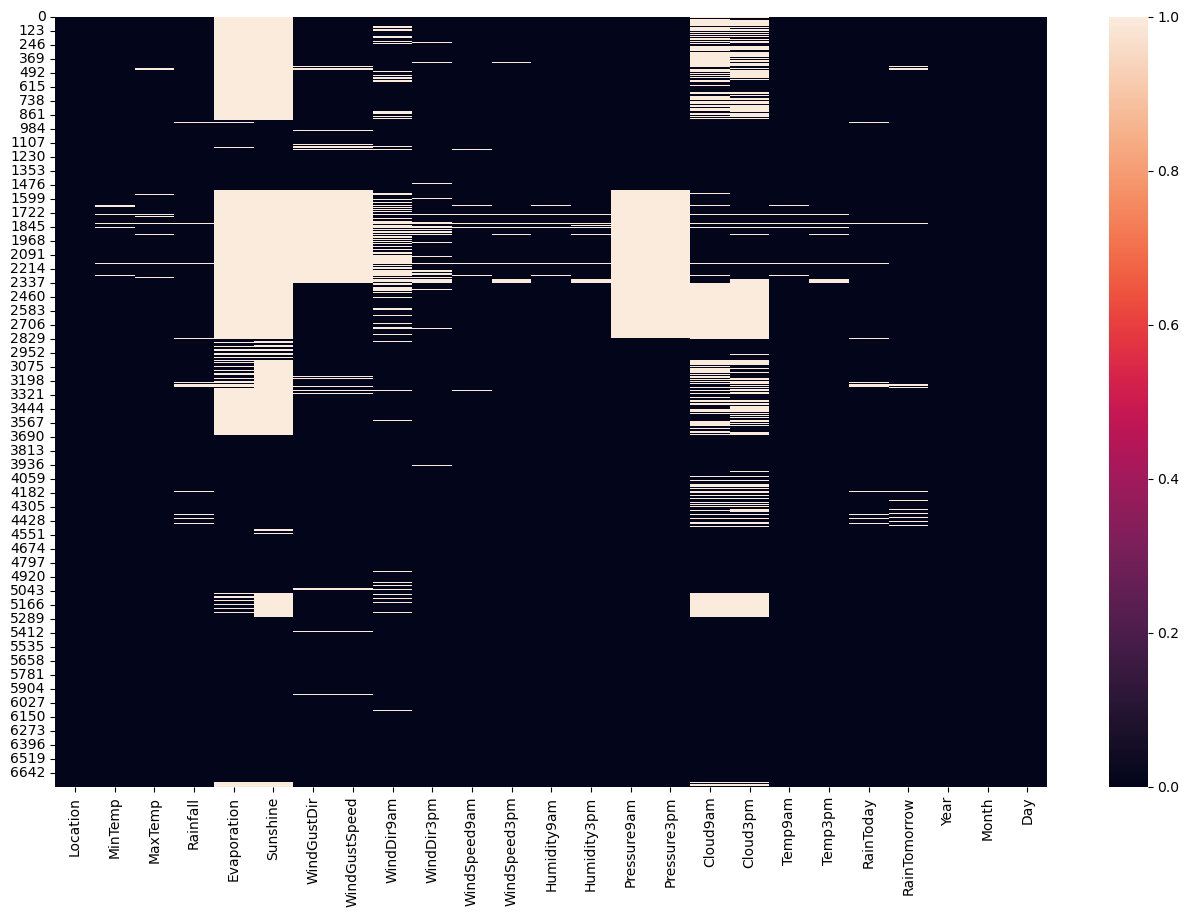

In [25]:
# Heatmap plot with null values
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [26]:
#Finding the percentage of data missing from the dataset
pd.set_option('display.max_rows',None) 
missing_values = df.isnull().sum()
percentage_missing_values =round((missing_values/len(df))*100,1)
dtyp=df.dtypes
null_values=pd.concat([dtyp,missing_values, percentage_missing_values], axis =1, keys =['Data Type','Missing Values', '% Missing data'])
print("Missing Values")
df_null=null_values.sort_values(by=["% Missing data"],ascending=False)
df_null=df_null.reset_index(drop=False)
df_null

Missing Values


index Data Type  Missing Values  % Missing data
0        Sunshine   float64            3236            47.9
1     Evaporation   float64            2921            43.2
2        Cloud3pm   float64            1902            28.1
3        Cloud9am   float64            1866            27.6
4     Pressure3pm   float64            1311            19.4
5     Pressure9am   float64            1308            19.3
6     WindGustDir    object             942            13.9
7   WindGustSpeed   float64             942            13.9
8      WindDir9am    object             794            11.7
9      WindDir3pm    object             294             4.3
10   RainTomorrow    object             138             2.0
11      RainToday    object             138             2.0
12       Rainfall   float64             138             2.0
13   WindSpeed3pm   float64             100             1.5
14    Humidity3pm   float64              96             1.4
15        Temp3pm   float64              92             1.4
16        MinTemp   float64              70             1.0
17   WindSpeed9am   float64              63             0.9
18        Temp9am   float64              51             0.8
19        MaxTemp   float64              57             0.8
20    Humidity9am   float64              54             0.8
21          Month     int32               0             0.0
22       Location    object               0             0.0
23           Year     int32               0             0.0
24            Day     int32               0             0.0

### Observations:

- **I need to perform imputation to fill missing/null values in the columns**
- **In this dataset, there are many missing values in the columns, hence I don't want to simply apply "simple imputer" to get the imputed dataset. Instead, I will apply various imputation techniques to impute the data.**
- **Then finally I will build ML models with each imputed dataset of all imputation techniques and check the metrics to decide the final imputed dataset to be considered for further processing**
- **In this project, I imputed the data using 3 imputation techniques 1. Simple Imputer 2. KNN Imputer 3. Multiple Iterative Imputer (MICE)**

In [27]:
df_1=df.copy()

# Imputation 

In [28]:
# Segregating colums with null values based on the datatype
df_null_cat=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df_null_num=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

### Notes before Imputation:

- **Here, I am trying 3 imputation techniques. I will choose the best one out of these 3 techniques (Simple Imputer, KNN Imputer, Multiple Iterative Imputer) by checking the score from each model**
- **I tried some iterations and noticed that KNN Imputer and Multiple Iterative Imputer are not working for categorical features with missing values, I decided to impute categorical features with missing values using mode technique**
- **I also noticed target variables for both regression ('Rainfall') and classificaiton ('RainTomorrow') task have 2% missing values. Imputing missing values in the target variable is a challenging problem as it directly affects the modeling of the problem. In most cases, imputing the target variable is not recommended as it can introduce bias and reduce the accuracy of the model. However, in this case, the number of missing values in the target variables are small (2%), hence I have decided to impute the target variables using a simple imputer technique.**
- **Once I have the data after imputing X categorical features and target variables, I started working with Simple Imputer, KNN and MICE imputation techniques for X numerical data and will finally checking the scores from each technique to decide which is the best imputed dataset**
- **I encoded categorical data into numerical data as KNN and MICE works with only numerical data**
- **Before imputation, I am splitting the data into train and test data. Then I am doing imputation on both train and test data. I am doing this splitting to make sure that the same set of train and test data goes into all threee ML models after imputation.**
- **Comarison of model scores make more sense with splitting of the data before imputation and again I am using same algorithm on all 3 imputed datasets such that the comparison is right**
- **In this project, I need to peform both regression and classification tasks hence I am going to perform all the above steps for both regression and classification tasks as the target variables are different. The imputed datasets can be different between regression and classification tasks for KNN Imputer and Multiple Iterative Imputer as the imputation of a particular column depends on other columns of the dataset, however for Simple Imputer, the imputed datasets will be same between regression and classification tasks as the imputation is done on each colum independently**

### Imputing categorical features and target variables

In [29]:
# Imputing Categorical features
for i in df_null_cat:
    if (df_1[i].isnull().sum()!=0):
        df_1[i]=df_1[i].fillna(df_1[i].mode()[0]) # Using "mode" for imputing categorical features
print(df_1[df_null_cat].isnull().sum().sum())

0


In [30]:
# Imputing target variables
df_1['Rainfall']=df_1['Rainfall'].fillna(df_1['Rainfall'].median()) # Imputing using "median" for regresssion target variable
df_1['RainTomorrow']=df_1['RainTomorrow'].fillna(df_1['RainTomorrow'].mode()[0]) # Imputing using "mode" for classification target variable

In [31]:
print(df_1.isnull().sum().sum())

14069


### Encoding of Categorical Features

In [32]:
df_categorical=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate LabelEncoder

for i in df_categorical:
    df_1[i] = le.fit_transform(df_1[i])
    
    # print the mapping of categories to integers 
    # print(f"{i}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # create a dictionary mapping integers to categories
    int_to_cat = {val: cat for val, cat in enumerate(le.classes_)}
    print(f"{i}: {int_to_cat}")
    
print("="*125)    
    
df_1.head()

Location: {0: 'Adelaide', 1: 'Albury', 2: 'Brisbane', 3: 'CoffsHarbour', 4: 'Darwin', 5: 'Melbourne', 6: 'Newcastle', 7: 'Penrith', 8: 'PerthAirport', 9: 'Uluru', 10: 'Williamtown', 11: 'Wollongong'}
WindGustDir: {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
WindDir9am: {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
WindDir3pm: {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
RainToday: {0: 'No', 1: 'Yes'}
RainTomorrow: {0: 'No', 1: 'Yes'}


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          NaN       NaN           13   
1         1      7.4     25.1       0.0          NaN       NaN           14   
2         1     12.9     25.7       0.0          NaN       NaN           15   
3         1      9.2     28.0       0.0          NaN       NaN            4   
4         1     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          13          14          20.0          24.0   
1           44.0           6          15           4.0          22.0   
2           46.0          13          15          19.0          26.0   
3           24.0           9           0          11.0           9.0   
4           41.0           1           7           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8          0             0  2008     12    1  
1     17.2     24.3          0             0  2008     12    2  
2     21.0     23.2          0             0  2008     12    3  
3     18.1     26.5          0             0  2008     12    4  
4     17.8     29.7          0             0  2008     12    5

## Missing values Imputation - Simple Imputer

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score

#############################################################################################################

# Simple Imputation for REGRESSION Task
reg_target=['Rainfall']

regression_imputed_data = {}  # Creating a dictionary to store the data for all 3 imputation techniques

# Split dataset into training and testing sets for regression task
train_reg, test_reg = train_test_split(df_1, test_size=0.2, random_state=42, stratify=None, shuffle=True)
train_reg_X = train_reg.drop(columns=['Rainfall'])
train_reg_y = train_reg['Rainfall']
test_reg_X = test_reg.drop(columns=['Rainfall'])
test_reg_y = test_reg['Rainfall']

# create list for numerical columns where the imputation is needed
median_cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# apply simple imputer with median strategy to median_cols for both train and test data
median_imputer = SimpleImputer(strategy='median')
train_reg_X[median_cols] = median_imputer.fit_transform(train_reg_X[median_cols])
test_reg_X[median_cols] = median_imputer.transform(test_reg_X[median_cols])

train_reg_X_imputed=train_reg_X
test_reg_X_imputed=test_reg_X

# Store imputed data in a single dataframe
train_test_reg_X_imputed = np.concatenate((train_reg_X_imputed, test_reg_X_imputed), axis=0)
train_test_reg_y_imputed = np.concatenate((train_reg_y, test_reg_y), axis=0)
regression_imputed_data["Simple Imputer"] = pd.DataFrame(np.concatenate((train_test_reg_X_imputed, train_test_reg_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_reg_X_imputed.columns.tolist() + reg_target)

# Train regression model on imputed training data and evaluate on imputed testing data
regressor = RandomForestRegressor(random_state=42)
regressor.fit(train_reg_X_imputed, train_reg_y)
r2_sir = r2_score(regressor.predict(test_reg_X_imputed), test_reg_y)
cv_scores_sir = cross_val_score(regressor, train_reg_X_imputed, train_reg_y, cv=5, scoring='r2')
print("Simple Imputer", 'Regression Test R2 score:', round(r2_sir,2),",", 'CV R2 score:', round(np.mean(cv_scores_sir),2))

print('-'*100)

#############################################################################################################

# Simple Imputation for CLASSIFICATION Task
class_target=['RainTomorrow']

classification_imputed_data = {}  # Creating a dictionary to store the data for all 3 imputation techniques

# Split dataset into training and testing sets for classification task
train_class, test_class = train_test_split(df_1, test_size=0.2, random_state=42, stratify=None, shuffle=True)
train_class_X = train_class.drop(columns=['RainTomorrow'])
train_class_y = train_class['RainTomorrow']
test_class_X = test_class.drop(columns=['RainTomorrow'])
test_class_y = test_class['RainTomorrow']

# create list for numerical columns where the imputation is needed
median_cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# apply simple imputer with median strategy to median_cols for both train and test data
median_imputer = SimpleImputer(strategy='median')
train_class_X[median_cols] = median_imputer.fit_transform(train_class_X[median_cols])
test_class_X[median_cols] = median_imputer.transform(test_class_X[median_cols])

train_class_X_imputed=train_class_X
test_class_X_imputed=test_class_X

# Store imputed data in a single dataframe
train_test_class_X_imputed = np.concatenate((train_class_X_imputed, test_class_X_imputed), axis=0)
train_test_class_y_imputed = np.concatenate((train_class_y, test_class_y), axis=0)
classification_imputed_data["Simple Imputer"] = pd.DataFrame(np.concatenate((train_test_class_X_imputed, train_test_class_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_class_X_imputed.columns.tolist() + class_target)

# Train classification model on imputed training data and evaluate on imputed testing data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_class_X_imputed, train_class_y)
accuracy_sic = accuracy_score(classifier.predict(test_class_X_imputed), test_class_y)
cv_scores_sic = cross_val_score(classifier, train_class_X_imputed, train_class_y, cv=5, scoring='accuracy')
print("Simple Imputer", 'Classification Test Accuracy:', round(accuracy_sic,2),",", 'CV Accuracy:', round(np.mean(cv_scores_sic),2))

Simple Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29
----------------------------------------------------------------------------------------------------
Simple Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84


## Missing values Imputation - KNN and Multi Iterative Imputer

In [34]:
# Define imputation techniques 
imputation_techniques = [
    ('KNN Imputer', KNNImputer(n_neighbors=5)),
    ('Multiple Iterative Imputer', IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42), max_iter=10))
]  # Used Random Forest Regressor for Multiple Iterative Imputer

print("Simple Imputer", 'Regression Test R2 score:', round(r2_sir,2),",", 'CV R2 score:', round(np.mean(cv_scores_sir),2))
# Impute both train and test data for REGRESSION task

for name, imputer in imputation_techniques:
    # Apply imputation technique to training and testing data
    imputer.fit(train_reg_X)
    train_reg_X_imputed = imputer.transform(train_reg_X)
    test_reg_X_imputed = imputer.transform(test_reg_X)

    # Store imputed data in a single dataframe
    train_test_reg_X_imputed = np.concatenate((train_reg_X_imputed, test_reg_X_imputed), axis=0)
    train_test_reg_y_imputed = np.concatenate((train_reg_y, test_reg_y), axis=0)
    regression_imputed_data[name] = pd.DataFrame(np.concatenate((train_test_reg_X_imputed, train_test_reg_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_reg_X.columns.tolist() + reg_target)

    # Train regression model on imputed training data and evaluate on imputed testing data
    regressor = RandomForestRegressor(random_state=42)
    regressor.fit(train_reg_X_imputed, train_reg_y)
    r2 = r2_score(regressor.predict(test_reg_X_imputed), test_reg_y)
    cv_scores = cross_val_score(regressor, train_reg_X_imputed, train_reg_y, cv=5, scoring='r2')
    print(name, 'Regression Test R2 score:', round(r2,2),",", 'CV R2 score:', round(np.mean(cv_scores),2))

print('-'*100)


print("Simple Imputer", 'Classification Test Accuracy:', round(accuracy_sic,2),",", 'CV Accuracy:', round(np.mean(cv_scores_sic),2))
# Impute both train and test data for CLASSIFICATION task

for name, imputer in imputation_techniques:
    # Apply imputation technique to training and testing data
    imputer.fit(train_class_X)
    train_class_X_imputed = imputer.transform(train_class_X)
    test_class_X_imputed = imputer.transform(test_class_X)
    
    # Store imputed data in a single dataframe
    train_test_class_X_imputed = np.concatenate((train_class_X_imputed, test_class_X_imputed), axis=0)
    train_test_class_y_imputed = np.concatenate((train_class_y, test_class_y), axis=0)
    classification_imputed_data[name] = pd.DataFrame(np.concatenate((train_test_class_X_imputed, train_test_class_y_imputed.reshape(-1,1)), axis=1),
                                                  columns=train_class_X.columns.tolist() + class_target)
    
    # Train classification model on imputed training data and evaluate on imputed testing data
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(train_class_X_imputed, train_class_y)
    accuracy = accuracy_score(classifier.predict(test_class_X_imputed), test_class_y)
    cv_scores = cross_val_score(classifier, train_class_X_imputed, train_class_y, cv=5, scoring='accuracy')
    print(name, 'Classification Test Accuracy:', round(accuracy,2),",", 'CV Accuracy:', round(np.mean(cv_scores),2))

Simple Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29
KNN Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29
Multiple Iterative Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29
----------------------------------------------------------------------------------------------------
Simple Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84
KNN Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84
Multiple Iterative Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84


### Observations:

- **Simple Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29**
- **KNN Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29**
- **Multiple Iterative Imputer Regression Test R2 score: -2.95 , CV R2 score: 0.29**
- **----------------------------------------------------------------------------------------------------------------------**
- **Simple Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84**
- **KNN Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84**
- **Multiple Iterative Imputer Classification Test Accuracy: 0.85 , CV Accuracy: 0.84**
- **-----------------------------------------------------------------------------------------------------------------------**
- **For regression task, all the imputation techniques didn't give good R2 score and CV scores. All models are peforming similarly. Hence I have chosen Imputed dataset from Simple Imputer for further processing of regression task**
- **For classification task, all the imputation techniques have given same accuracy and CV scores, hence considering the imputed data from "Simple Imputer" for further processing of classification task** 

In [35]:
# As I have decided to use simple imputer, then imputed data should be same between regression and classification tasks,
# Here I am copying the imputed dataset from classification task into df_2 for further processing
df_2=classification_imputed_data["Simple Imputer"].copy()
pd.set_option('display.max_rows', 10)
df_2.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0       3.0     18.1     31.0       0.0          5.8      13.0          4.0   
1       8.0     18.1     20.6       1.8          3.4       0.0          4.0   
2       5.0     12.7     20.9      34.6          5.8       7.0         11.0   
3       4.0     20.8     31.3       0.0          5.0      10.1          6.0   
4       8.0      5.4     16.9      16.0          3.4       7.1         15.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0        10.0         4.0           2.0          17.0   
1           30.0         5.0         4.0           4.0          13.0   
2           44.0        11.0         8.0          20.0          20.0   
3           31.0        11.0         3.0           9.0          20.0   
4           52.0        15.0        13.0          19.0          19.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
1         93.0         92.0       1016.5       1014.1       8.0       8.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   
3         76.0         59.0       1012.9       1009.1       6.0       4.0   
4         63.0         77.0       1018.7       1017.4       6.0       5.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2        0.0  2010.0    1.0  22.0           0.0  
1     19.1     19.1        1.0  2012.0    5.0   4.0           1.0  
2     15.4     20.2        1.0  2011.0   12.0  12.0           1.0  
3     24.5     29.9        0.0  2012.0    7.0  10.0           0.0  
4     14.0     13.6        1.0  2013.0    8.0  16.0           1.0

In [36]:
df_2.isnull().sum().sum() # Checking the sum of null values for all columns

0

## ** Imputation is completed **

## For EDA purpose, for all categorical features, mapping the categorical names to encoded numbers

In [37]:
# Define dictionaries for each categorical column
Location= {0: 'Adelaide', 1: 'Albury', 2: 'Brisbane', 3: 'CoffsHarbour', 4: 'Darwin', 5: 'Melbourne', 6: 'Newcastle', 7: 'Penrith', 8: 'PerthAirport', 9: 'Uluru', 10: 'Williamtown', 11: 'Wollongong'}
WindGustDir= {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
WindDir9am= {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
WindDir3pm= {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
RainToday= {0: 'No', 1: 'Yes'}
RainTomorrow= {0: 'No', 1: 'Yes'}

# Create a list of column names with categorical data
df_categorical=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Loop through each column and map the categorical values to names
for col in df_categorical:
    df_2[col] = df_2[col].map(eval(col))
    df_2[col] = df_2[col].astype(str)
    
# Print the updated dataframe with mapped categorical values
display(df_2.head())

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  CoffsHarbour     18.1     31.0       0.0          5.8      13.0   
1  PerthAirport     18.1     20.6       1.8          3.4       0.0   
2     Melbourne     12.7     20.9      34.6          5.8       7.0   
3        Darwin     20.8     31.3       0.0          5.0      10.1   
4  PerthAirport      5.4     16.9      16.0          3.4       7.1   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0          NE           46.0        SSE         NE           2.0   
1          NE           30.0        NNE         NE           4.0   
2         SSW           44.0        SSW          S          20.0   
3         NNW           31.0        SSW          N           9.0   
4         WSW           52.0        WSW          W          19.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          17.0         52.0         63.0       1014.2       1012.3       2.0   
1          13.0         93.0         92.0       1016.5       1014.1       8.0   
2          20.0         52.0         40.0       1010.2       1009.7       7.0   
3          20.0         76.0         59.0       1012.9       1009.1       6.0   
4          19.0         63.0         77.0       1018.7       1017.4       6.0   

   Cloud3pm  Temp9am  Temp3pm RainToday    Year  Month   Day RainTomorrow  
0       3.0     27.4     28.2        No  2010.0    1.0  22.0           No  
1       8.0     19.1     19.1       Yes  2012.0    5.0   4.0          Yes  
2       7.0     15.4     20.2       Yes  2011.0   12.0  12.0          Yes  
3       4.0     24.5     29.9        No  2012.0    7.0  10.0           No  
4       5.0     14.0     13.6       Yes  2013.0    8.0  16.0          Yes

# Segregating columns based on data type for better EDA

In [38]:
df_3=df_2.copy()

In [39]:
# Sorting the columns based on the datatype
df_3.columns.to_series().groupby(df_3.dtypes).groups

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'], object: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [40]:
df_categorical=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
df_numerical=['Rainfall', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']

In [41]:
df_numerical=df_3[df_numerical]
df_categorical=df_3[df_categorical]

# Statistical Summary:

In [42]:
# Statistical summary for numerical data
pd.set_option('display.max_rows', None)
df_numerical.describe().T

count         mean        std     min     25%     50%     75%  \
Rainfall       6762.0     2.723410  10.490138     0.0     0.0     0.0     0.8   
MinTemp        6762.0    13.110086   5.540674    -2.0     9.0    13.2    17.4   
MaxTemp        6762.0    24.093301   6.130367     8.2    19.6    23.5    28.4   
Evaporation    6762.0     4.998980   3.361770     0.0     4.0     4.6     5.0   
Sunshine       6762.0     8.421665   2.789228     0.0     8.8     9.0     9.2   
WindGustSpeed  6762.0    38.702159  13.393977     7.0    30.0    37.0    46.0   
WindSpeed9am   6762.0    12.765602   9.789075     0.0     6.0    11.0    19.0   
WindSpeed3pm   6762.0    17.562703   9.548883     0.0    11.0    17.0    24.0   
Humidity9am    6762.0    67.510500  17.182756    10.0    56.0    68.0    80.0   
Humidity3pm    6762.0    50.460515  18.498424     6.0    38.0    50.0    62.0   
Pressure9am    6762.0  1017.601878   6.028120   989.8  1014.2  1017.5  1020.9   
Pressure3pm    6762.0  1015.116060   5.967643   982.9  1011.5  1015.1  1018.4   
Cloud9am       6762.0     4.519817   2.492344     0.0     2.0     5.0     7.0   
Cloud3pm       6762.0     4.511979   2.343253     0.0     3.0     5.0     6.0   
Temp9am        6762.0    17.895830   5.722418     1.9    13.9    18.0    22.2   
Temp3pm        6762.0    22.701642   5.972136     7.3    18.4    22.2    26.8   
Year           6762.0  2012.052203   2.301057  2008.0  2010.0  2012.0  2014.0   
Month          6762.0     6.462141   3.377471     1.0     4.0     6.0     9.0   
Day            6762.0    15.737208   8.793898     1.0     8.0    16.0    23.0   

                  max  
Rainfall        371.0  
MinTemp          28.5  
MaxTemp          45.5  
Evaporation     145.0  
Sunshine         13.9  
WindGustSpeed   107.0  
WindSpeed9am     63.0  
WindSpeed3pm     83.0  
Humidity9am     100.0  
Humidity3pm      99.0  
Pressure9am    1039.0  
Pressure3pm    1036.0  
Cloud9am          8.0  
Cloud3pm          8.0  
Temp9am          39.4  
Temp3pm          44.1  
Year           2017.0  
Month            12.0  
Day              31.0

#### Observation:
- **The rainfall varies from 0 to 371.The average rainfall is 2.7**
- **Large difference between 75% and max shows presence of outliers**
- **In most of the features the mean and median are close to eachother,shows less skewness**
- **minimum temperature varies from -2 to 28.5**
- **maximum temperature varies from 18.2 to 45.5**

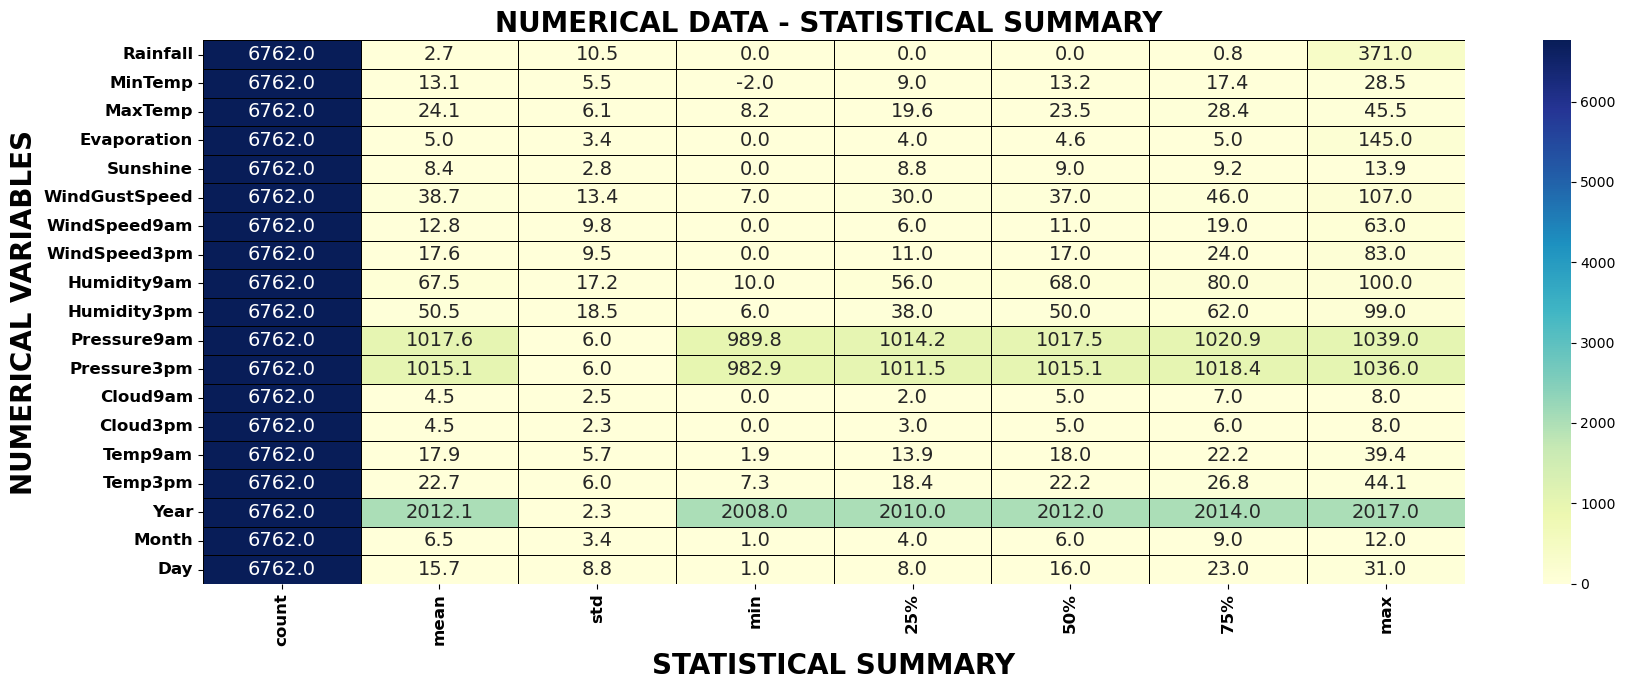

In [43]:
# Visualizing the Statistical summary for numerical data using heatmap.
plt.figure(figsize=(18,7))
sns.heatmap(df_numerical.describe().T,linewidths = 0.5,linecolor='black',fmt='0.1f',annot = True,cmap="YlGnBu",annot_kws={"size": 14})
plt.title("NUMERICAL DATA - STATISTICAL SUMMARY ",fontsize=20, fontweight='bold')
plt.xlabel("STATISTICAL SUMMARY", fontsize=20,fontweight='bold')
plt.ylabel("NUMERICAL VARIABLES", fontsize=20,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=90)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

In [44]:
## Statistical summary for categorical data
df_categorical.describe(include='O').T

count unique           top  freq
Location      6762     12  PerthAirport  1204
WindGustDir   6762     16             E  1460
WindDir9am    6762     16             N  1403
WindDir3pm    6762     16            SE   971
RainToday     6762      2            No  5190
RainTomorrow  6762      2            No  5190

#### Observation:
- **count is same for all the features.Hence,there are no null values in the dataset.**
- **Wind gusts are sudden and brief increases in wind speed that can occur during a storm.This is more from E direction**
- **Winddir9am is more from N direction**

# Visualization of data:

### Univariate Graphical Analysis for Categorical data - Int Data Type

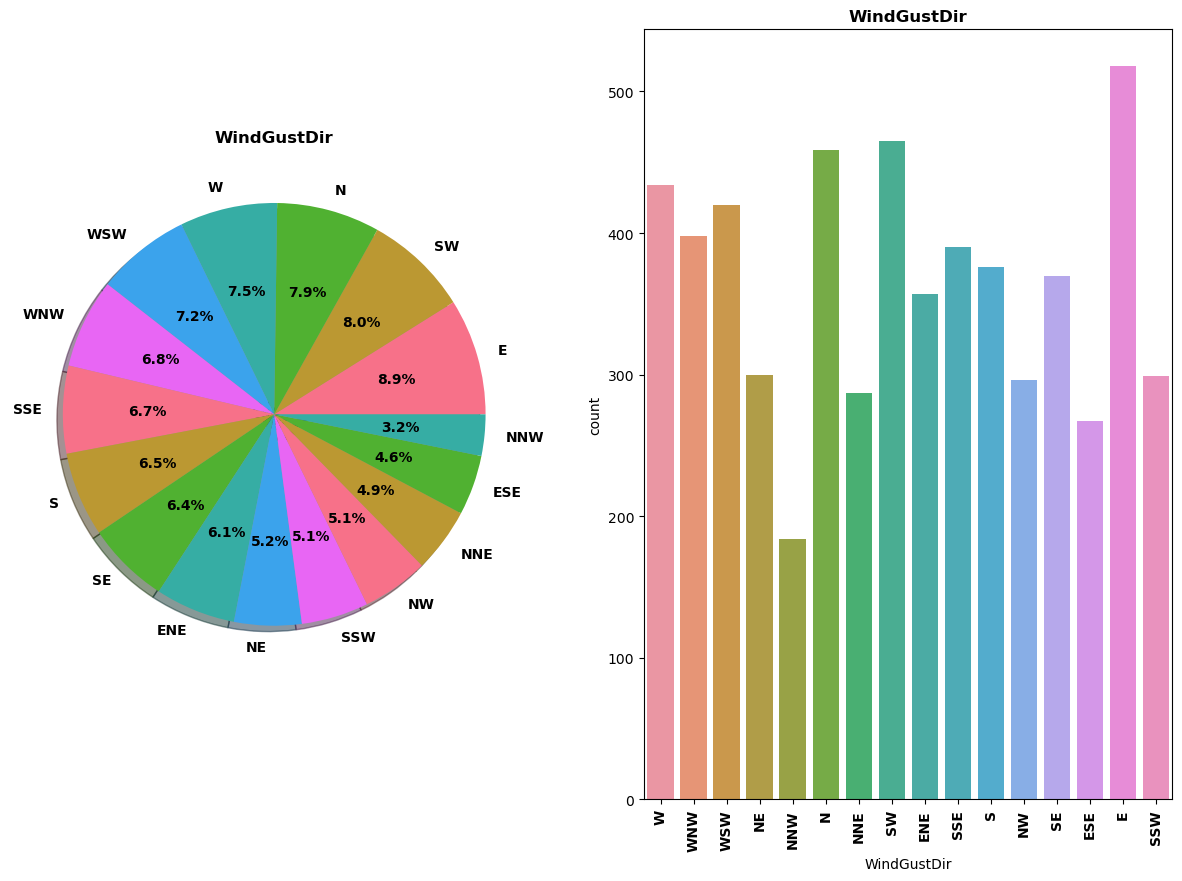

**Observations for WindGustDir :**

Value  Count  % Count
0      E    518      8.9
1     SW    465      8.0
2      N    459      7.9
3      W    434      7.5
4    WSW    420      7.2
5    WNW    398      6.8
6    SSE    390      6.7
7      S    376      6.5
8     SE    370      6.4
9    ENE    357      6.1
10    NE    300      5.2
11   SSW    299      5.1
12    NW    296      5.1
13   NNE    287      4.9
14   ESE    267      4.6
15   NNW    184      3.2

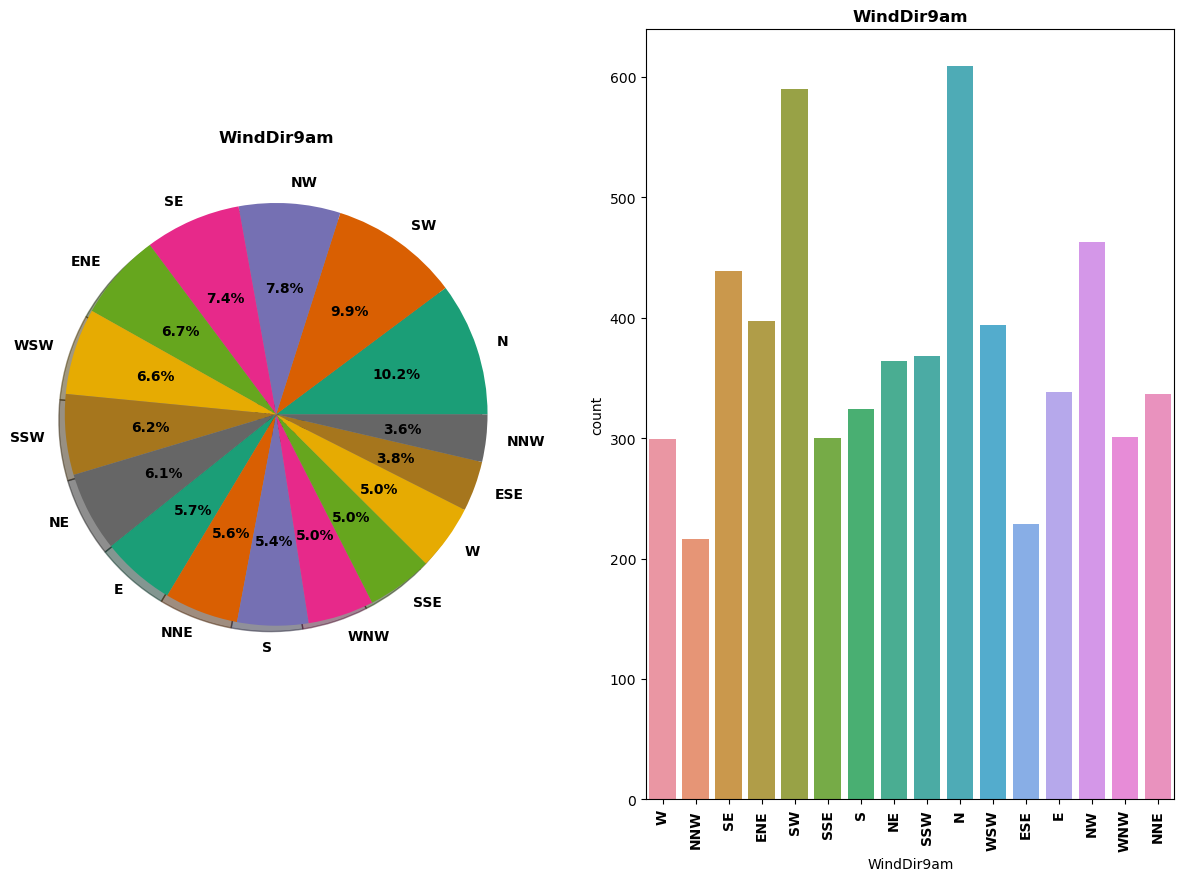

**Observations for WindDir9am :**

Value  Count  % Count
0      N    609     10.2
1     SW    590      9.9
2     NW    463      7.8
3     SE    439      7.4
4    ENE    397      6.7
5    WSW    394      6.6
6    SSW    368      6.2
7     NE    364      6.1
8      E    338      5.7
9    NNE    337      5.6
10     S    324      5.4
11   WNW    301      5.0
12   SSE    300      5.0
13     W    299      5.0
14   ESE    229      3.8
15   NNW    216      3.6

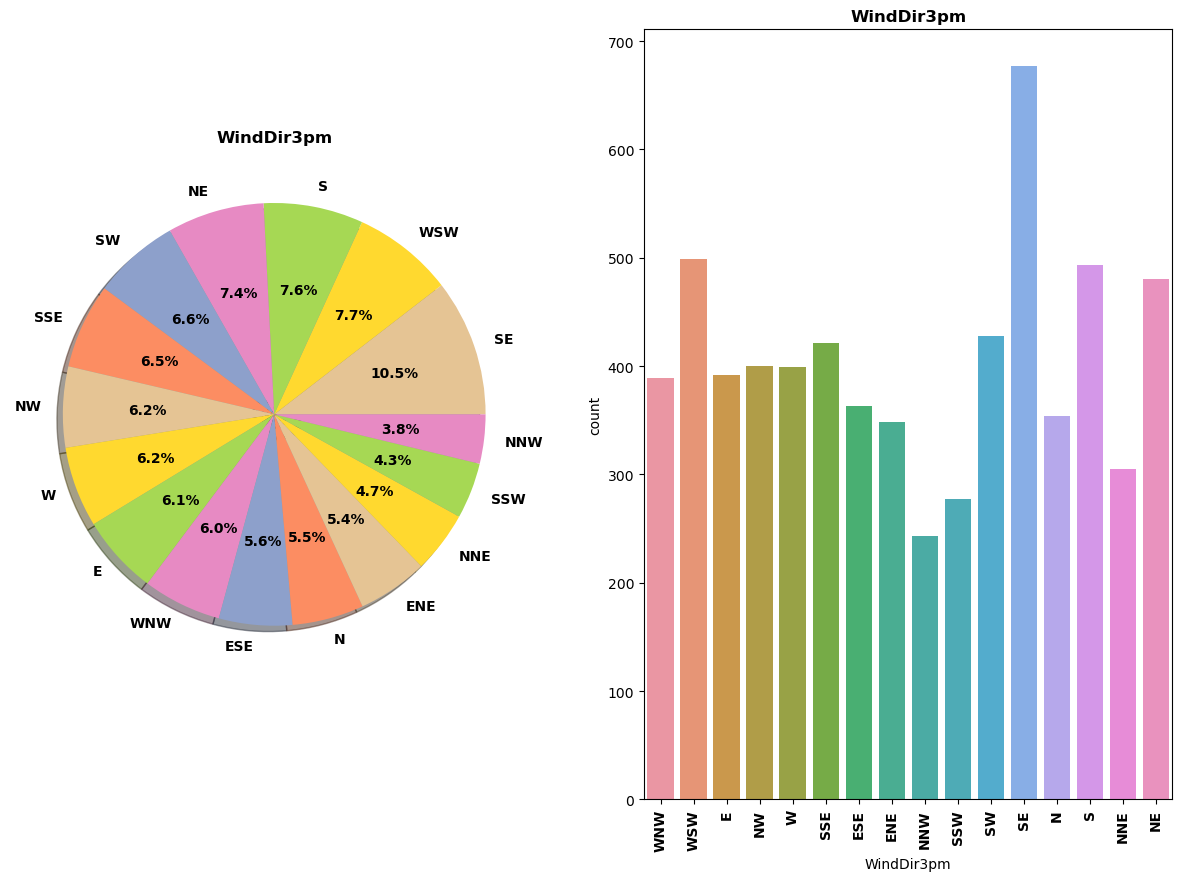

**Observations for WindDir3pm :**

Value  Count  % Count
0     SE    677     10.5
1    WSW    499      7.7
2      S    493      7.6
3     NE    480      7.4
4     SW    428      6.6
5    SSE    421      6.5
6     NW    400      6.2
7      W    399      6.2
8      E    392      6.1
9    WNW    389      6.0
10   ESE    363      5.6
11     N    354      5.5
12   ENE    348      5.4
13   NNE    305      4.7
14   SSW    277      4.3
15   NNW    243      3.8

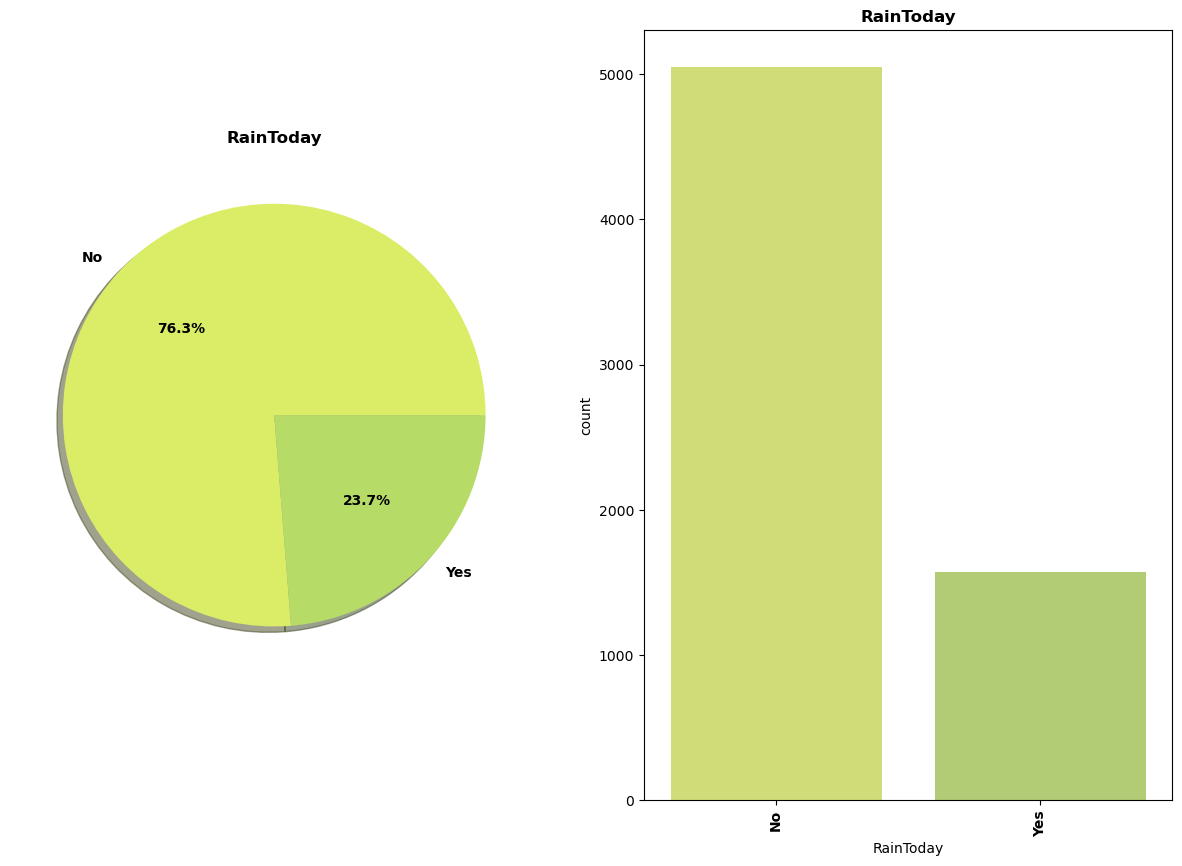

**Observations for RainToday :**

Value  Count  % Count
0    No   5052     76.3
1   Yes   1572     23.7

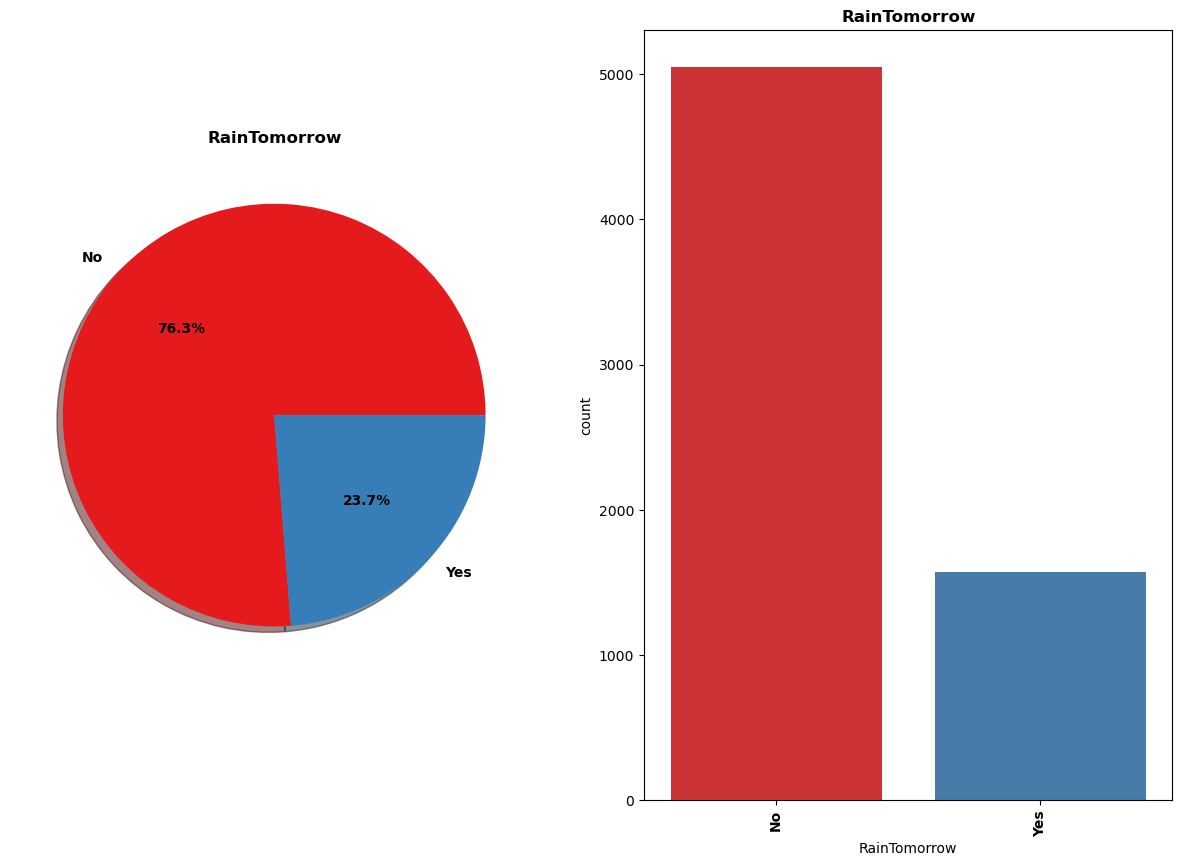

**Observations for RainTomorrow :**

Value  Count  % Count
0    No   5052     76.3
1   Yes   1572     23.7

In [45]:
colors=['husl','Dark2','Set2_r','summer_r','Set1','husl','rainbow','coolwarm','tab10','rainbow_r','gist_earth','Set2','prism',
        'hls','Paired','rocket','mako','flare','Blues_r']

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

plotnumber =1
for i in df_categorical.columns[1:12]:
    sns.set_palette(colors[plotnumber-1])
    if plotnumber <=9:
        f,ax=plt.subplots(1,2,figsize=(15,10))
        df[i].value_counts().plot.pie(autopct='%3.1f%%',
                                      textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
        ax[0].set_title(i, fontsize=12,fontweight ='bold')
        ax[0].set_ylabel('')
        sns.countplot(df[i],data=df,ax=ax[1])
        ax[1].set_title(i,fontsize=12,fontweight='bold')
        ax[1].set_xlabel(i,fontsize=10)
        plt.xticks(fontsize=10,fontweight ='bold',rotation=90)
    plotnumber+=1
    plt.show()
    length=df[i].nunique()
    printmd("**Observations for {} :**".format(i))   
    length=df[i].nunique()
    name=[]
    value_count=[]
    percent_value_count=[]
    for j in range(length):
        name.append(df[i].value_counts().index.values[j])
        value_count.append((df[i].value_counts())[j])
        percent_value_count.append(round(((df[i].value_counts())[j])*100/(df[i].value_counts().sum()),1))
    df_value_count=pd.DataFrame({'Value':name,'Count':value_count,'% Count': percent_value_count})
    display(df_value_count)
    print("="*120)

#### Observation:
- **sudden and brief increases in wind speed called WindGustDir can occur during a storm is more from East (E) direction**
- **The direction of the wind measured at 9am local time is more from N and sw**
- **The direction of the wind measured at 9am local time is more from SE**

### Univariate Graphical Analysis for Numerical data

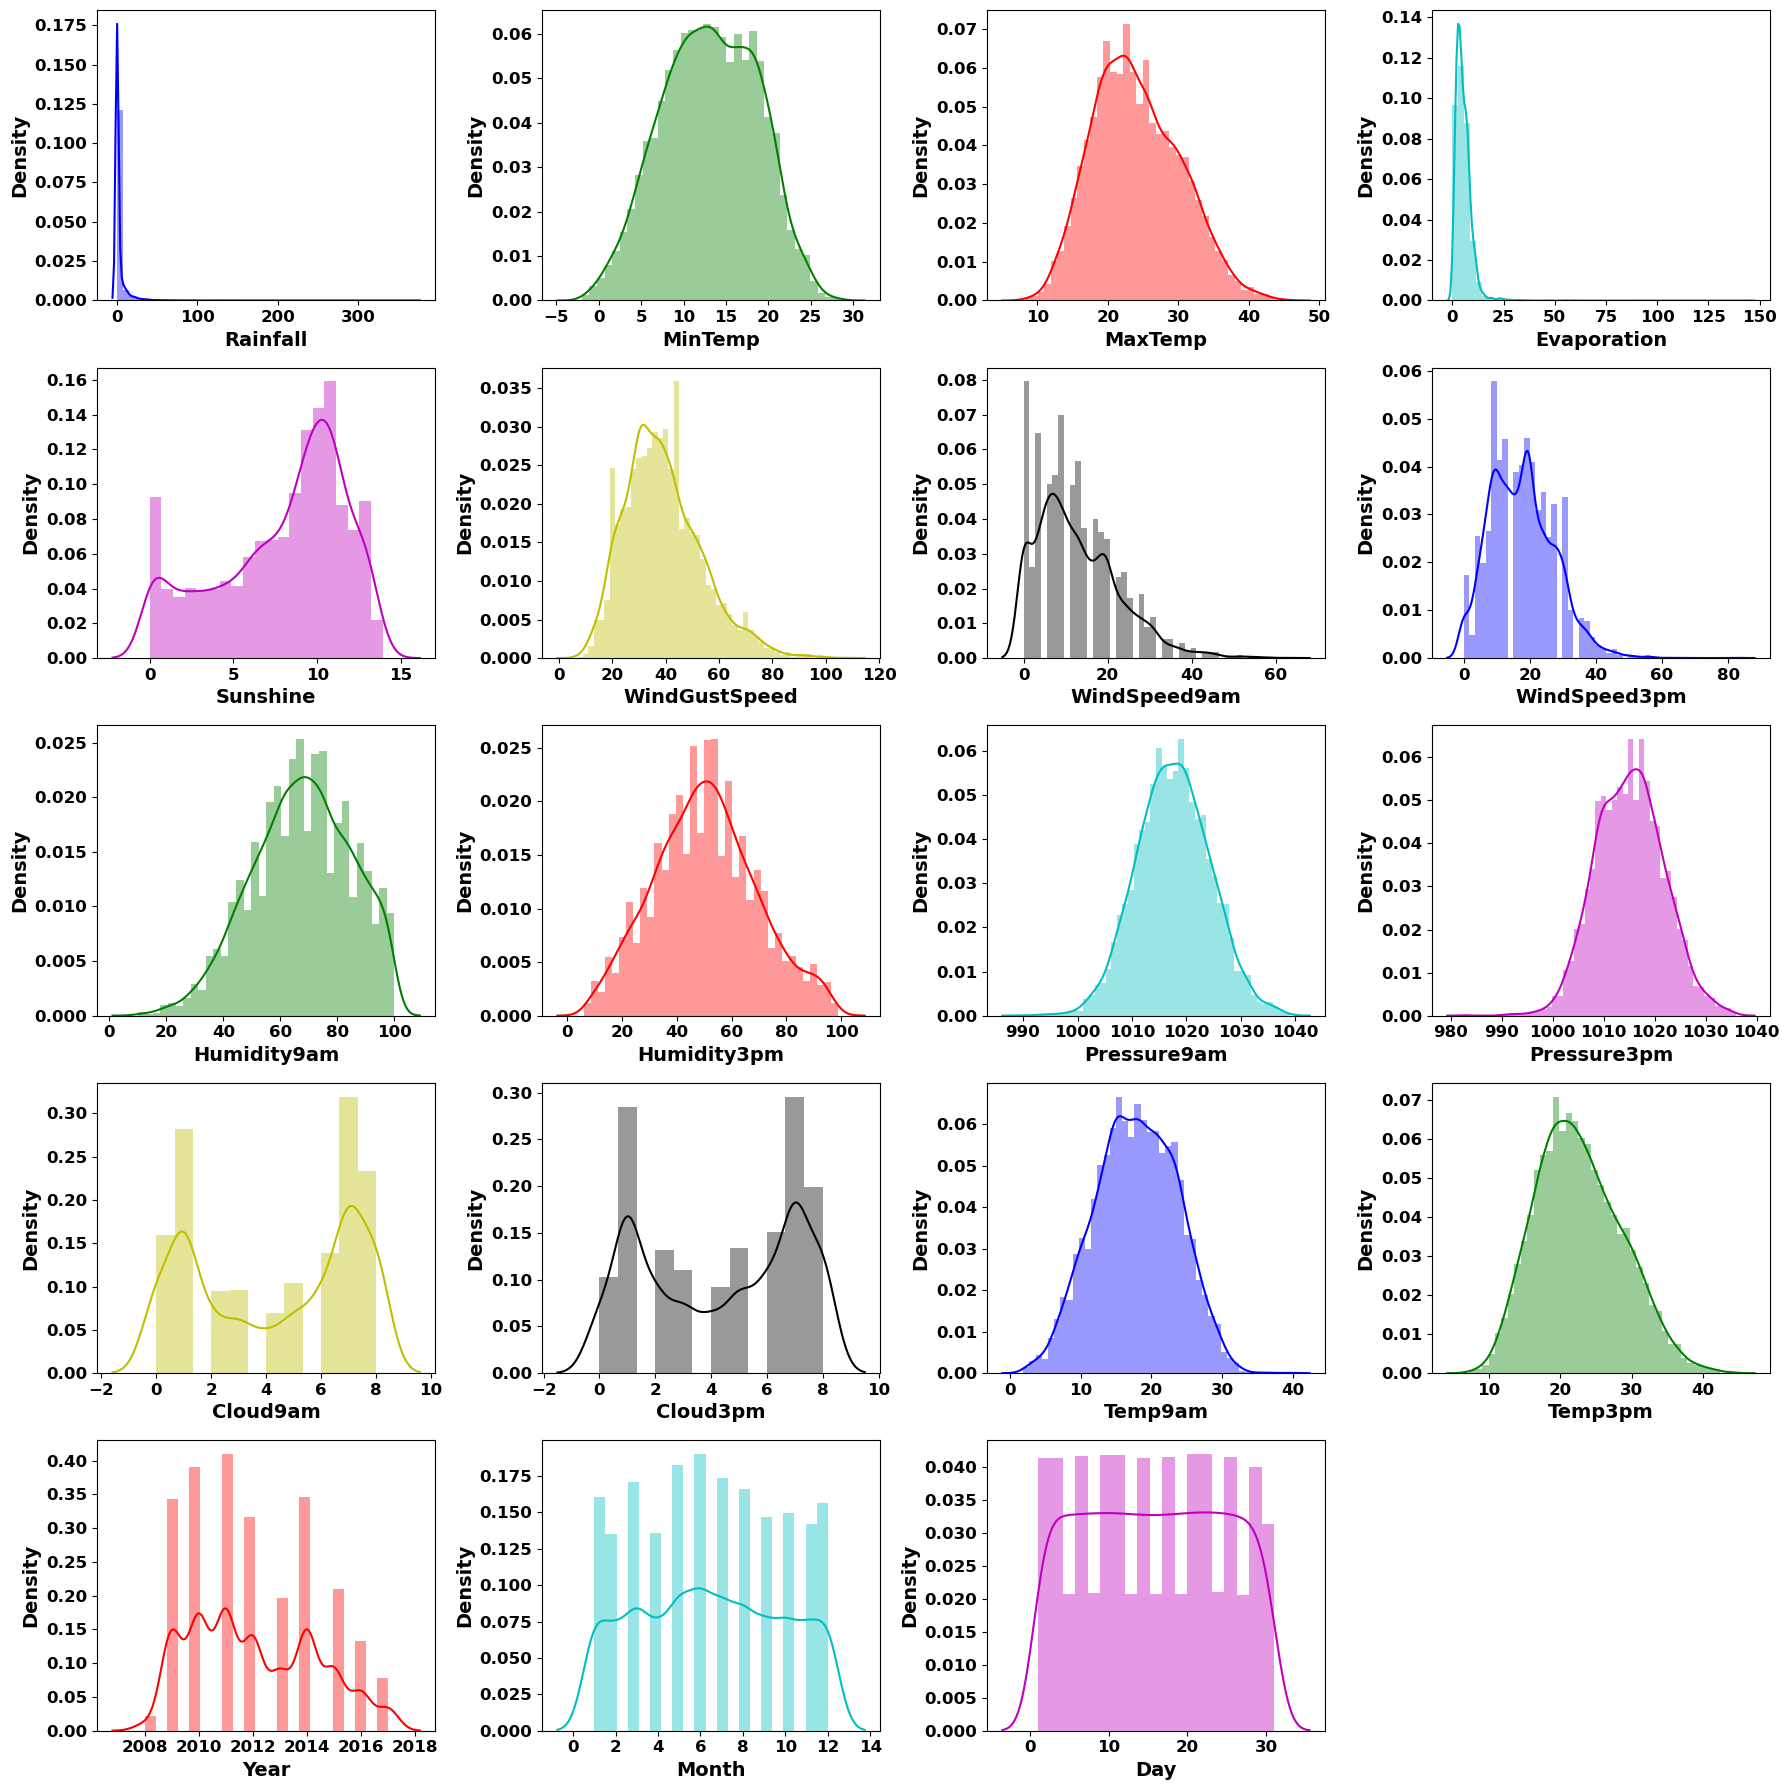

In [46]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(18,18),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_numerical.columns:
    if plotnum<=20:
        plt.subplot(5,4,plotnum)
        sns.distplot(df[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observation:
- **Rainfall varies from 0 to morethan 300**
- **min temperature varies from -2 to 28**
- **max temperature is above 40**
- **skewness is present in most of the features**

### Bivariate Graphical Analysis for Numerical data

In [47]:
df_num=df_numerical.columns
df_num

Index(['Rainfall', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

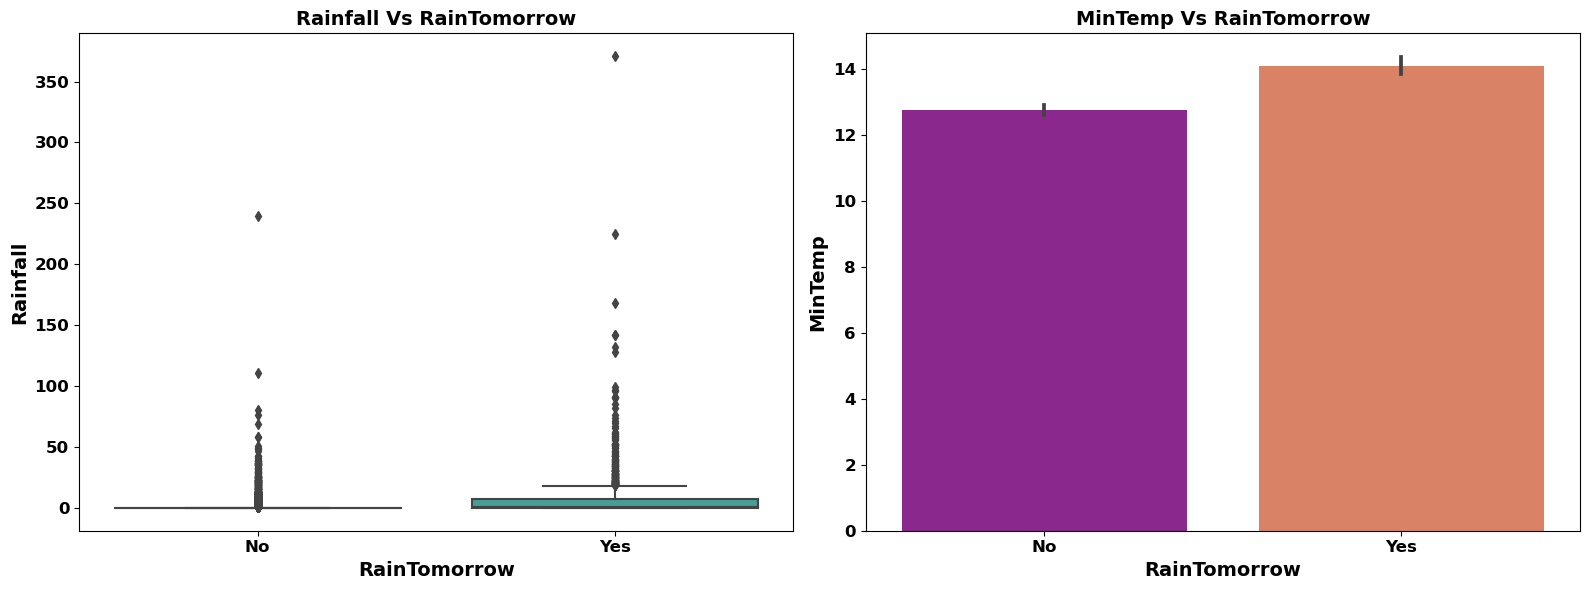

In [48]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['RainTomorrow'],df[df_num[0]], palette = 'husl')
plt.title('{} Vs RainTomorrow'.format(df_num[0]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[0], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df['RainTomorrow'],df[df_num[1]], palette = 'plasma')
plt.title('{} Vs RainTomorrow'.format(df_num[1]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[1], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Box plot shows many outliers and the chances of rainfall is more**

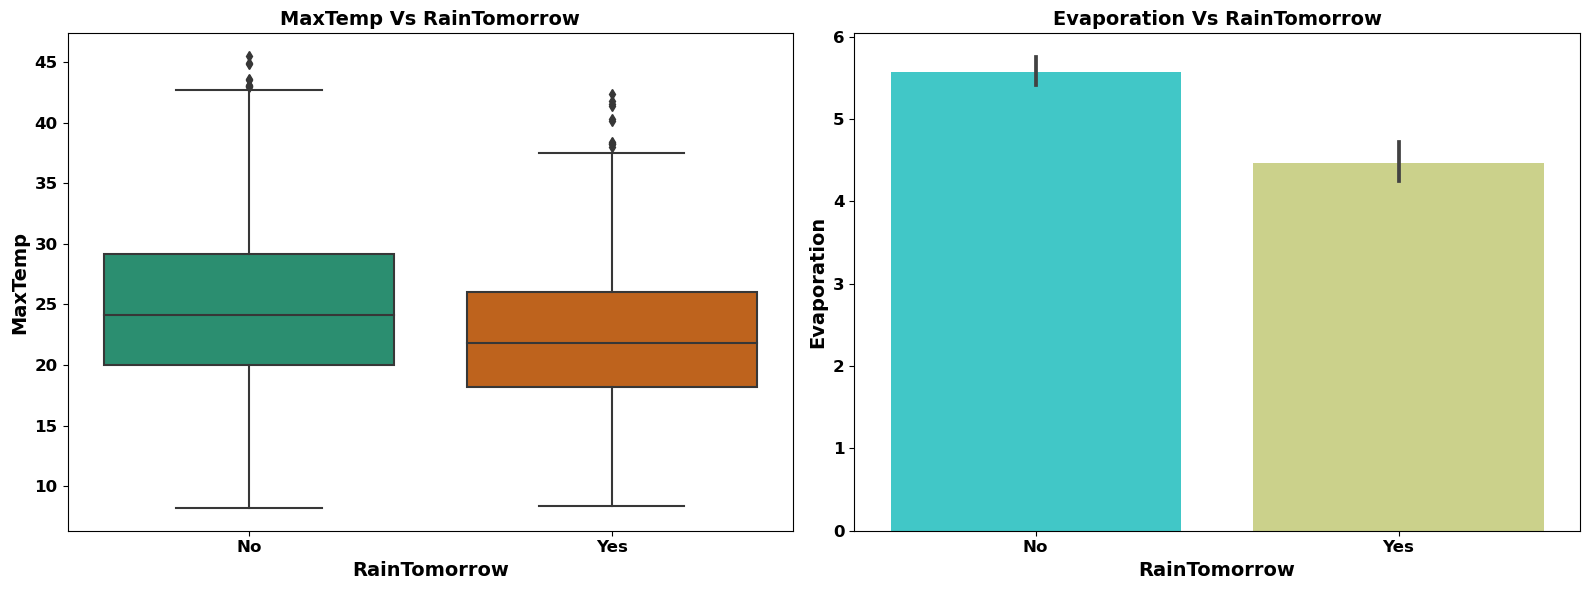

In [49]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['RainTomorrow'],df[df_num[2]], palette = 'Dark2')
plt.title('{} Vs RainTomorrow'.format(df_num[2]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[2], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df['RainTomorrow'],df[df_num[3]], palette = 'rainbow')
plt.title('{} Vs RainTomorrow'.format(df_num[3]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[3], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Here when the maximum temperature is high, it is less likely that it will rain tomorrow, and if the maximum temperature is low, it is more likely that it will rain tomorrow**.
- **Here as the Evaporation is more,there will be less chance of rainfall tomorrow**

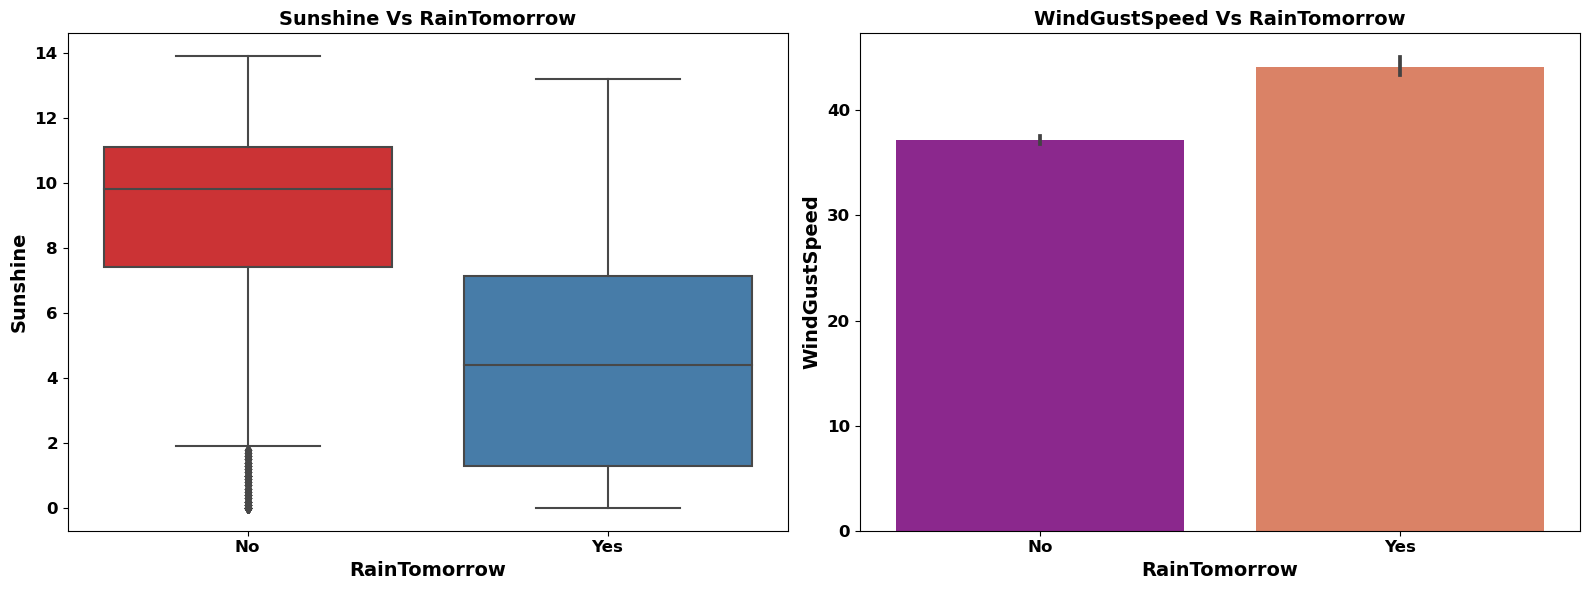

In [50]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['RainTomorrow'],df[df_num[4]], palette = 'Set1')
plt.title('{} Vs RainTomorrow'.format(df_num[4]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[4], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df['RainTomorrow'],df[df_num[5]], palette = 'plasma')
plt.title('{} Vs RainTomorrow'.format(df_num[5]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[5], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **As the sunshine is more there is less chance of rainfall.**
- **There is not a direct relationship between wind gust speed and the likelihood of rain occurring the next day.**

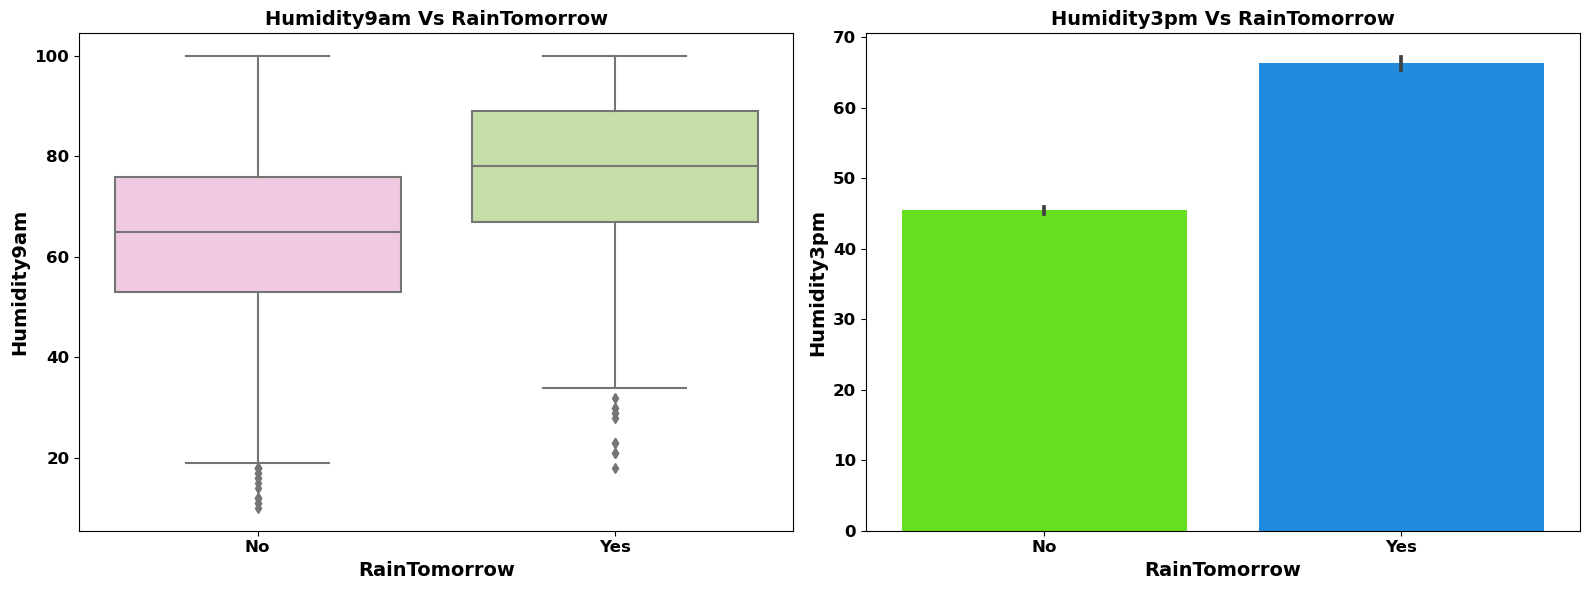

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['RainTomorrow'],df[df_num[8]], palette = 'PiYG')
plt.title('{} Vs RainTomorrow'.format(df_num[8]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[8], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df['RainTomorrow'],df[df_num[9]], palette = 'gist_rainbow')
plt.title('{} Vs RainTomorrow'.format(df_num[9]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[9], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **when the humidity is more then there are more chances of heavy rainfall.This can be seen in the above plots**

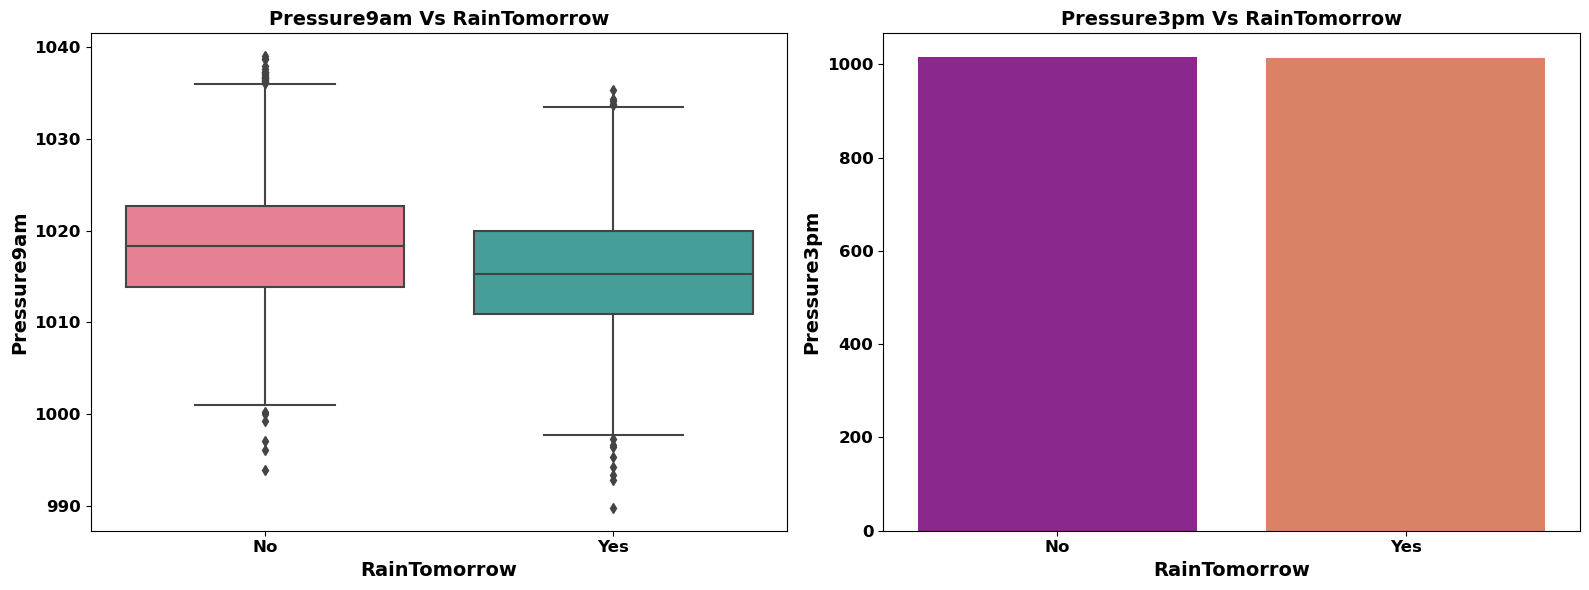

In [53]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['RainTomorrow'],df[df_num[10]], palette = 'husl')
plt.title('{} Vs RainTomorrow'.format(df_num[10]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[10], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df['RainTomorrow'],df[df_num[11]], palette = 'plasma')
plt.title('{} Vs RainTomorrow'.format(df_num[11]
                                     ),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[11], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **From boxplot we can see that low-pressure systems are associated with an increased likelihood of rainfall**

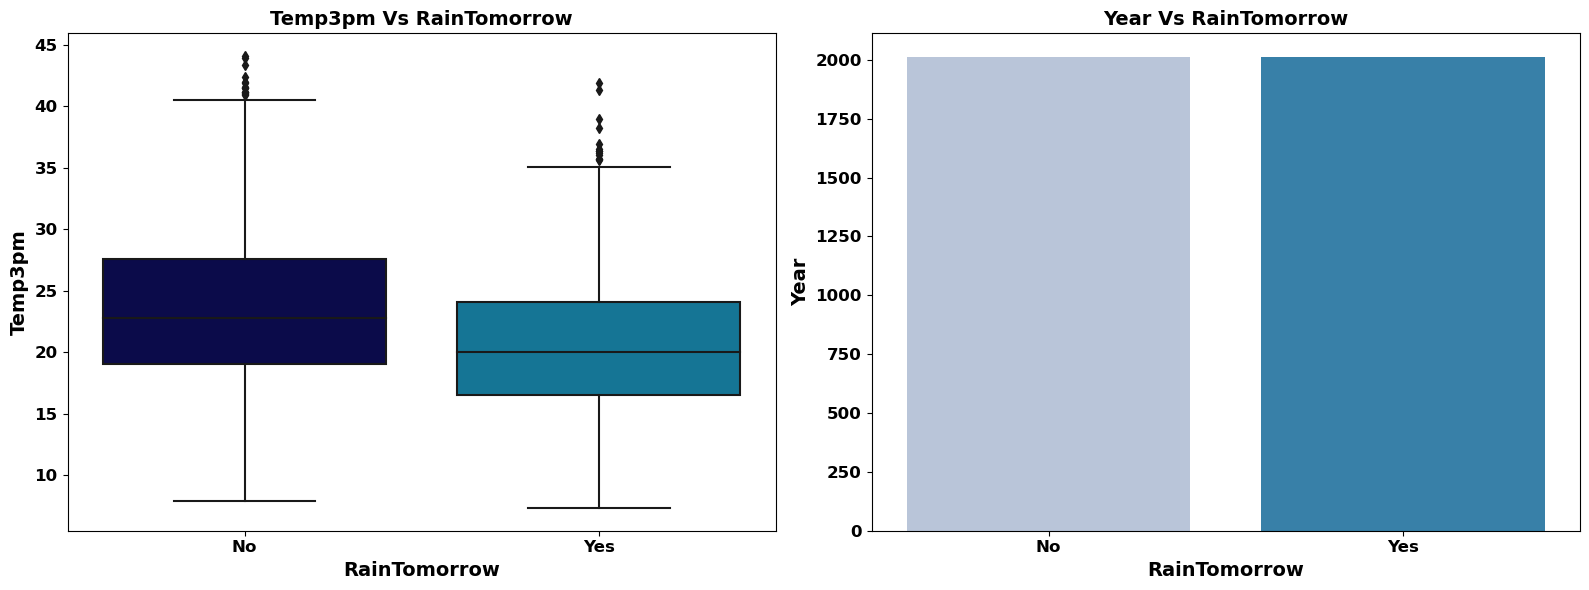

In [54]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(df['RainTomorrow'],df[df_num[15]], palette = 'ocean')
plt.title('{} Vs RainTomorrow'.format(df_num[15]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[15], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.subplot(1,2,2)
sns.barplot(df['RainTomorrow'],df[df_num[16]], palette = 'PuBu')
plt.title('{} Vs RainTomorrow'.format(df_num[16]),fontsize=14, fontweight='bold')
plt.xlabel('RainTomorrow', fontsize=14,fontweight='bold')
plt.ylabel(df_num[16], fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **When the temperature is high there is no rainfall**

### Multivariate Graphical Analysis

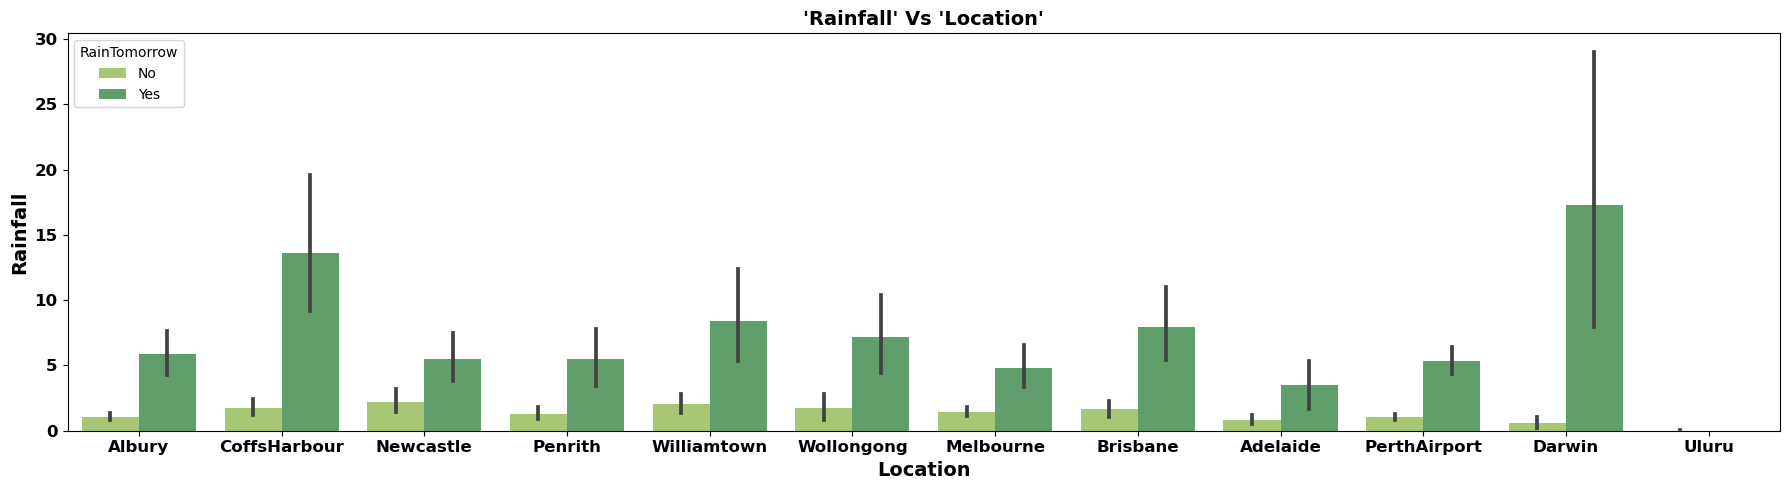

In [55]:
plt.figure(figsize=(18,5))
sns.barplot(y='Rainfall',x='Location',data=df,hue='RainTomorrow', palette='summer_r')
plt.title("'Rainfall' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('Rainfall', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Chances of rainfall is more in most of the location,Darwin location ans coffsharbour have more rainfall when compared to other location**

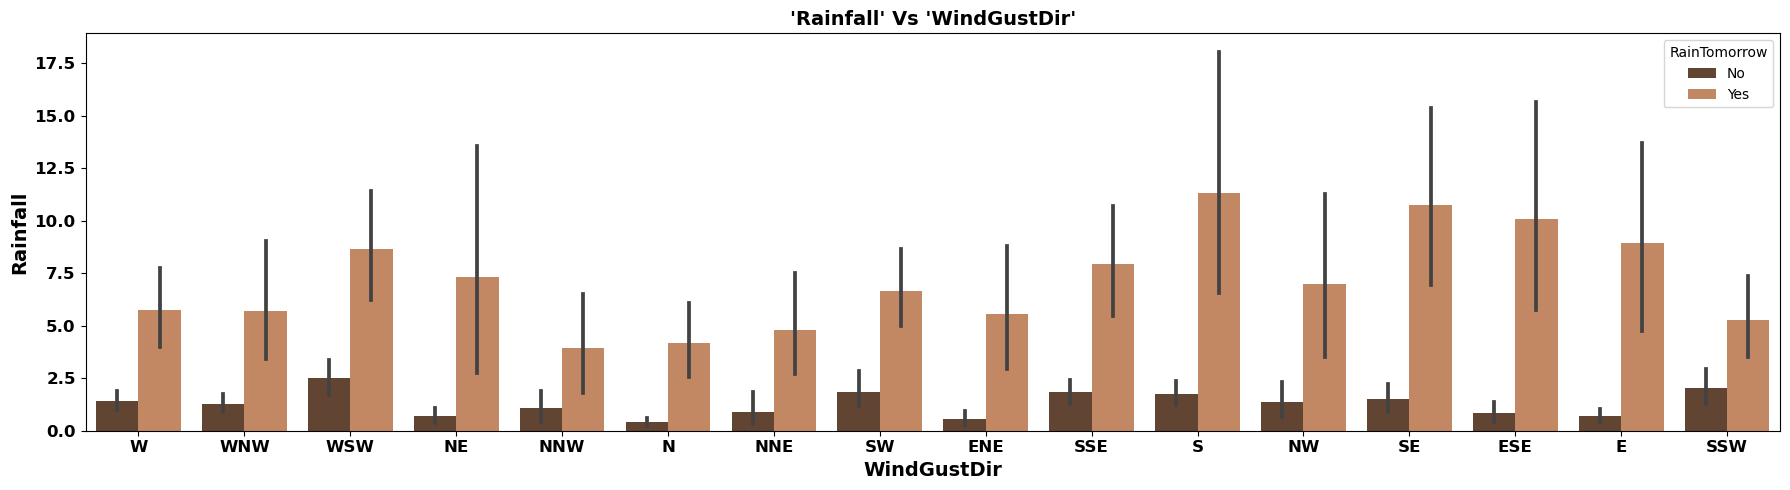

In [56]:
plt.figure(figsize=(18,5))
sns.barplot(y='Rainfall',x='WindGustDir',data=df,hue='RainTomorrow', palette='copper')
plt.title("'Rainfall' Vs 'WindGustDir'",fontsize=14, fontweight='bold')
plt.ylabel('Rainfall', fontsize=14,fontweight='bold')
plt.xlabel('WindGustDir', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **sudden and brief increases in wind speed called WindGustDir from S have more rainfall.**

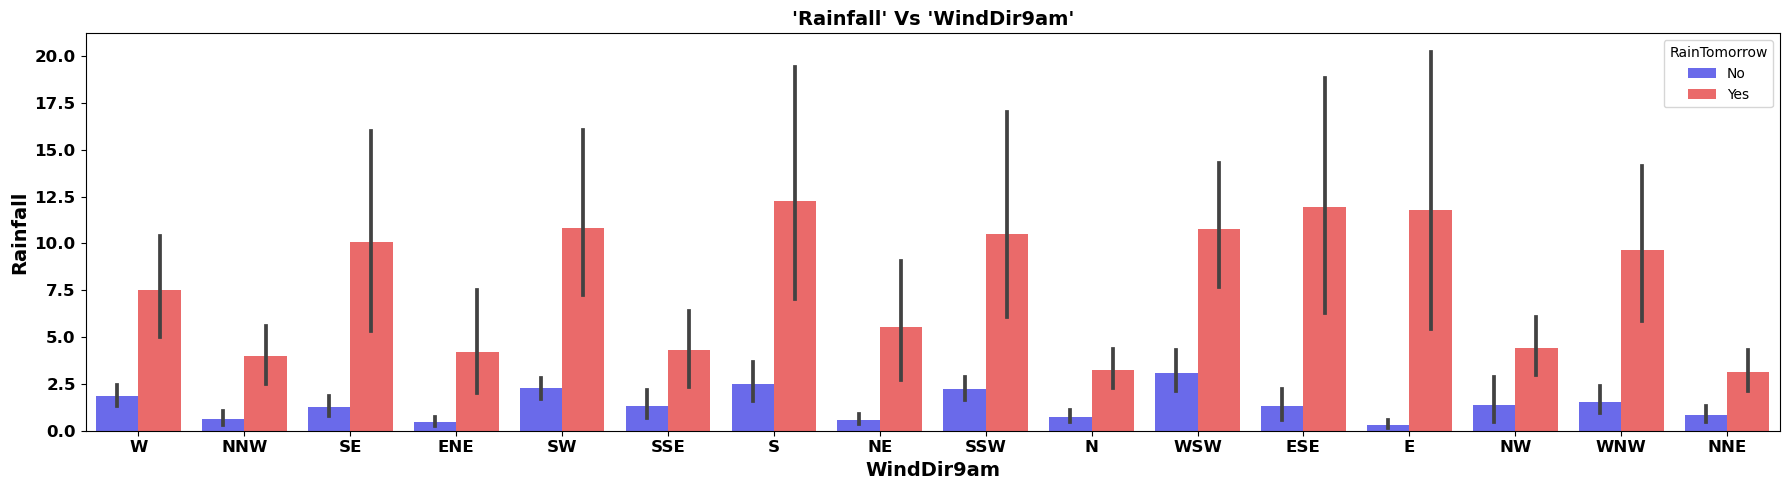

In [57]:
plt.figure(figsize=(18,5))
sns.barplot(y='Rainfall',x='WindDir9am',data=df,hue='RainTomorrow', palette='seismic')
plt.title("'Rainfall' Vs 'WindDir9am'",fontsize=14, fontweight='bold')
plt.ylabel('Rainfall', fontsize=14,fontweight='bold')
plt.xlabel('WindDir9am', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **very less rainfall when the wind direction at 9am is from North.rainfall is more with winddir9am is from S and E**

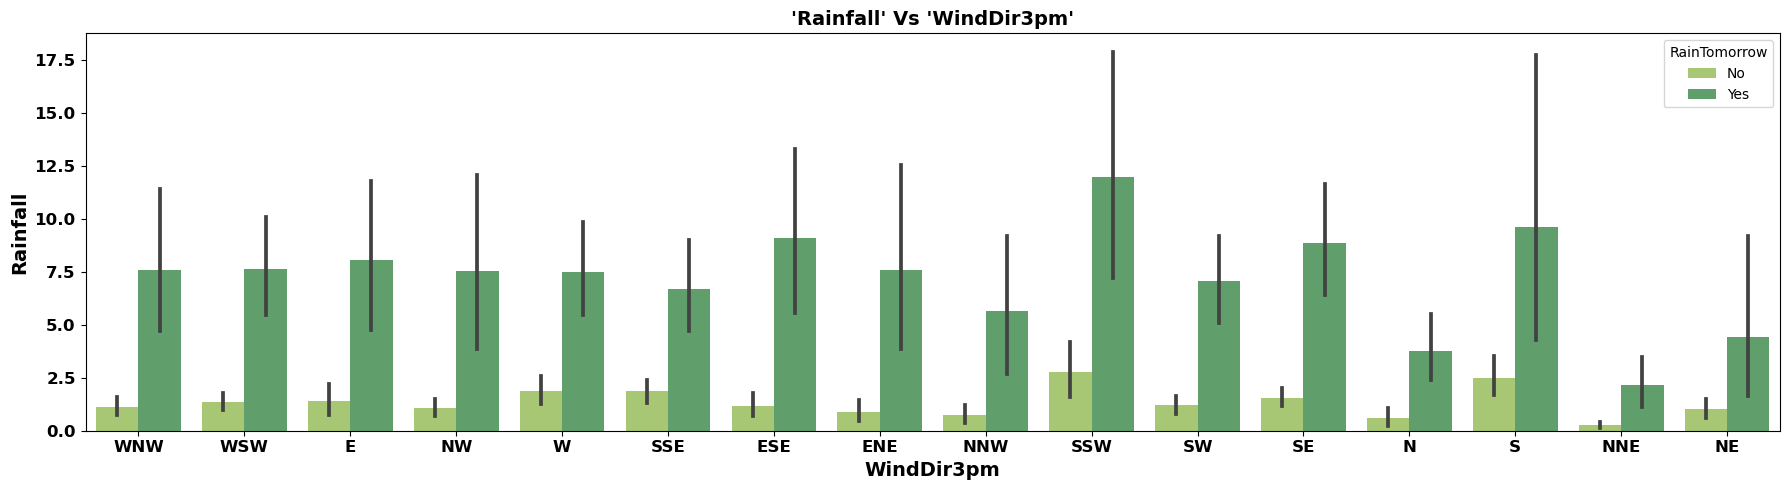

In [58]:
plt.figure(figsize=(18,5))
sns.barplot(y='Rainfall',x='WindDir3pm',data=df,hue='RainTomorrow', palette='summer_r')
plt.title("'Rainfall' Vs 'WindDir3pm'",fontsize=14, fontweight='bold')
plt.ylabel('Rainfall', fontsize=14,fontweight='bold')
plt.xlabel('WindDir3pm', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **when wind direction at 3pm is from ssw the rainfall for next day is more**

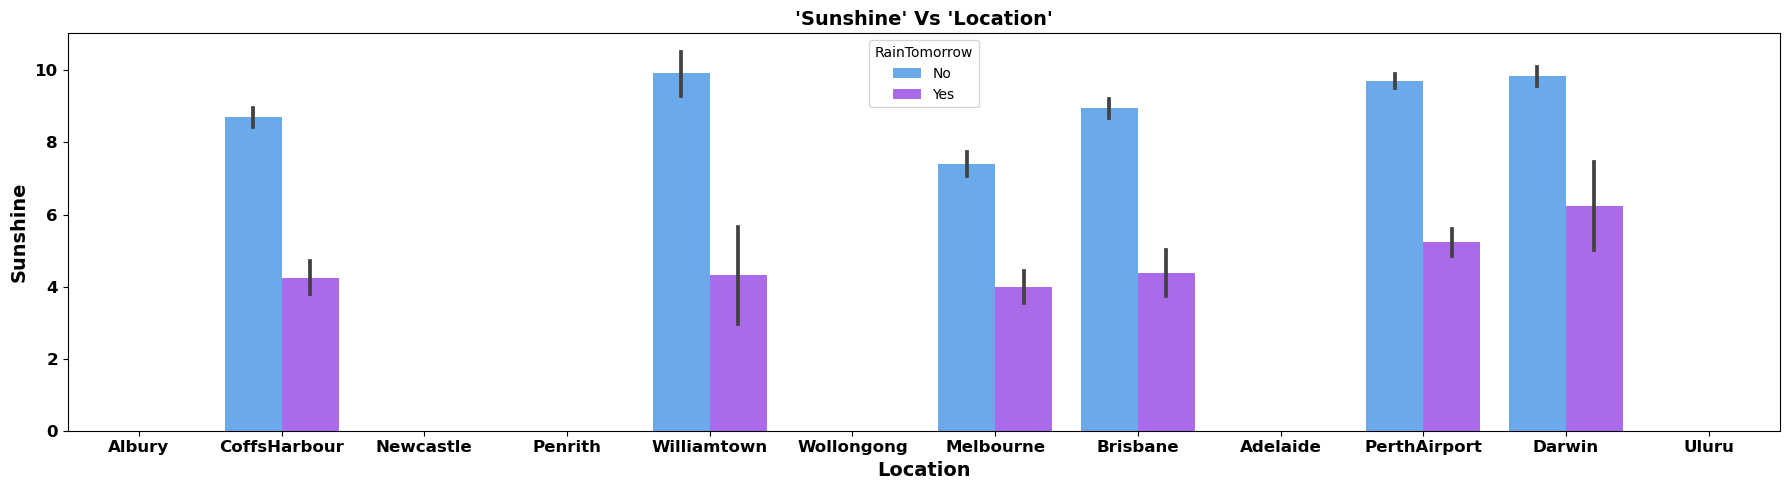

In [59]:
plt.figure(figsize=(18,5))
sns.barplot(y='Sunshine',x='Location',data=df,hue='RainTomorrow', palette='cool')
plt.title("'Sunshine' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('Sunshine', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Sunshine an rainfall are inversely related to each other.when the sunshine is more,there is less likelihood of rainfall.williamtown have more sunshine so less chance of rainfall**

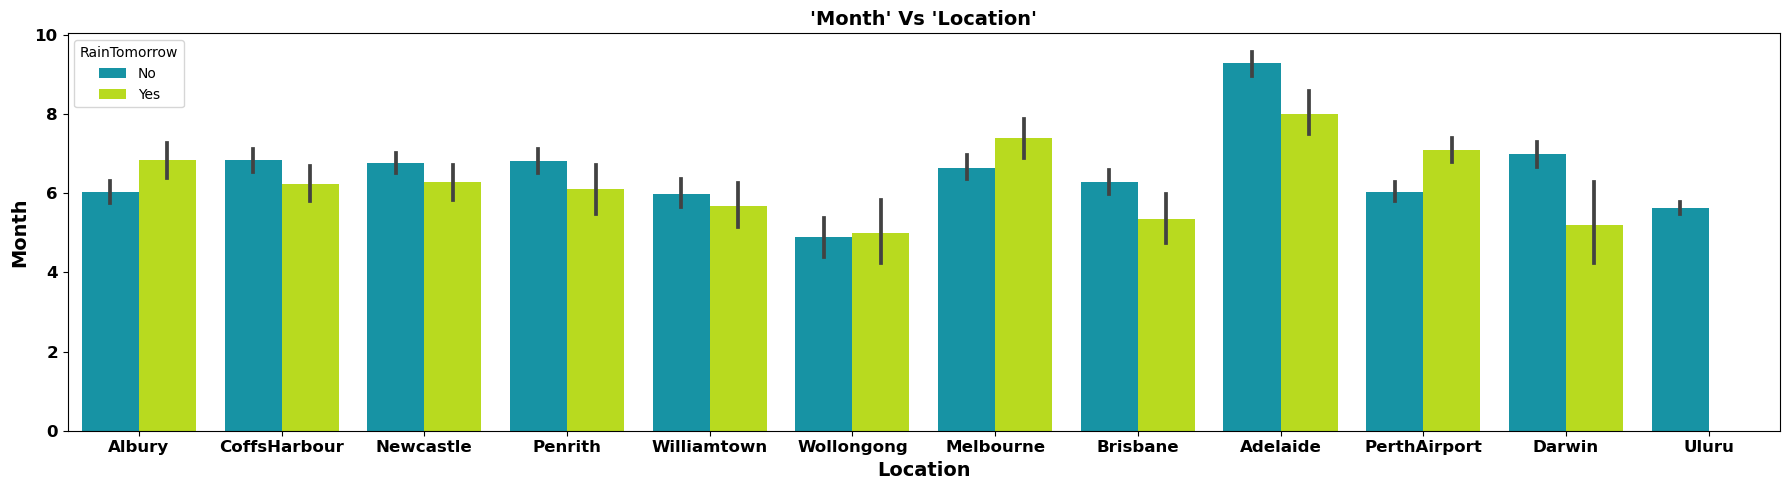

In [60]:
plt.figure(figsize=(18,5))
sns.barplot(y='Month',x='Location',data=df,hue='RainTomorrow', palette='nipy_spectral')
plt.title("'Month' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('Month', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **In most of the locations the likelihood of rainfall is more**

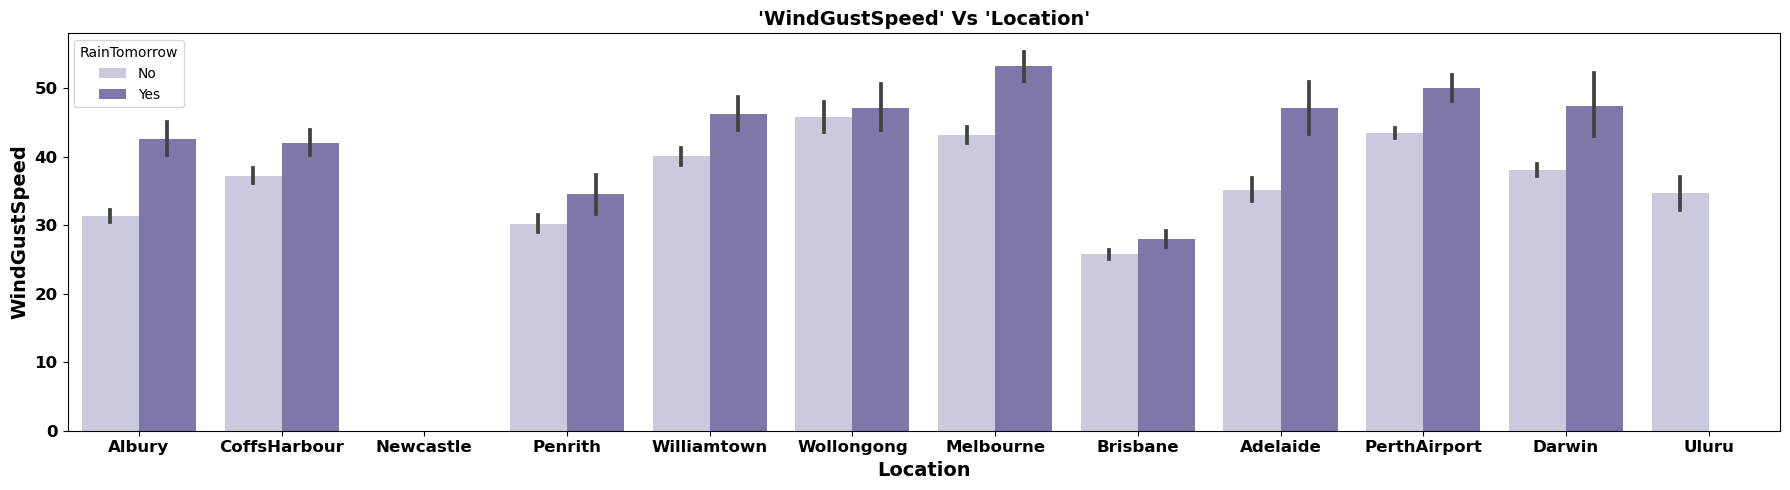

In [61]:
plt.figure(figsize=(18,5))
sns.barplot(y='WindGustSpeed',x='Location',data=df,hue='RainTomorrow', palette='Purples')
plt.title("'WindGustSpeed' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('WindGustSpeed', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **Here,when the wind gust speed is more in different locations there is more chance of rainfall the next day.Melbourne and wollongong receive more windgustspeed**

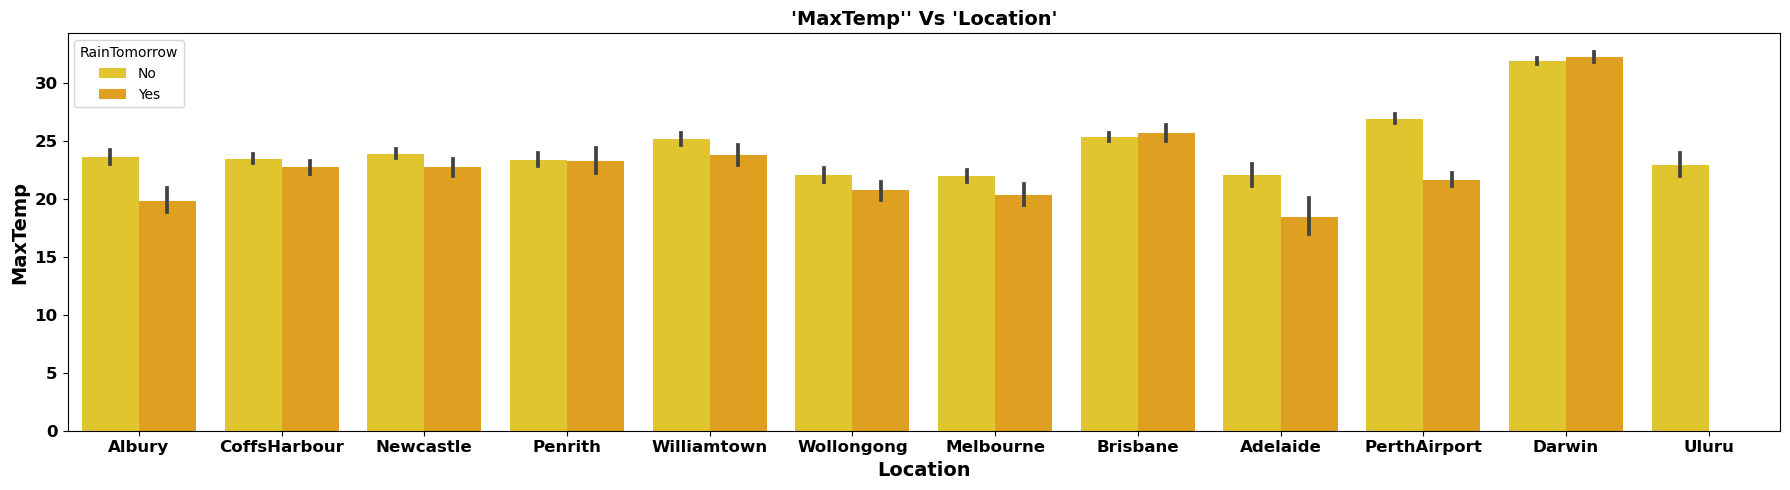

In [62]:
plt.figure(figsize=(18,5))
sns.barplot(y='MaxTemp',x='Location',data=df,hue='RainTomorrow', palette='Wistia')
plt.title("'MaxTemp'' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('MaxTemp', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **In most of the locations when max temperature is more,there is less chance of rainfall the next day**

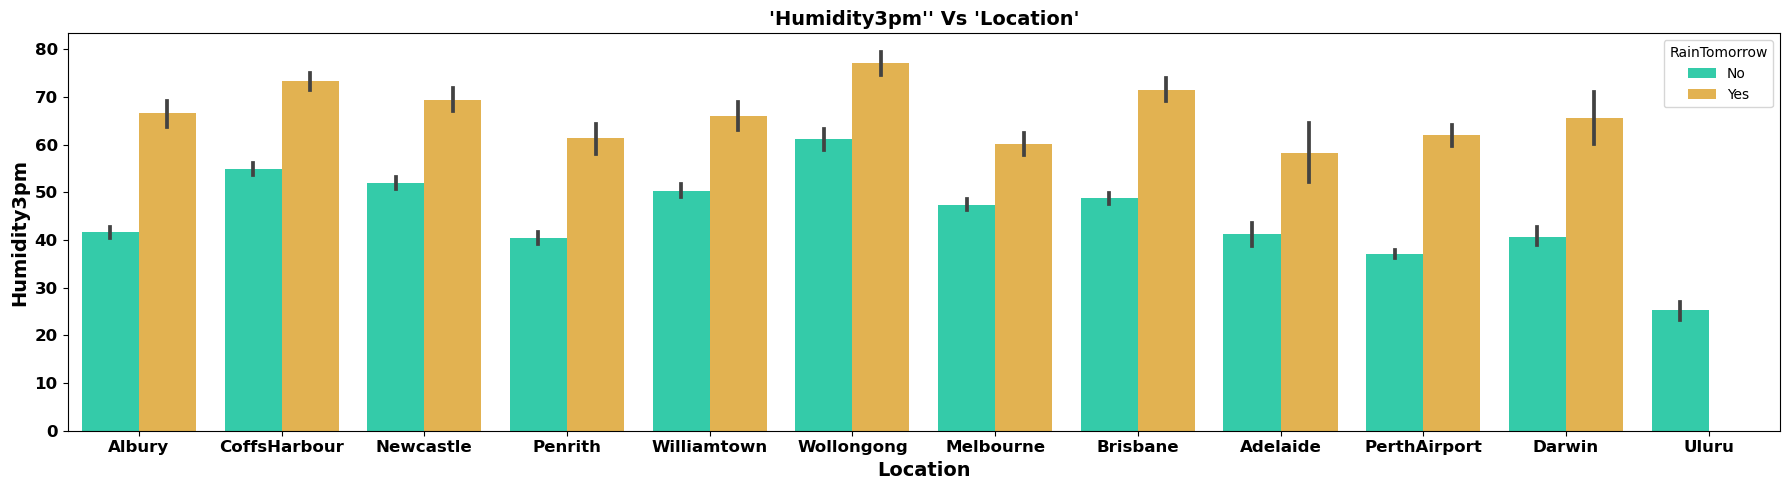

In [63]:

plt.figure(figsize=(18,5))
sns.barplot(y='Humidity3pm',x='Location',data=df,hue='RainTomorrow', palette='turbo')
plt.title("'Humidity3pm'' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('Humidity3pm', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **When the air is humid, it contains a high amount of moisture, which can lead to the formation of clouds and eventually to rainfall.wollongong,brisbane and coffsharbour have more humidity**

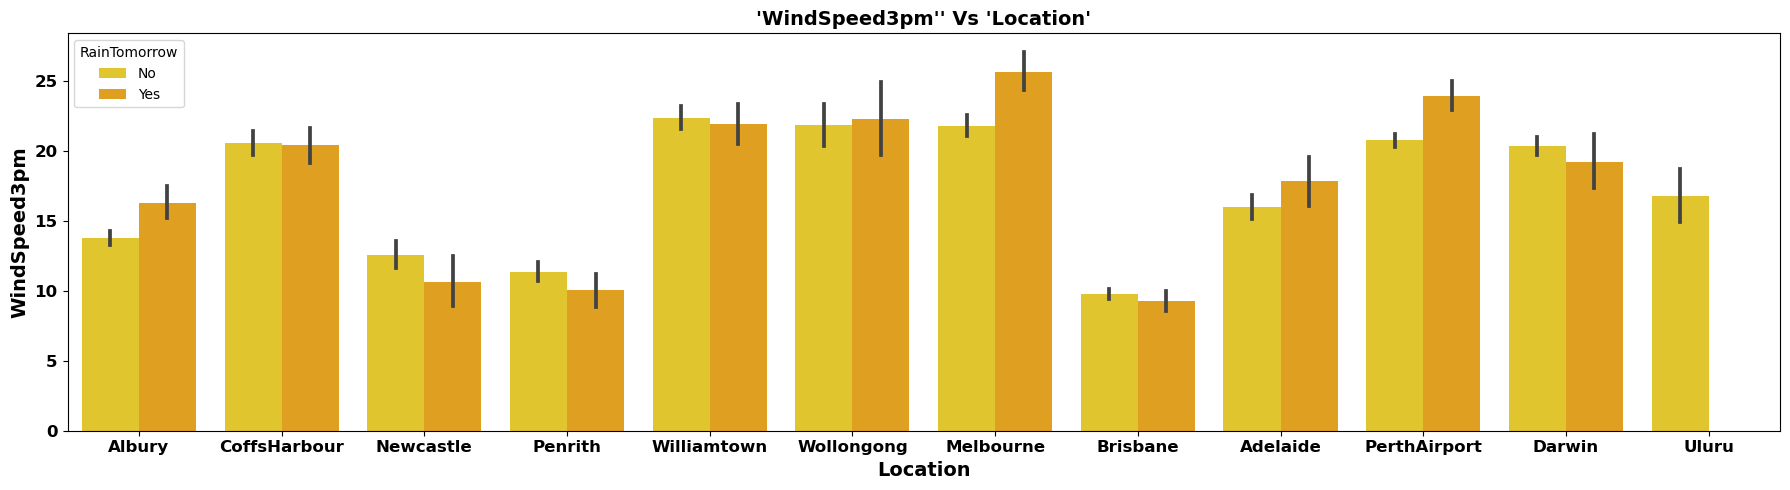

In [64]:
plt.figure(figsize=(18,5))
sns.barplot(y='WindSpeed3pm',x='Location',data=df,hue='RainTomorrow', palette='Wistia')
plt.title("'WindSpeed3pm'' Vs 'Location'",fontsize=14, fontweight='bold')
plt.ylabel('WindSpeed3pm', fontsize=14,fontweight='bold')
plt.xlabel('Location', fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight ='bold',rotation=0)
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation:
- **In most of the locations when the windspeed is more,the likelihood of rainfall is more.In williamtown windspeed is more but less chance of rainfall**

In [65]:
df_3.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  CoffsHarbour     18.1     31.0       0.0          5.8      13.0   
1  PerthAirport     18.1     20.6       1.8          3.4       0.0   
2     Melbourne     12.7     20.9      34.6          5.8       7.0   
3        Darwin     20.8     31.3       0.0          5.0      10.1   
4  PerthAirport      5.4     16.9      16.0          3.4       7.1   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0          NE           46.0        SSE         NE           2.0   
1          NE           30.0        NNE         NE           4.0   
2         SSW           44.0        SSW          S          20.0   
3         NNW           31.0        SSW          N           9.0   
4         WSW           52.0        WSW          W          19.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          17.0         52.0         63.0       1014.2       1012.3       2.0   
1          13.0         93.0         92.0       1016.5       1014.1       8.0   
2          20.0         52.0         40.0       1010.2       1009.7       7.0   
3          20.0         76.0         59.0       1012.9       1009.1       6.0   
4          19.0         63.0         77.0       1018.7       1017.4       6.0   

   Cloud3pm  Temp9am  Temp3pm RainToday    Year  Month   Day RainTomorrow  
0       3.0     27.4     28.2        No  2010.0    1.0  22.0           No  
1       8.0     19.1     19.1       Yes  2012.0    5.0   4.0          Yes  
2       7.0     15.4     20.2       Yes  2011.0   12.0  12.0          Yes  
3       4.0     24.5     29.9        No  2012.0    7.0  10.0           No  
4       5.0     14.0     13.6       Yes  2013.0    8.0  16.0          Yes

# Encoding Categorical Features Again for futher EDA steps

In [66]:
df_categorical=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # instantiate LabelEncoder

for i in df_categorical:
    df_3[i] = le.fit_transform(df_3[i])
    
    # print the mapping of categories to integers 
    # print(f"{i}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    
    # create a dictionary mapping integers to categories
    int_to_cat = {val: cat for val, cat in enumerate(le.classes_)}
    print(f"{i}: {int_to_cat}")
    
print("="*125)    
    
df_3.head()

Location: {0: 'Adelaide', 1: 'Albury', 2: 'Brisbane', 3: 'CoffsHarbour', 4: 'Darwin', 5: 'Melbourne', 6: 'Newcastle', 7: 'Penrith', 8: 'PerthAirport', 9: 'Uluru', 10: 'Williamtown', 11: 'Wollongong'}
WindGustDir: {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
WindDir9am: {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
WindDir3pm: {0: 'E', 1: 'ENE', 2: 'ESE', 3: 'N', 4: 'NE', 5: 'NNE', 6: 'NNW', 7: 'NW', 8: 'S', 9: 'SE', 10: 'SSE', 11: 'SSW', 12: 'SW', 13: 'W', 14: 'WNW', 15: 'WSW'}
RainToday: {0: 'No', 1: 'Yes'}
RainTomorrow: {0: 'No', 1: 'Yes'}


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         3     18.1     31.0       0.0          5.8      13.0            4   
1         8     18.1     20.6       1.8          3.4       0.0            4   
2         5     12.7     20.9      34.6          5.8       7.0           11   
3         4     20.8     31.3       0.0          5.0      10.1            6   
4         8      5.4     16.9      16.0          3.4       7.1           15   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
1           30.0           5           4           4.0          13.0   
2           44.0          11           8          20.0          20.0   
3           31.0          11           3           9.0          20.0   
4           52.0          15          13          19.0          19.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
1         93.0         92.0       1016.5       1014.1       8.0       8.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   
3         76.0         59.0       1012.9       1009.1       6.0       4.0   
4         63.0         77.0       1018.7       1017.4       6.0       5.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
1     19.1     19.1          1  2012.0    5.0   4.0             1  
2     15.4     20.2          1  2011.0   12.0  12.0             1  
3     24.5     29.9          0  2012.0    7.0  10.0             0  
4     14.0     13.6          1  2013.0    8.0  16.0             1

# Checking coefficients of correlation (r)

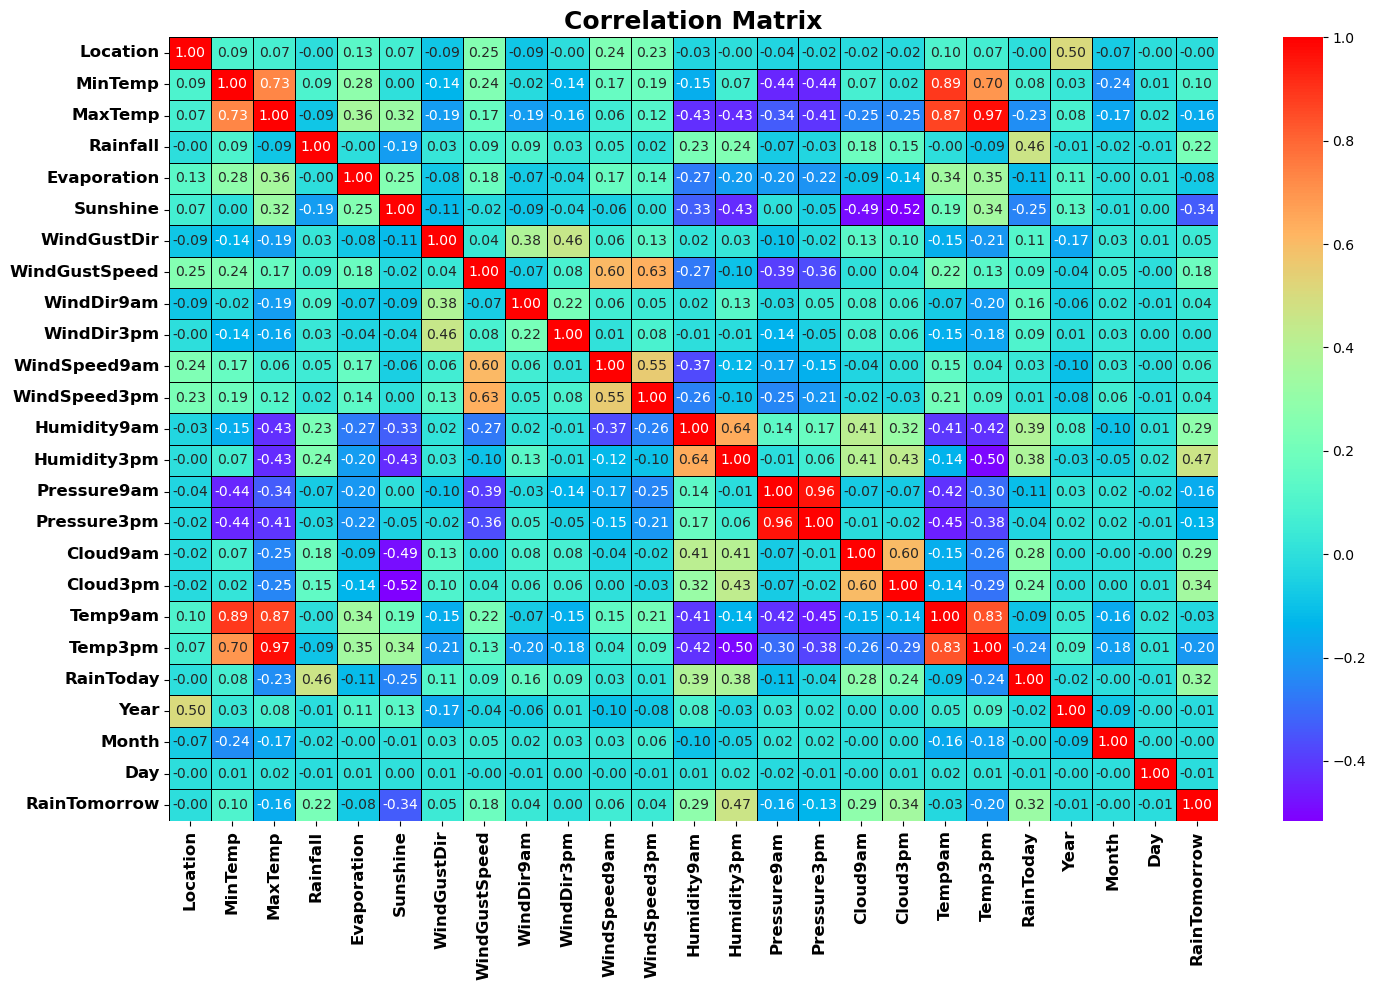

In [67]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df_3.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f",cmap="rainbow")
plt.title("Correlation Matrix",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.tight_layout()
plt.savefig("correlation_matrix.jpg")
plt.show()

# Checking Correlations with Target Variable - Regression Task

In [68]:
df_cr1=df_3.copy()

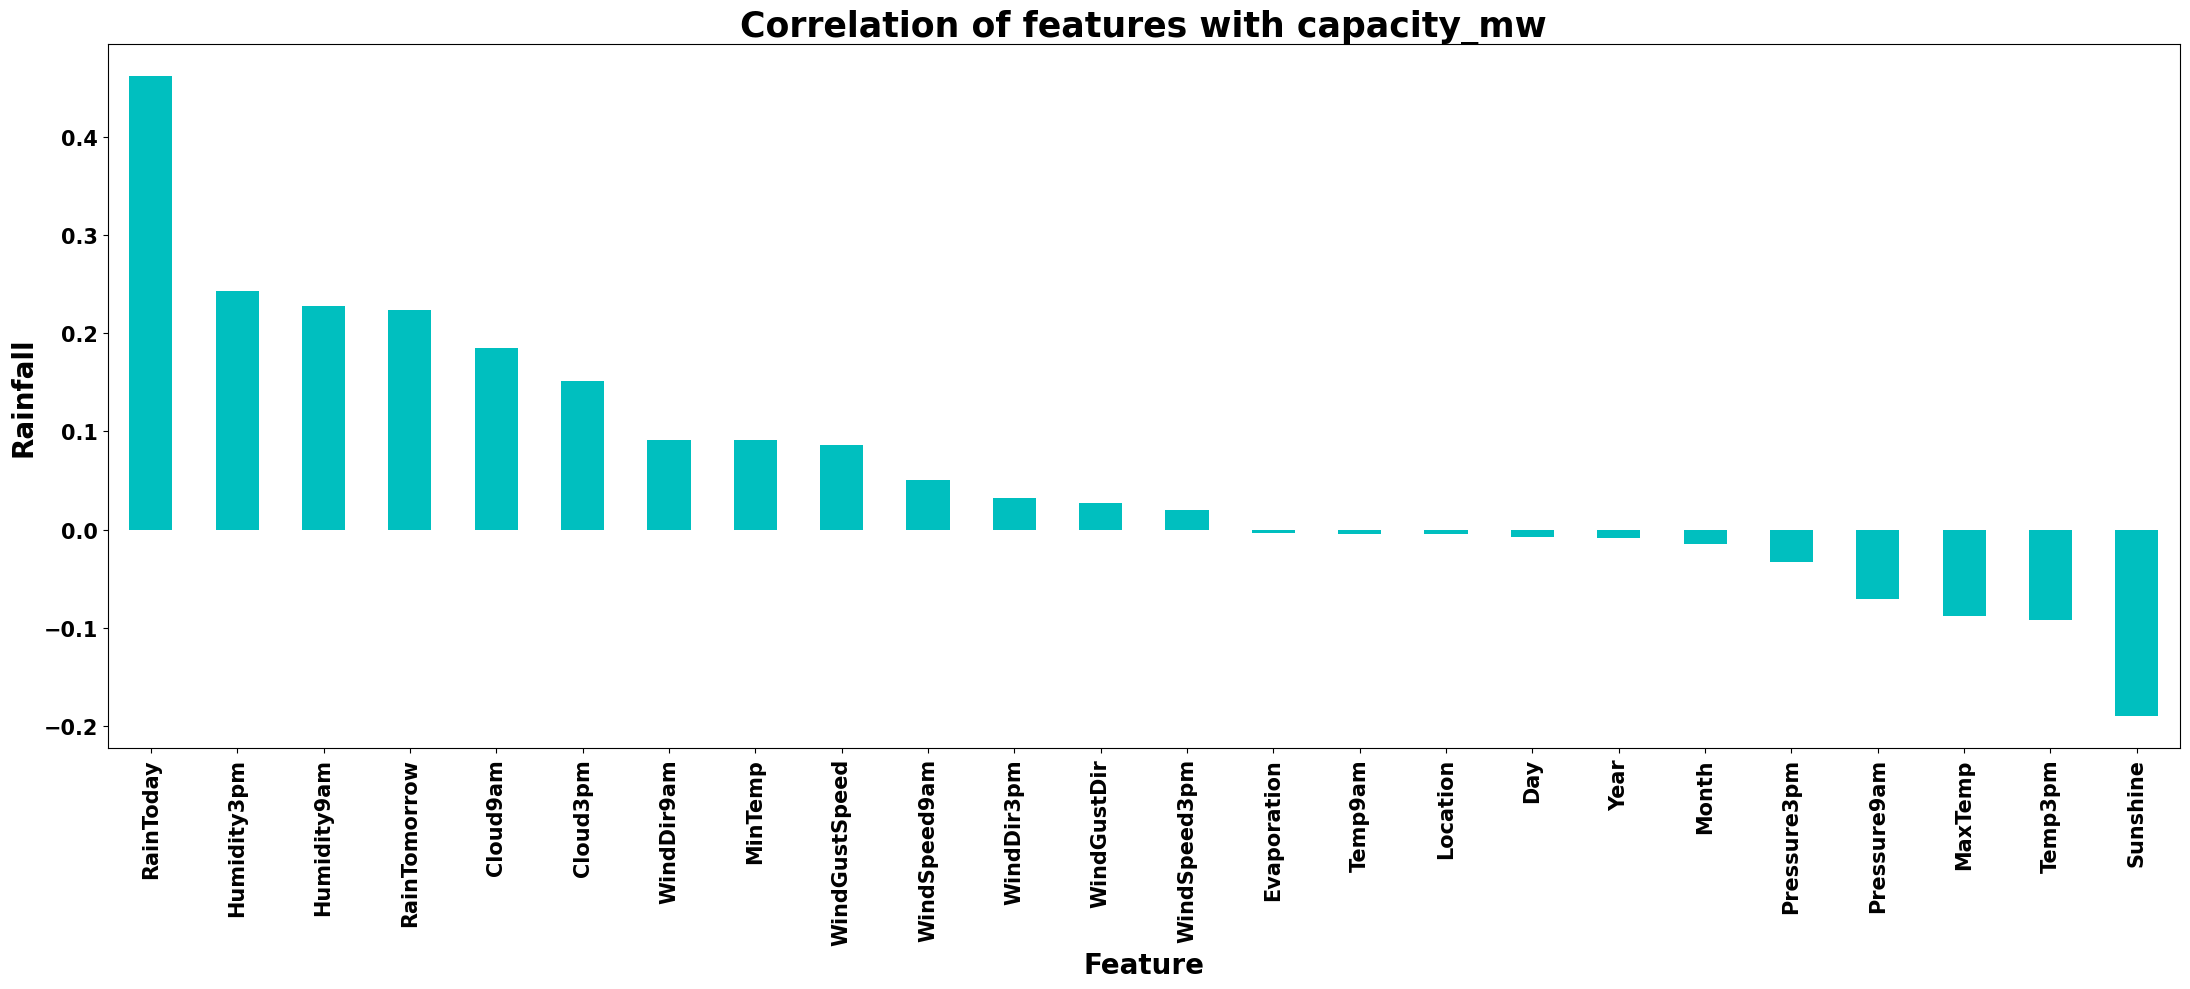

In [69]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('Rainfall',fontsize=20,fontweight='bold')
plt.title('Correlation of features with capacity_mw',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [70]:
corr_r['Rainfall'].sort_values(ascending=False) 

Rainfall         1.000000
RainToday        0.461817
Humidity3pm      0.243005
Humidity9am      0.227943
RainTomorrow     0.223599
Cloud9am         0.184536
Cloud3pm         0.151333
WindDir9am       0.091260
MinTemp          0.090971
WindGustSpeed    0.086519
WindSpeed9am     0.050206
WindDir3pm       0.031770
WindGustDir      0.026811
WindSpeed3pm     0.020421
Evaporation     -0.003746
Temp9am         -0.004365
Location        -0.004972
Day             -0.007989
Year            -0.008516
Month           -0.015187
Pressure3pm     -0.032681
Pressure9am     -0.071082
MaxTemp         -0.087604
Temp3pm         -0.091820
Sunshine        -0.190464
Name: Rainfall, dtype: float64

#### Observations for target variable:
- **There are multiple features with weak corrleations**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation** 
- **Considering -0.015 to 0.015 range as very weak correlation with target variable in this case as there are many features beyond the range of -0.3 to 0.3**
- **Very weak columns are Evaporation, Temp9am, Location, Day, Year, Month**
- **I will check feature scores from SelectKBest algorithm with f-regression test and also with feature importance using ExtraTreeRegressor, then will check if any features have lower score to take futher decisions.**

# Checking Correlations with Target Variable - Classificaiton Task

In [71]:
df_cr2=df_3.copy()

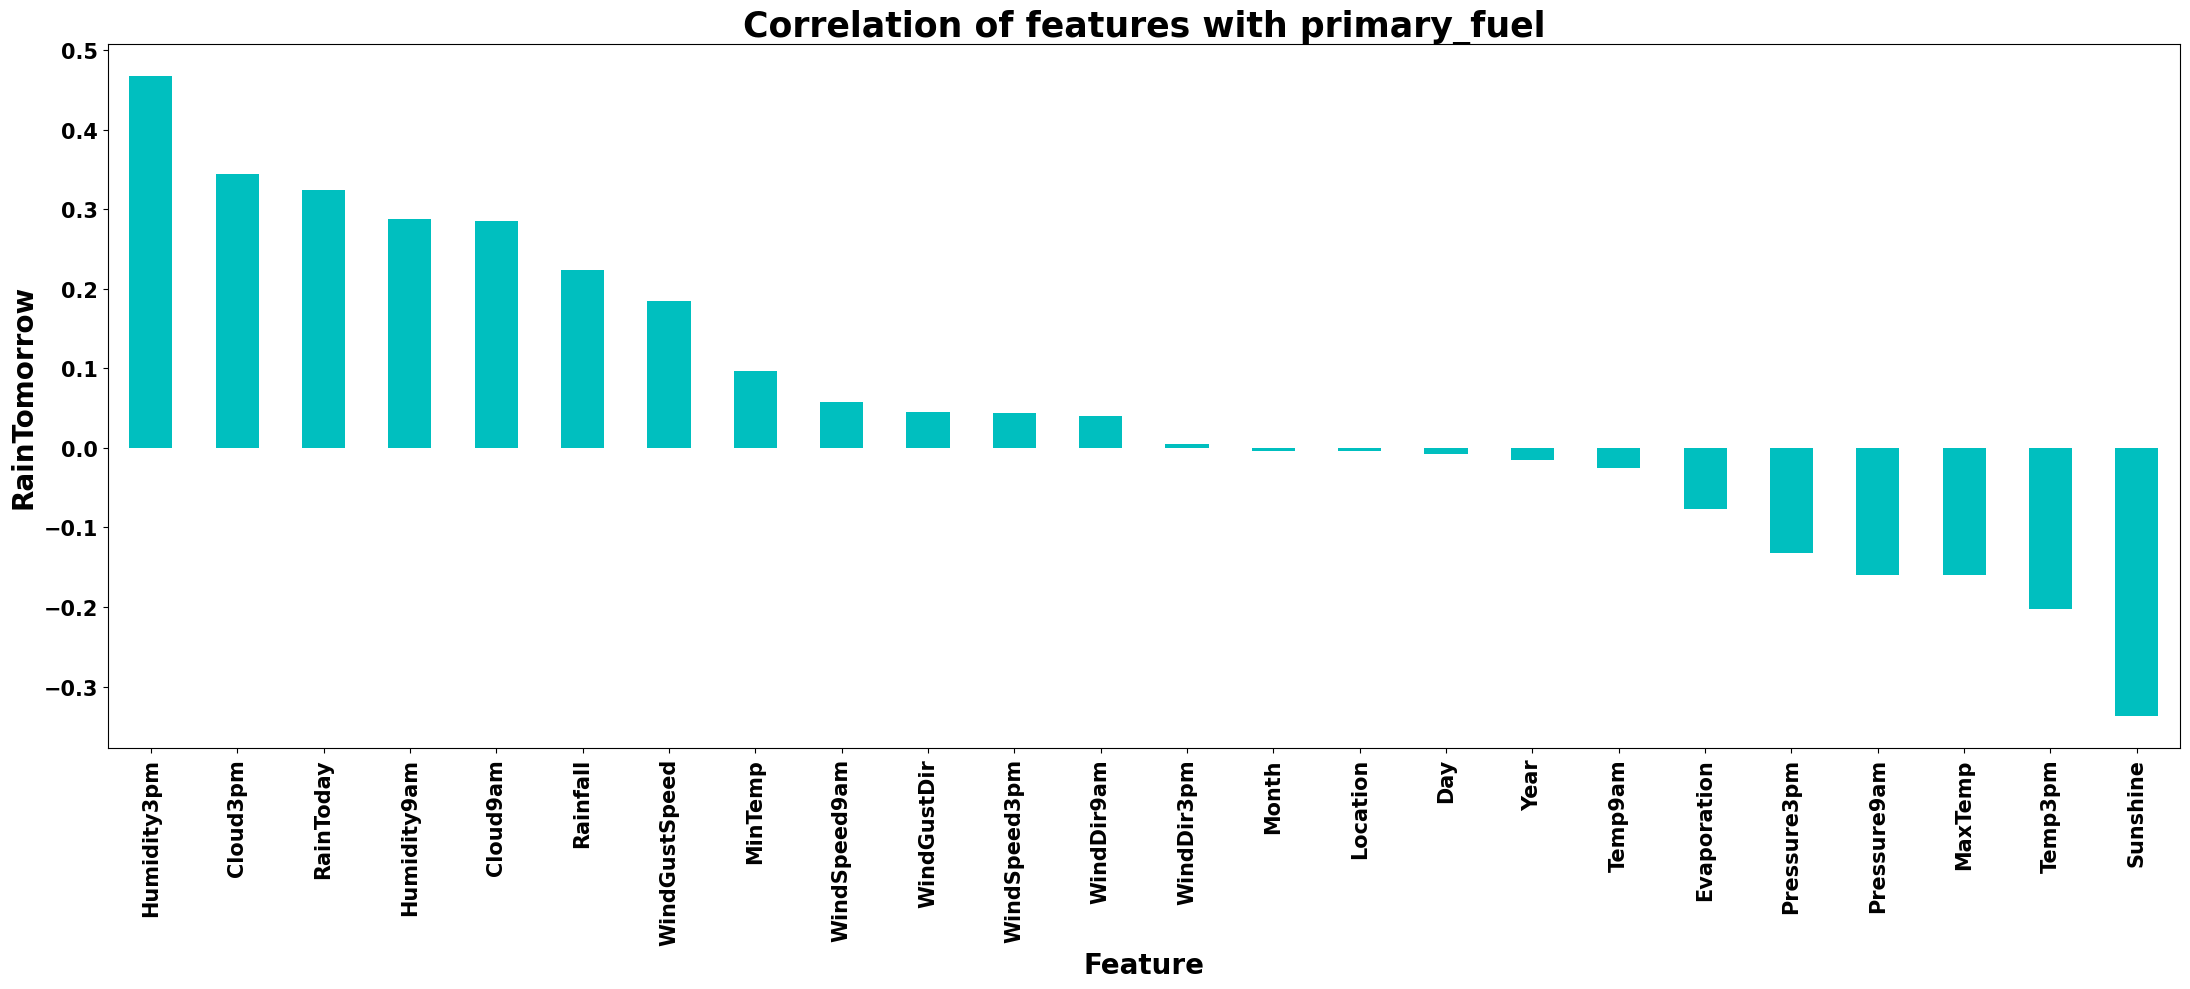

In [72]:
# Plotting the relationship of target variable with other variables in descending order
plt.figure(figsize=(22,10))
corr_r['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=20,fontweight='bold')
plt.ylabel('RainTomorrow',fontsize=20,fontweight='bold')
plt.title('Correlation of features with primary_fuel',fontsize=25,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [73]:
corr_r['RainTomorrow'].sort_values(ascending=False) 

RainTomorrow     1.000000
Humidity3pm      0.466880
Cloud3pm         0.344434
RainToday        0.323691
Humidity9am      0.287808
Cloud9am         0.285715
Rainfall         0.223599
WindGustSpeed    0.184400
MinTemp          0.097173
WindSpeed9am     0.057780
WindGustDir      0.045179
WindSpeed3pm     0.043539
WindDir9am       0.040399
WindDir3pm       0.004301
Month           -0.003575
Location        -0.004506
Day             -0.007560
Year            -0.014769
Temp9am         -0.025768
Evaporation     -0.077340
Pressure3pm     -0.131771
Pressure9am     -0.159170
MaxTemp         -0.160063
Temp3pm         -0.202817
Sunshine        -0.337550
Name: RainTomorrow, dtype: float64

#### Observations for target variable:
#### Observations for target variable:
- **There are multiple features with weak corrleations**
- **Typically we consider the coefficient of correlation between -0.3 to 0.3 as weak correlation** 
- **Considering -0.015 to 0.015 range as very weak correlation with target variable in this case as there are many features beyond the range of -0.3 to 0.3**
- **Very weak columns are WindDir3pm, Month, Location, Day, Year**
- **I will check feature scores from SelectKBest algorithm with ANOVA F values and also with feature importance using ExtraTreeClassifier, then will check if any features have lower score to take futher decisions.**

# Checking top features using SelectKBest algorithm - Regression Task

In [74]:
#sklearn.feature_selection.f_regression
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression    # Using f_regression test


x=df_cr1.drop('Rainfall',axis=1)  # #independent columns
y=df_cr1['Rainfall']  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))#print 18 best features


            Specs        Score
19      RainToday  1832.586983
12    Humidity3pm   424.240092
11    Humidity9am   370.486520
23   RainTomorrow   355.764188
4        Sunshine   254.460825
15       Cloud9am   238.317680
16       Cloud3pm   158.444634
18        Temp3pm    57.478105
7      WindDir9am    56.773260
1         MinTemp    56.410258
2         MaxTemp    52.280692
6   WindGustSpeed    50.983681
13    Pressure9am    34.329214
9    WindSpeed9am    17.082557
14    Pressure3pm     7.227746
8      WindDir3pm     6.830110
5     WindGustDir     4.862777
10   WindSpeed3pm     2.820188


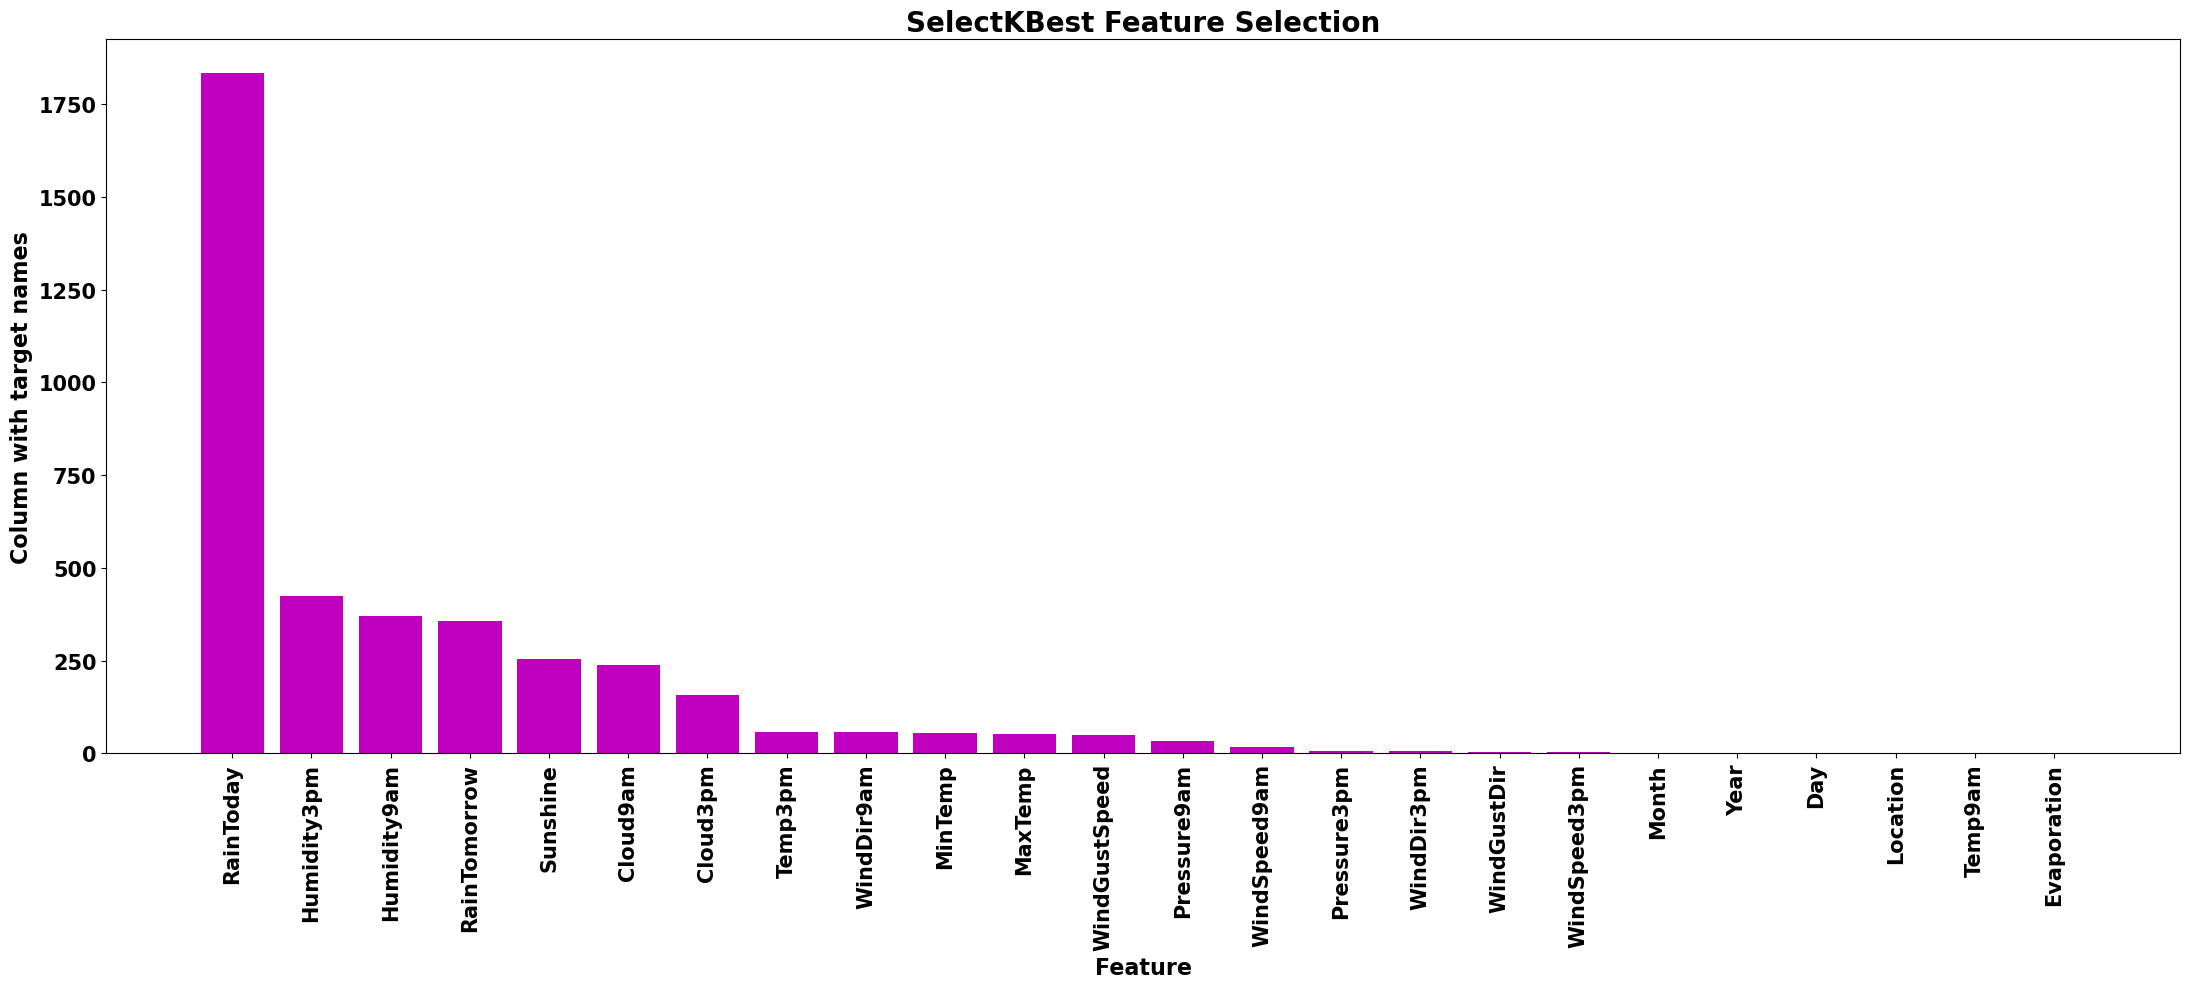

In [75]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Column with target names",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

# Checking top features using SelectKBest algorithm - Classification Task

In [76]:
#sklearn.feature_selection.f_classif
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif            # SelectKBest algorithm with ANOVA F-value

x=df_cr2.drop('RainTomorrow',axis=1)  #independent columns
y=df_cr2['RainTomorrow']  # Output variable

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
SelectKBest_scores=featureScores.nlargest(100,'Score')  #Top 100 features
SelectKBest_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs        Score
0     Humidity3pm  1884.243593
1        Cloud3pm   909.918451
2        Sunshine   869.280963
3       RainToday   791.179369
4     Humidity9am   610.524155
5        Cloud9am   600.891080
6        Rainfall   355.764188
7         Temp3pm   289.998490
8   WindGustSpeed   237.953737
9         MaxTemp   177.747072
10    Pressure9am   175.718105
11    Pressure3pm   119.451436
12        MinTemp    64.439901
13    Evaporation    40.678584
14   WindSpeed9am    22.644354
15    WindGustDir    13.826076
16   WindSpeed3pm    12.838852
17     WindDir9am    11.050703
18        Temp9am     4.491401
19           Year     1.474845
20            Day     0.386421
21       Location     0.137258
22     WindDir3pm     0.125069
23          Month     0.086398

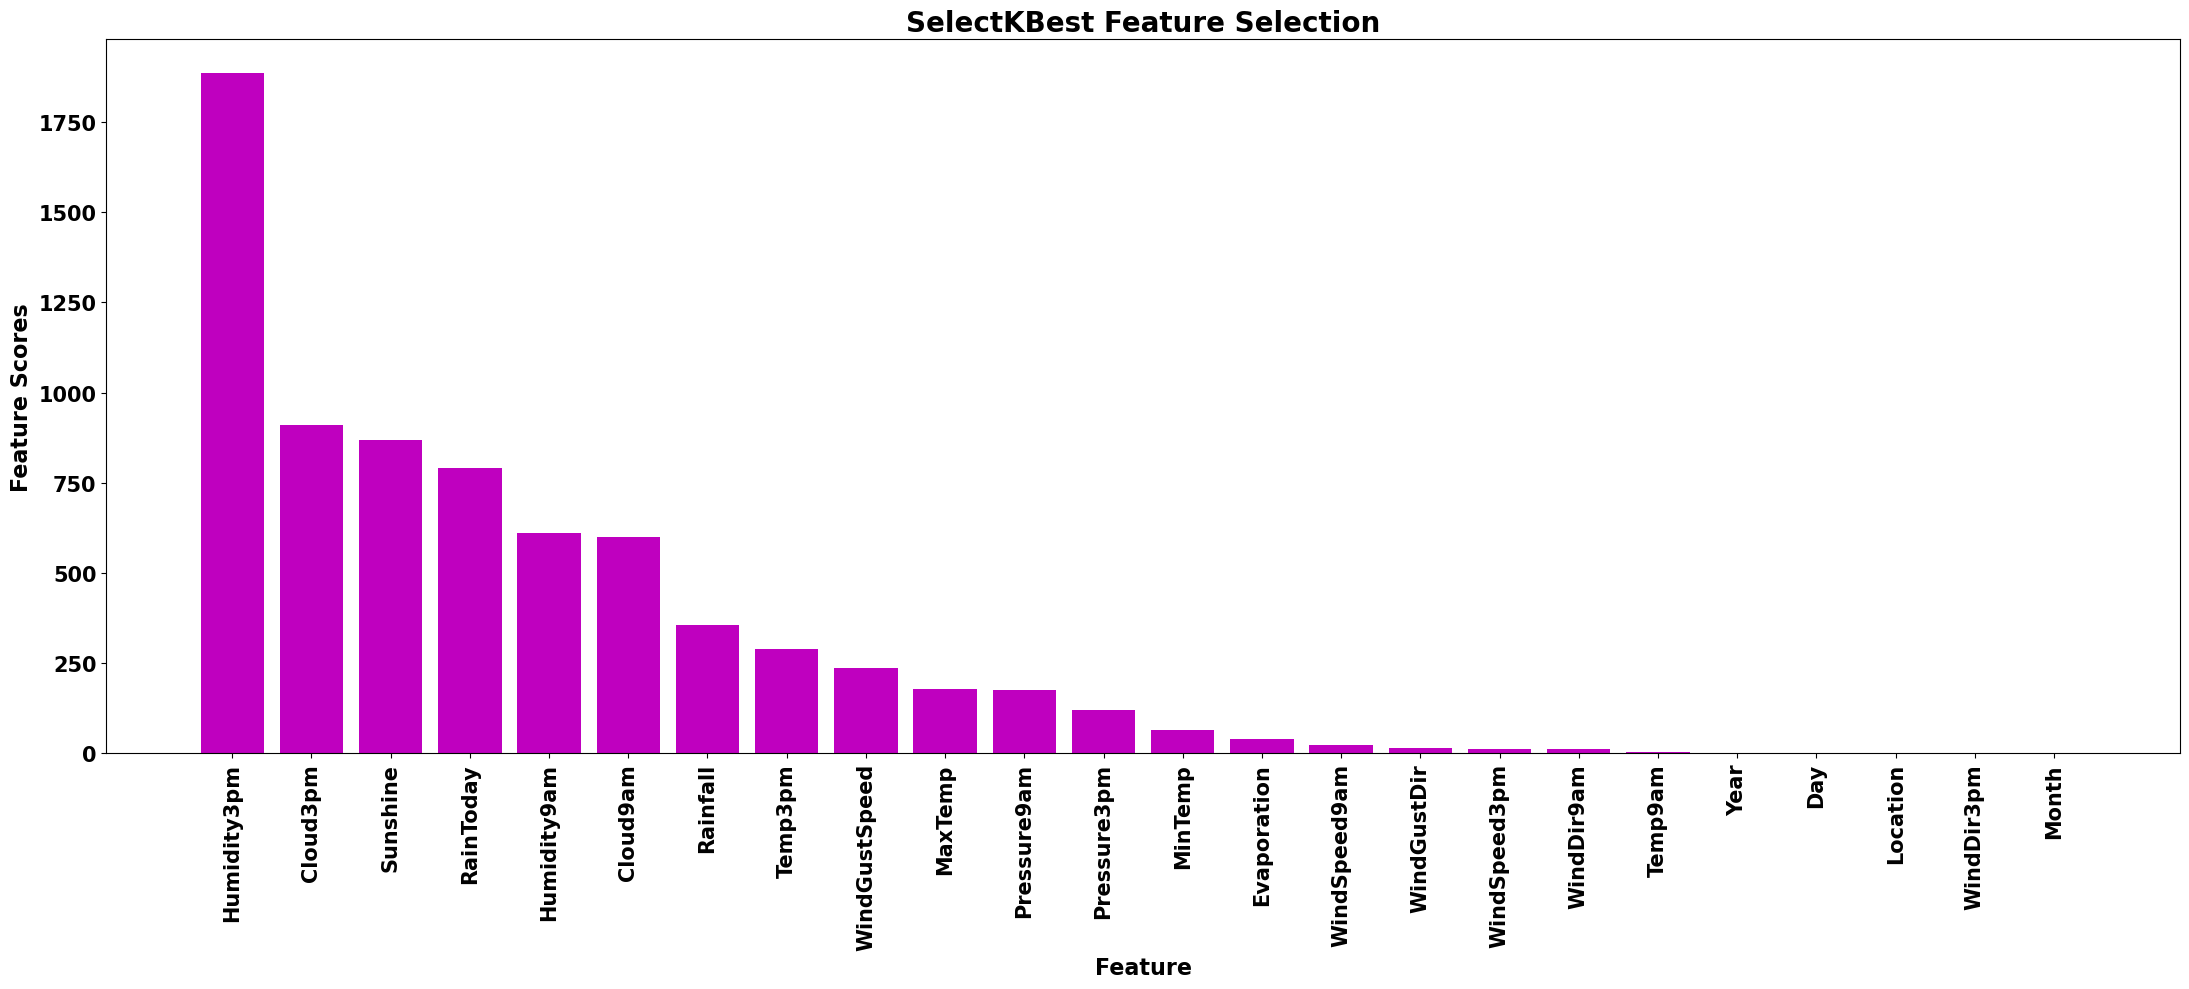

In [77]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("SelectKBest Feature Selection",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

# Checking top features using Feature Importance - Extra Tree Regressor

In [78]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

x=df_cr1.drop('Rainfall',axis=1)  # #independent columns
y=df_cr1['Rainfall']  # Output variable

model = ExtraTreesRegressor()
model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
Feature_Importance_scores=featureScores.nlargest(100,'Score')  #Top 100 features
Feature_Importance_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0       RainToday  0.213275
1        Sunshine  0.056225
2     Pressure3pm  0.049893
3     Humidity9am  0.049623
4           Month  0.043798
5   WindGustSpeed  0.042833
6        Cloud3pm  0.040525
7    WindSpeed9am  0.040296
8     Humidity3pm  0.038662
9     Pressure9am  0.037408
10   WindSpeed3pm  0.035969
11        MinTemp  0.034878
12    WindGustDir  0.033842
13            Day  0.031675
14       Cloud9am  0.031249
15     WindDir9am  0.029598
16        Temp9am  0.028994
17    Evaporation  0.028267
18        Temp3pm  0.027800
19     WindDir3pm  0.024625
20        MaxTemp  0.023326
21           Year  0.022306
22       Location  0.021181
23   RainTomorrow  0.013749

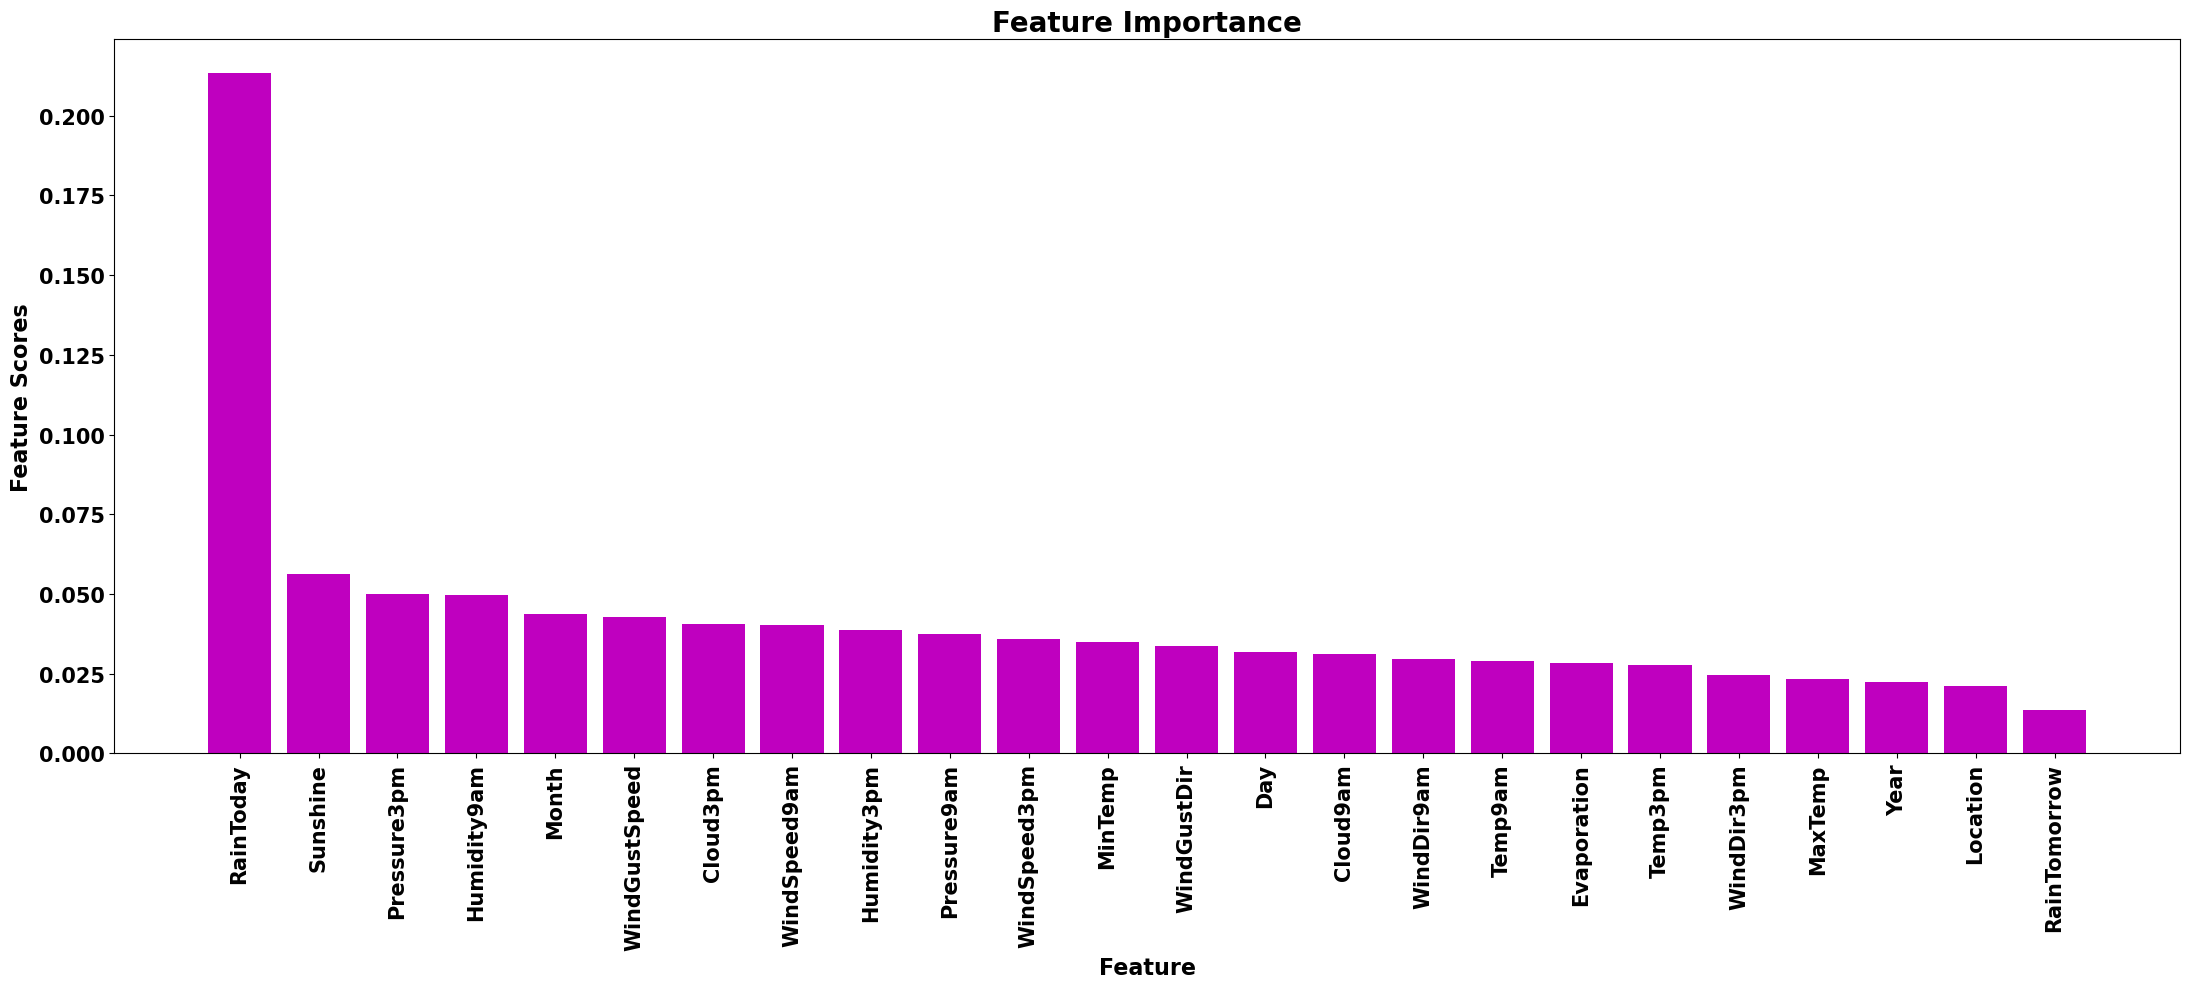

In [79]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

# Checking top features using Feature Importance - Extra Tree Classifier

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

x=df_cr2.drop('RainTomorrow',axis=1)  #independent columns
y=df_cr2['RainTomorrow']  # Output variable

model.fit(x,y)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
feature_importance_scores=featureScores.nlargest(100,'Score')  #Top 100 features
feature_importance_scores.reset_index(drop=True)  # displyaing top 100 features and scores

Specs     Score
0     Humidity3pm  0.117861
1        Cloud3pm  0.067428
2       RainToday  0.057980
3     Humidity9am  0.051602
4        Sunshine  0.051157
5   WindGustSpeed  0.048917
6        Cloud9am  0.042644
7         Temp3pm  0.039805
8         MinTemp  0.036633
9         MaxTemp  0.036563
10   WindSpeed3pm  0.036172
11    Pressure3pm  0.035173
12            Day  0.035019
13        Temp9am  0.034454
14   WindSpeed9am  0.034019
15    Pressure9am  0.033539
16     WindDir3pm  0.033197
17          Month  0.033150
18     WindDir9am  0.032006
19       Rainfall  0.030716
20    WindGustDir  0.030271
21           Year  0.029754
22       Location  0.028315
23    Evaporation  0.023626

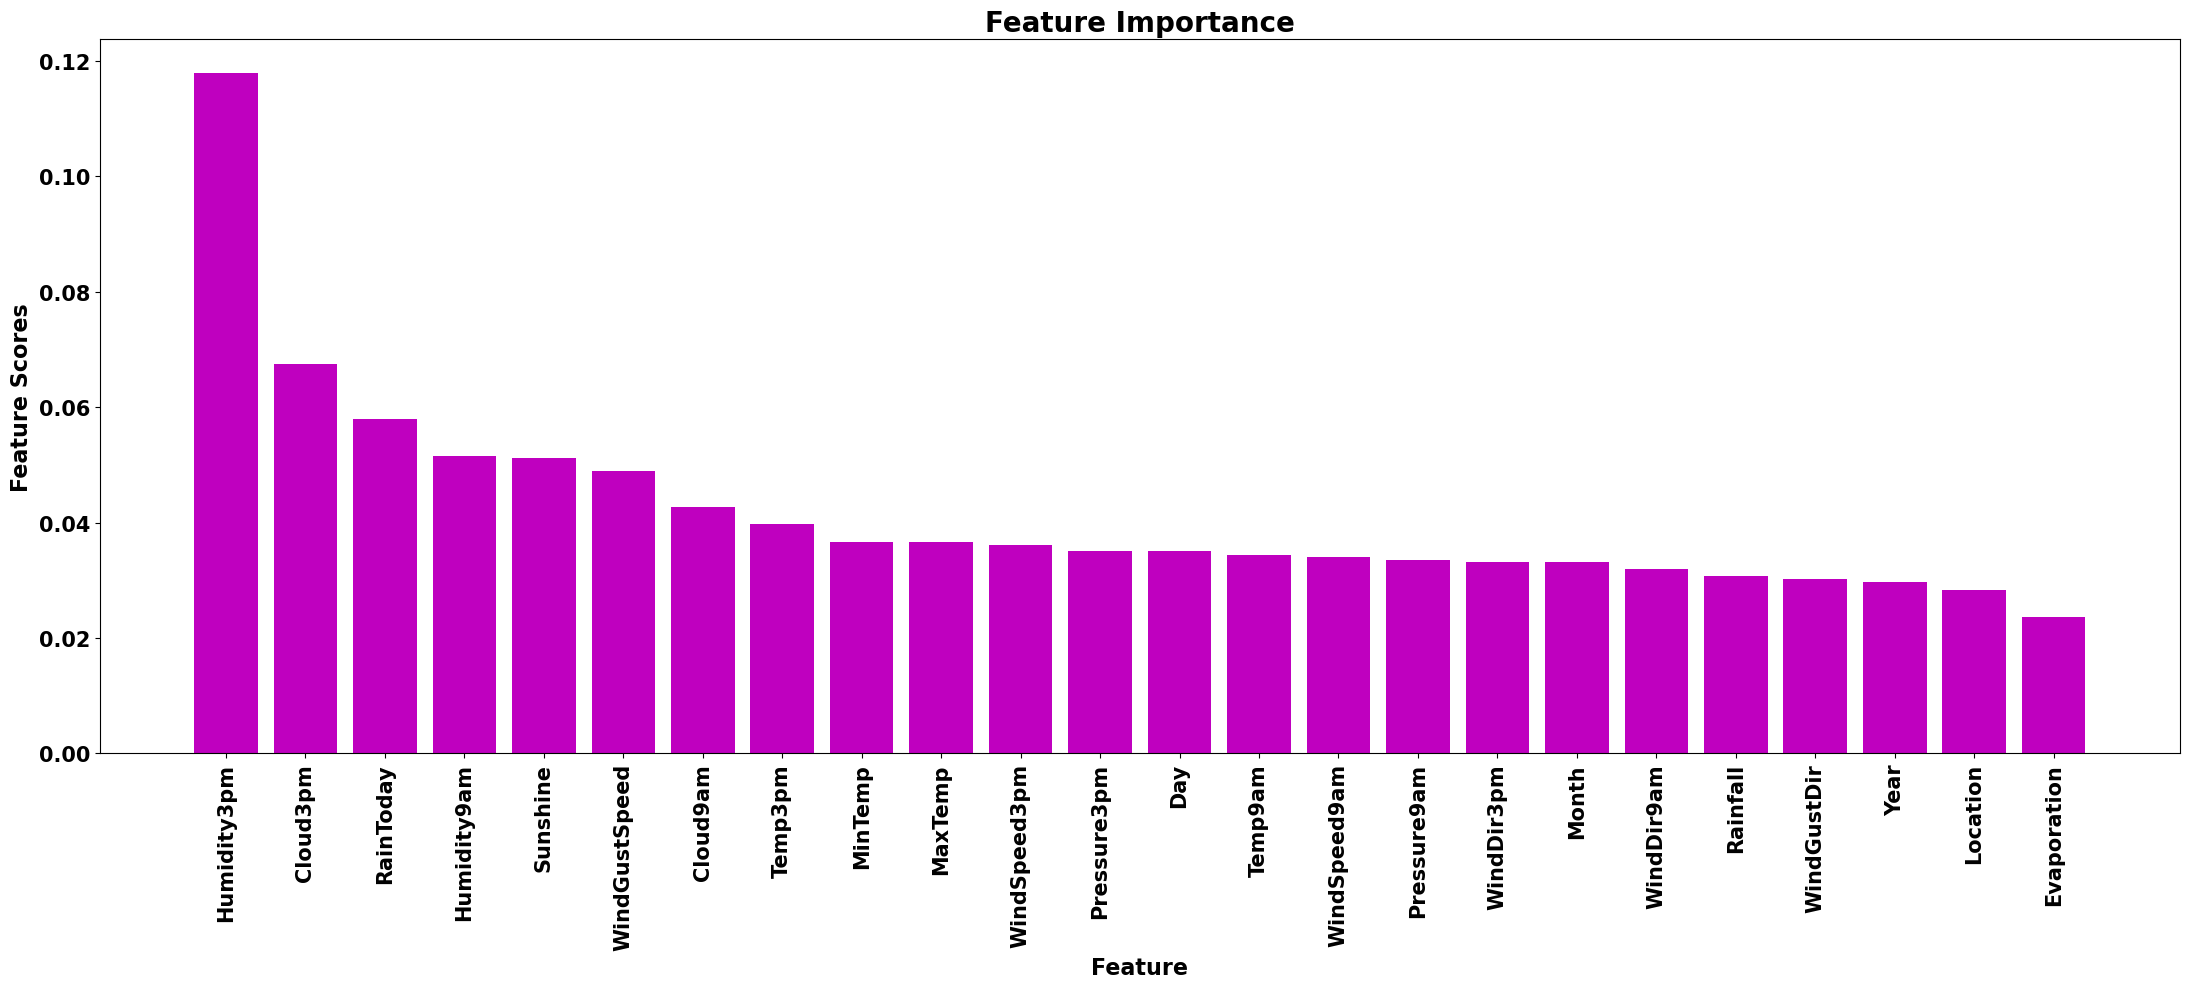

In [81]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(22,10))
plt.bar('Specs','Score',data=df_sorted_desc,color='m')
plt.xlabel("Feature",fontsize=16,fontweight='bold')
plt.ylabel("Feature Scores",fontsize=16,fontweight='bold')
plt.title("Feature Importance",fontsize=20,fontweight='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

### Observations for Regression Task:

- **Based on the observations from all feature selection techniques checked, I can drop the columns "Location" for Regression task as the scores are low in all the techniques**

In [82]:
df_reg=df_3.drop(["Location"],axis=1)
print(df_reg.shape)
df_reg.head(3)

(6762, 24)


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
1     18.1     20.6       1.8          3.4       0.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
1           30.0           5           4           4.0          13.0   
2           44.0          11           8          20.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
1         93.0         92.0       1016.5       1014.1       8.0       8.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
1     19.1     19.1          1  2012.0    5.0   4.0             1  
2     15.4     20.2          1  2011.0   12.0  12.0             1

### Observations for Classification Task:

- **Based on the observations from all feature selection techniques checked, I can drop the columns "Location" for Classification task as the scores are low in all the techniques**

In [83]:
df_clas=df_3.drop(["Location"],axis=1)
print(df_clas.shape)
df_clas.head(3)

(6762, 24)


MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
1     18.1     20.6       1.8          3.4       0.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
1           30.0           5           4           4.0          13.0   
2           44.0          11           8          20.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
1         93.0         92.0       1016.5       1014.1       8.0       8.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
1     19.1     19.1          1  2012.0    5.0   4.0             1  
2     15.4     20.2          1  2011.0   12.0  12.0             1

## To ease EDA, from here onwards, treating regression and classificatin problems seperately

# REGRESSION EDA (To Be Continued)

## Checking Multicollinearity between features using variance_inflation_factor (VIF)

In [84]:
# Checking Multicollinearity between features using variance_inflation_factor (VIF)
# We calculate VIF only for X numerical data as the variance is applicable only for numerical data

In [85]:
# Identifying the X columns with numerical data 

In [86]:
df_reg.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
1     18.1     20.6       1.8          3.4       0.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
1           30.0           5           4           4.0          13.0   
2           44.0          11           8          20.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
1         93.0         92.0       1016.5       1014.1       8.0       8.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
1     19.1     19.1          1  2012.0    5.0   4.0             1  
2     15.4     20.2          1  2011.0   12.0  12.0             1

In [87]:
df_reg_numerical=df_reg.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow','Rainfall'],axis=1)
df_reg_numerical.head(3)

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     18.1     31.0          5.8      13.0           46.0           2.0   
1     18.1     20.6          3.4       0.0           30.0           4.0   
2     12.7     20.9          5.8       7.0           44.0          20.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          17.0         52.0         63.0       1014.2       1012.3       2.0   
1          13.0         93.0         92.0       1016.5       1014.1       8.0   
2          20.0         52.0         40.0       1010.2       1009.7       7.0   

   Cloud3pm  Temp9am  Temp3pm    Year  Month   Day  
0       3.0     27.4     28.2  2010.0    1.0  22.0  
1       8.0     19.1     19.1  2012.0    5.0   4.0  
2       7.0     15.4     20.2  2011.0   12.0  12.0

In [88]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_reg_numerical[list(df_reg_numerical.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF         Column
10  512886.076528    Pressure3pm
9   509139.368959    Pressure9am
15   42530.333960           Year
14     509.536165        Temp3pm
1      437.390548        MaxTemp
13     191.712366        Temp9am
7       62.855424    Humidity9am
0       57.403198        MinTemp
8       46.472245    Humidity3pm
4       21.133164  WindGustSpeed
3       16.961411       Sunshine
12       8.761608       Cloud3pm
11       8.333414       Cloud9am
6        8.267804   WindSpeed3pm
5        5.494046   WindSpeed9am
16       5.281179          Month
17       4.214881            Day
2        3.996032    Evaporation

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features**
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As mosf of the features are with VIF values > 10, I will use PCA to reduce the no. of features**
- **I will apply PCA at the end of EDA after scaling the data**

## Checking Outliers

In [89]:
# We check outliers on X numerical data
df_outliers=df_reg_numerical.copy()
df_outliers.head(5)

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     18.1     31.0          5.8      13.0           46.0           2.0   
1     18.1     20.6          3.4       0.0           30.0           4.0   
2     12.7     20.9          5.8       7.0           44.0          20.0   
3     20.8     31.3          5.0      10.1           31.0           9.0   
4      5.4     16.9          3.4       7.1           52.0          19.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          17.0         52.0         63.0       1014.2       1012.3       2.0   
1          13.0         93.0         92.0       1016.5       1014.1       8.0   
2          20.0         52.0         40.0       1010.2       1009.7       7.0   
3          20.0         76.0         59.0       1012.9       1009.1       6.0   
4          19.0         63.0         77.0       1018.7       1017.4       6.0   

   Cloud3pm  Temp9am  Temp3pm    Year  Month   Day  
0       3.0     27.4     28.2  2010.0    1.0  22.0  
1       8.0     19.1     19.1  2012.0    5.0   4.0  
2       7.0     15.4     20.2  2011.0   12.0  12.0  
3       4.0     24.5     29.9  2012.0    7.0  10.0  
4       5.0     14.0     13.6  2013.0    8.0  16.0

In [90]:
df_outliers.shape

(6762, 18)

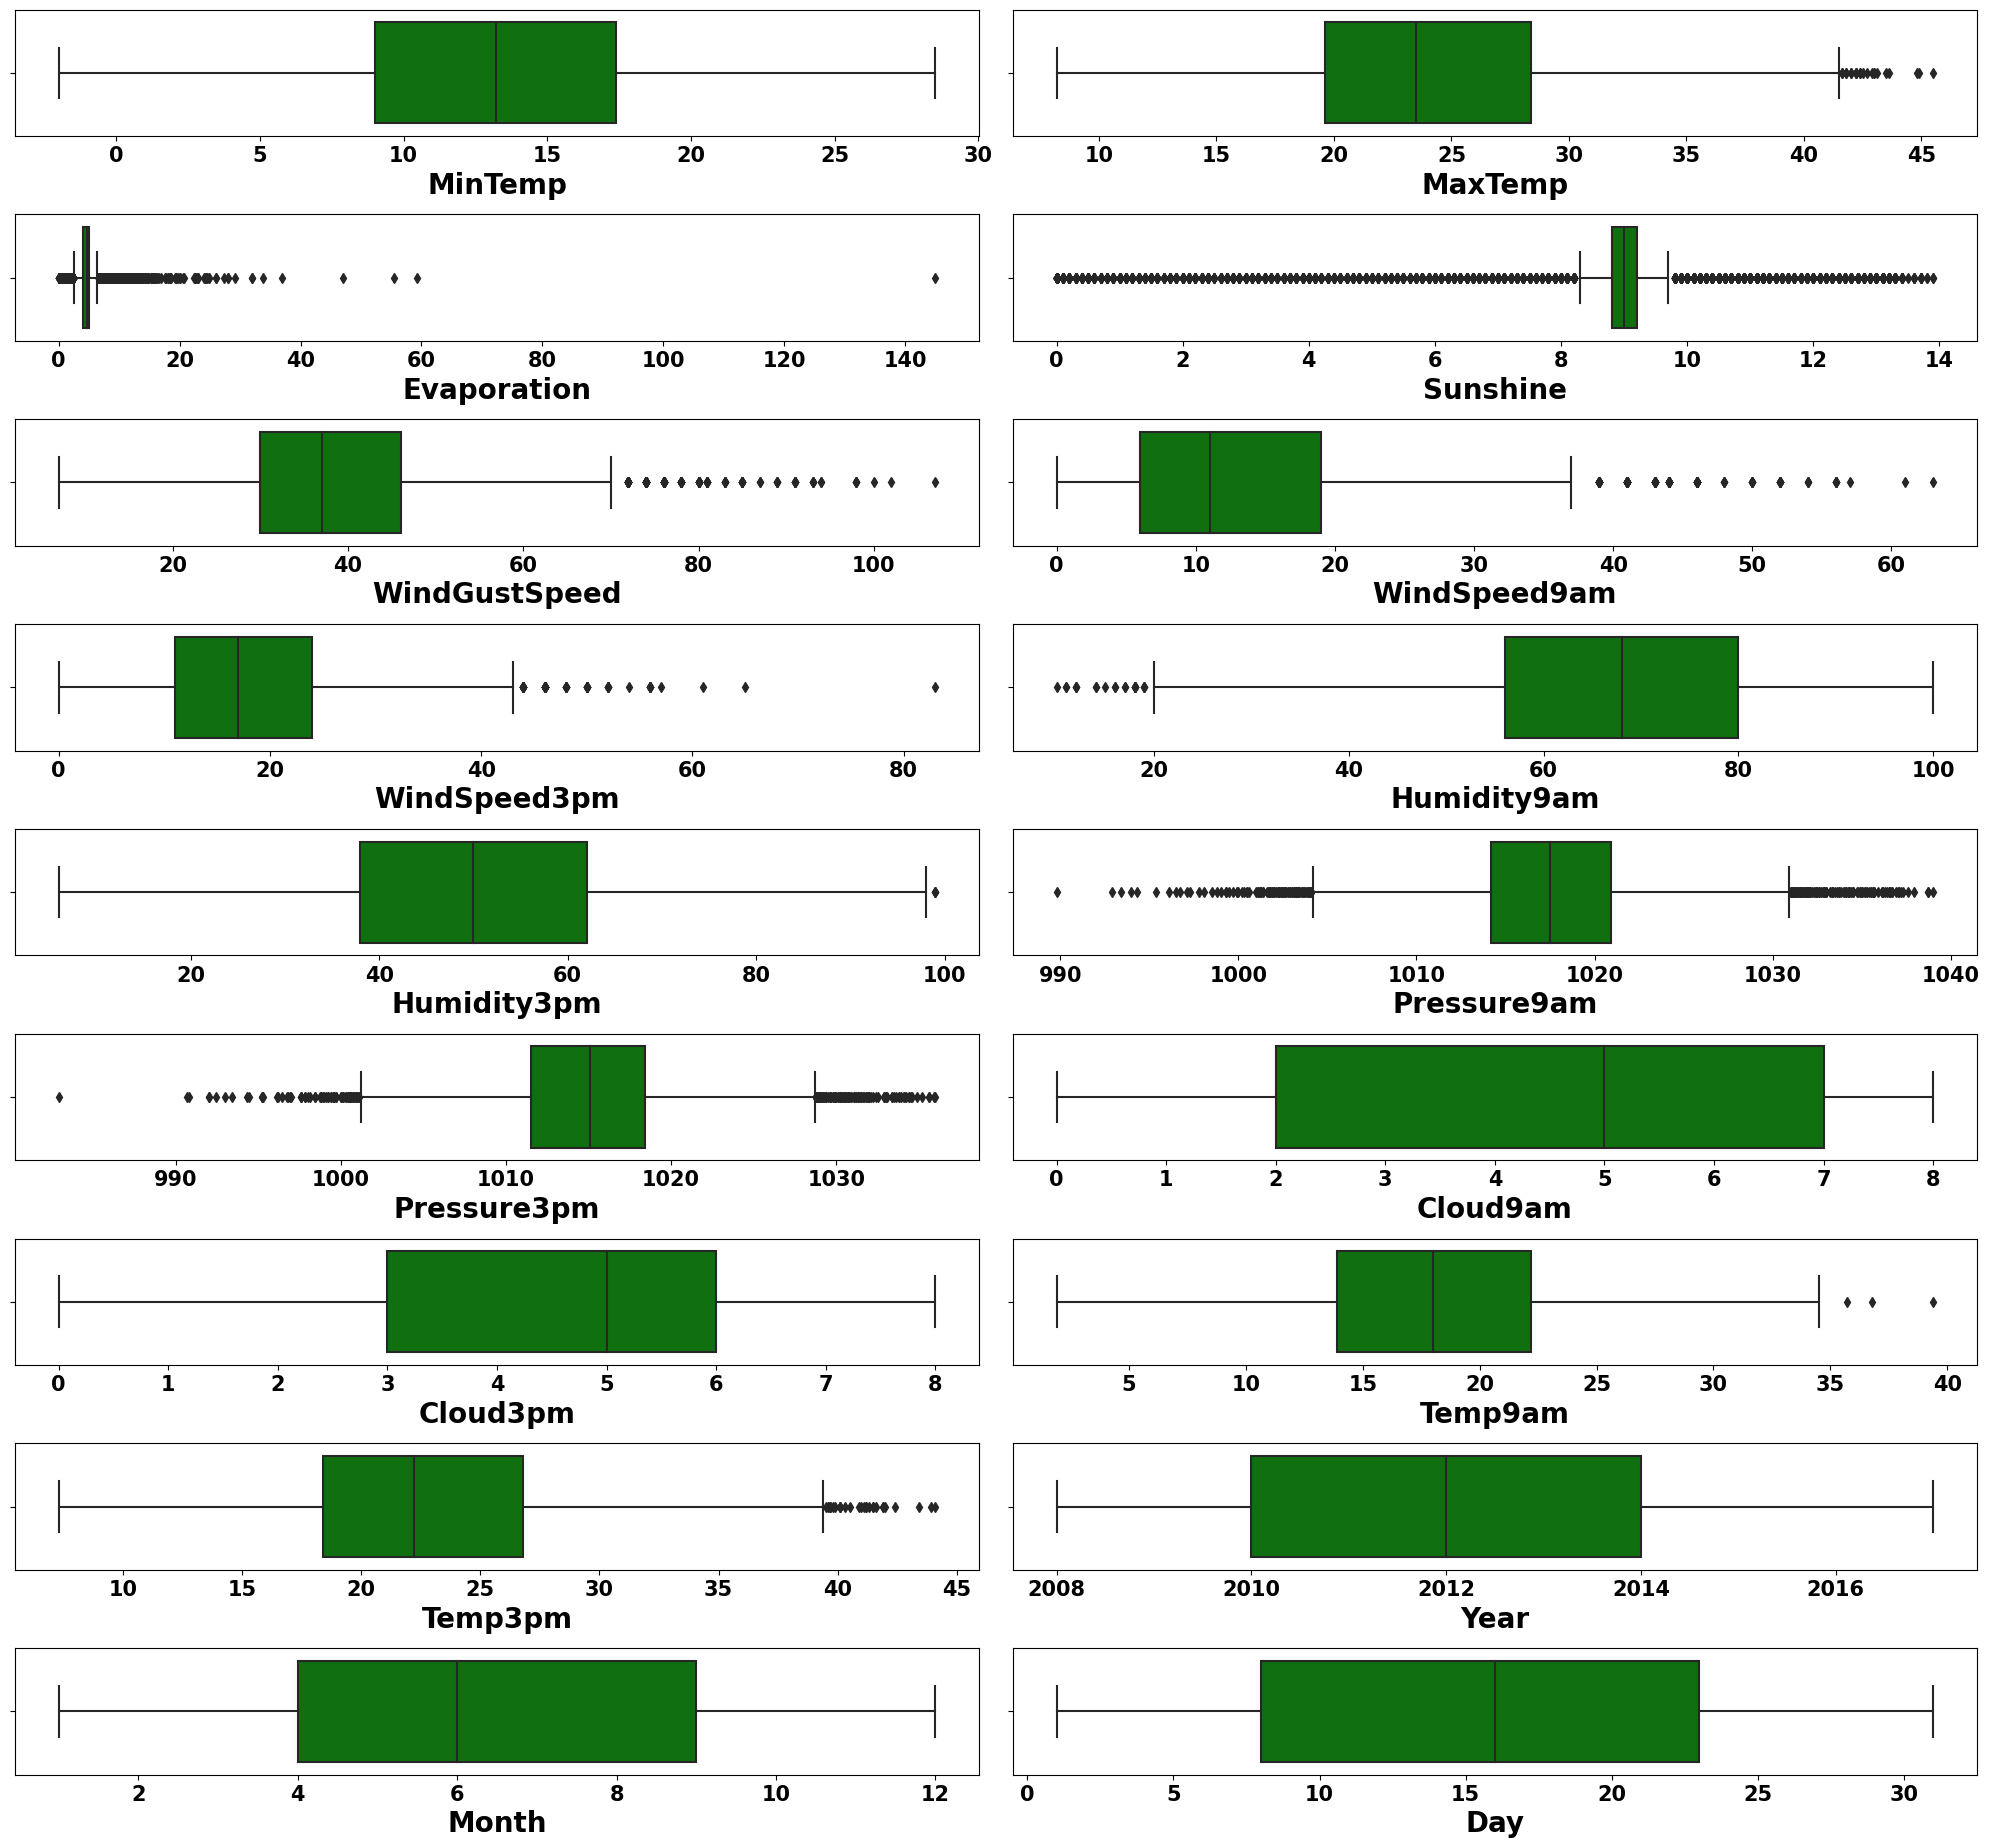

In [91]:
# Checking outliers visually before removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(df_reg[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns**

## Removing Outliers using z-score method

In [92]:
df_outliers.shape

(6762, 18)

In [93]:
df_reg.shape

(6762, 24)

In [94]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([   1,    9,   24,   24,   34,   34,   40,   52,   52,   74,   80,
          82,  115,  115,  122,  127,  132,  146,  158,  169,  196,  197,
         206,  212,  216,  236,  245,  252,  252,  252,  254,  255,  255,
         270,  271,  271,  308,  336,  337,  351,  364,  392,  393,  414,
         427,  477,  491,  549,  573,  580,  582,  598,  611,  663,  693,
         700,  700,  702,  717,  732,  742,  742,  745,  754,  765,  772,
         808,  812,  820,  826,  826,  826,  839,  861,  861,  879,  904,
         929,  934,  934,  962,  991, 1003, 1024, 1024, 1024, 1030, 1030,
        1030, 1036, 1047, 1047, 1049, 1063, 1073, 1073, 1105, 1114, 1118,
        1135, 1139, 1155, 1167, 1180, 1180, 1182, 1182, 1211, 1260, 1268,
        1350, 1365, 1365, 1385, 1439, 1439, 1495, 1514, 1517, 1518, 1518,
        1518, 1604, 1604, 1618, 1658, 1663, 1670, 1682, 1753, 1773, 1773,
        1779, 1781, 1792, 1792, 1809, 1809, 1829, 1834, 1846, 1847, 1895,
        1917, 1950, 1951, 1965, 2001, 

In [95]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_reg_1=df_reg[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

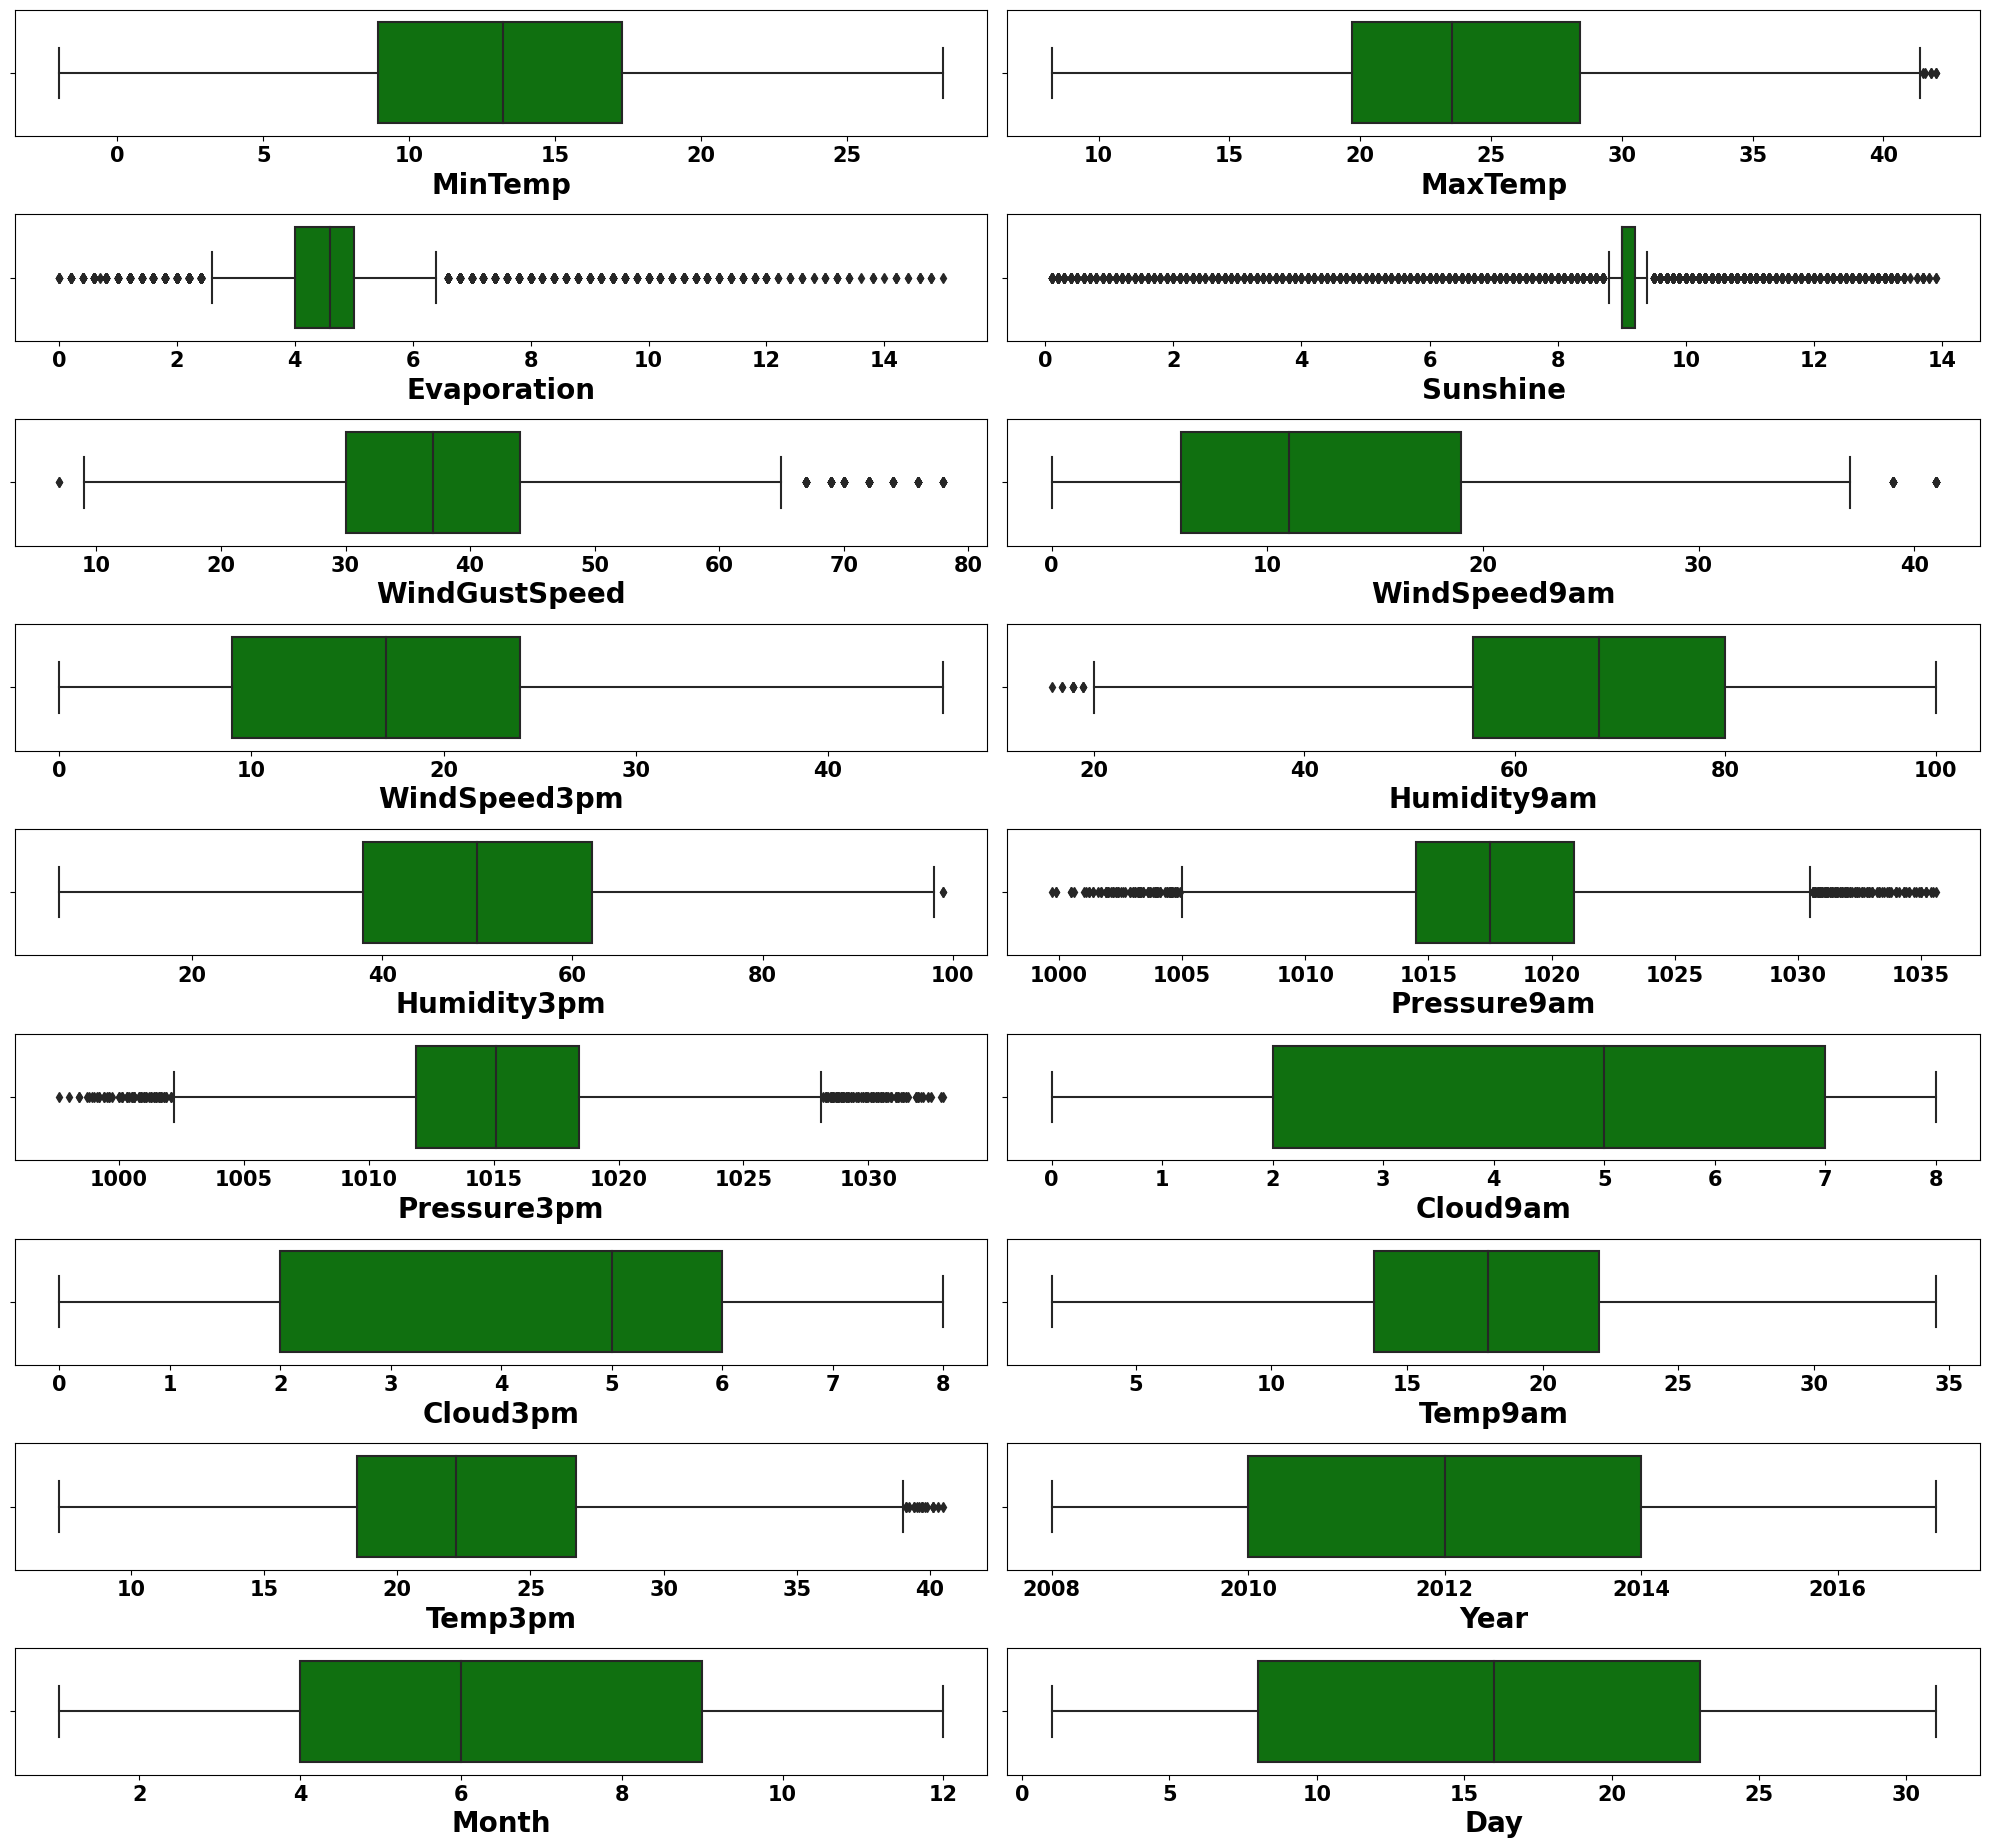

In [96]:
# Checking outliers visually after removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(df_reg_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [97]:
df_reg_1.shape

(6378, 24)

In [98]:
df_reg.shape

(6762, 24)

In [99]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df_reg.shape[0]-df_reg_1.shape[0])/df_reg.shape[0]*100,1)
loss_percent_zscore

5.7

#### Observations:
- **Data loss with z-score method is 5.7%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

## Removing Outliers using IQR method

In [100]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_reg_2 = df_reg[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

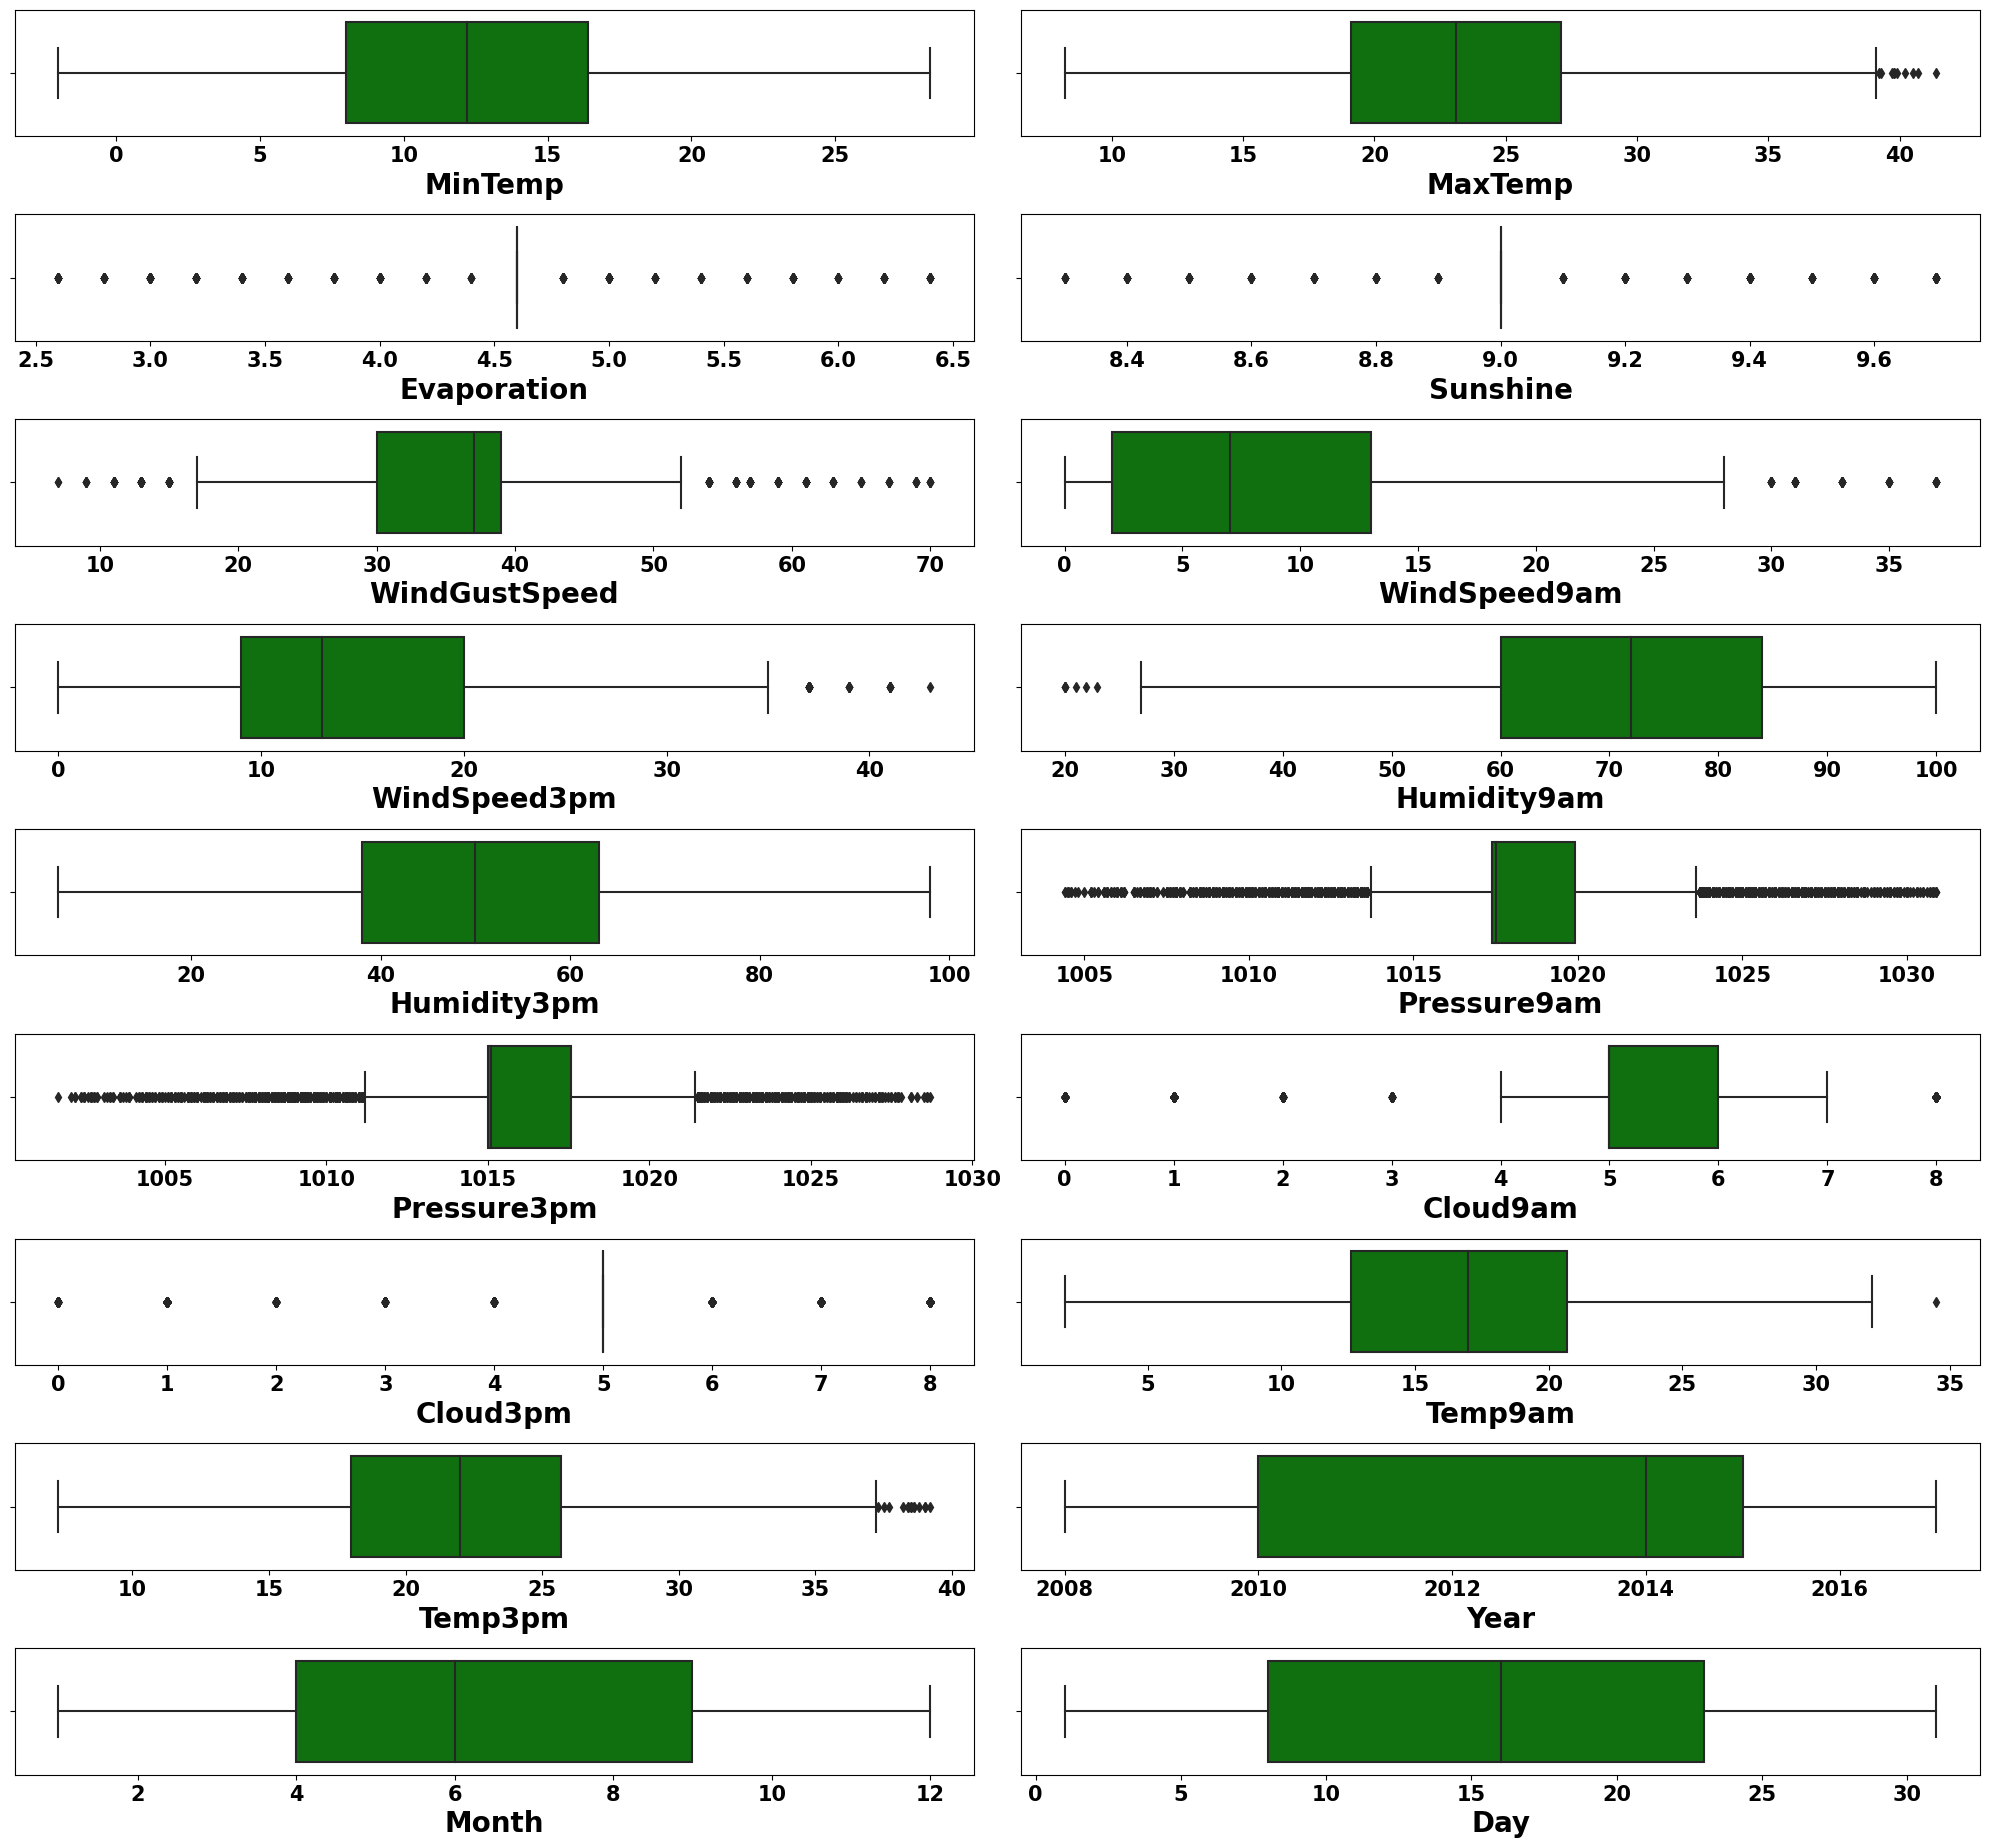

In [101]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.boxplot(df_reg_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [102]:
df_reg_2.shape

(3078, 24)

In [103]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df_reg.shape[0]-df_reg_2.shape[0])/df_reg.shape[0]*100,1)
display(loss_percent_IQR)

54.5

#### Observations: 
- **Data loss with IQR is 54.5% which is higher than data loss with z-score (5.7%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [104]:
df_reg_1.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   
3     20.8     31.3       0.0          5.0      10.1            6   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
2           44.0          11           8          20.0          20.0   
3           31.0          11           3           9.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   
3         76.0         59.0       1012.9       1009.1       6.0       4.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
2     15.4     20.2          1  2011.0   12.0  12.0             1  
3     24.5     29.9          0  2012.0    7.0  10.0             0

In [105]:
x_reg=df_reg_1.drop(['Rainfall'],axis=1)
y_reg=df_reg_1['Rainfall'].copy()
df_reg=df_reg_1

In [106]:
x_reg.head(3)

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0     18.1     31.0          5.8      13.0            4           46.0   
2     12.7     20.9          5.8       7.0           11           44.0   
3     20.8     31.3          5.0      10.1            6           31.0   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          10           4           2.0          17.0         52.0   
2          11           8          20.0          20.0         52.0   
3          11           3           9.0          20.0         76.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         63.0       1014.2       1012.3       2.0       3.0     27.4   
2         40.0       1010.2       1009.7       7.0       7.0     15.4   
3         59.0       1012.9       1009.1       6.0       4.0     24.5   

   Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     28.2          0  2010.0    1.0  22.0             0  
2     20.2          1  2011.0   12.0  12.0             1  
3     29.9          0  2012.0    7.0  10.0             0

In [107]:
y_reg.head(3)

0     0.0
2    34.6
3     0.0
Name: Rainfall, dtype: float64

## Skewness Check

In [108]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with numerical data 
# Segregating numerical X features to check skewness
df_num=x_reg.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'],axis=1)

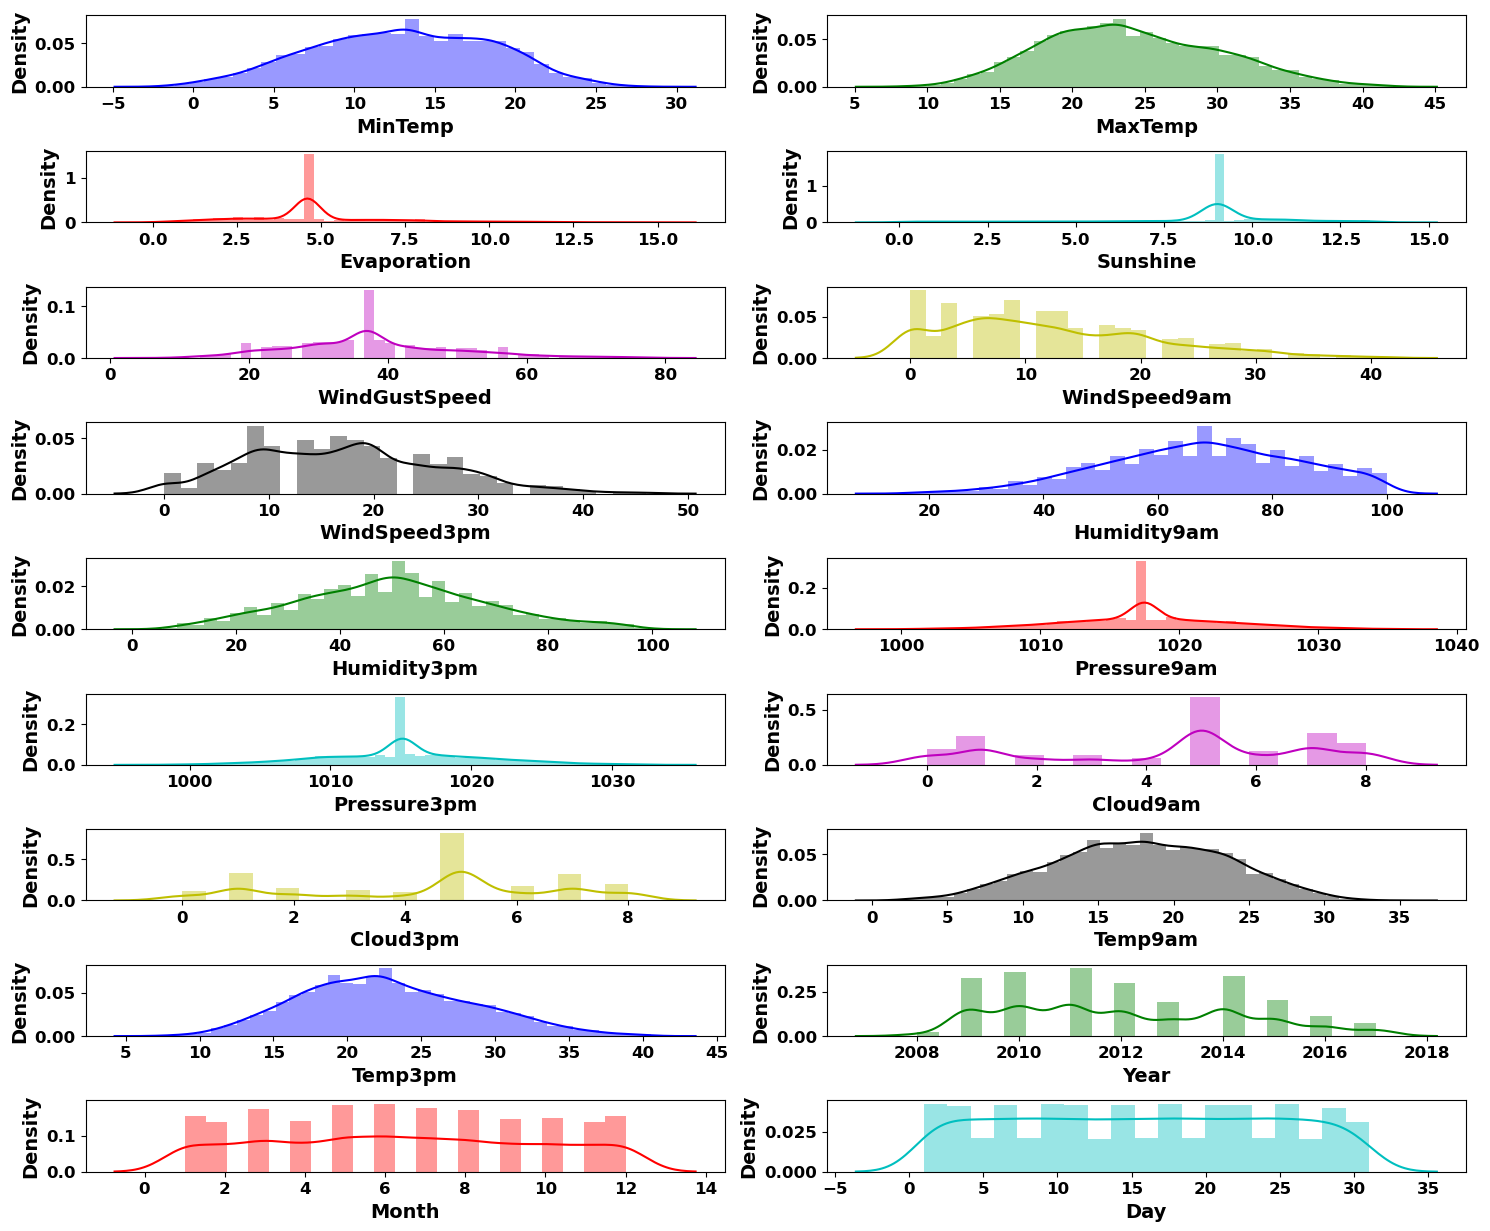

In [109]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_num.columns:
    if plotnum<=30:
        plt.subplot(15,2,plotnum)
        sns.distplot(df_num[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [110]:
df_num.skew().sort_values(ascending=False) 

Evaporation      1.139107
WindSpeed9am     0.679763
WindGustSpeed    0.545444
WindSpeed3pm     0.344701
Year             0.339277
Temp3pm          0.292643
MaxTemp          0.269105
Humidity3pm      0.136990
Pressure3pm      0.088894
Pressure9am      0.079132
Month            0.035407
Day              0.006358
Temp9am         -0.075509
MinTemp         -0.081476
Humidity9am     -0.230358
Cloud3pm        -0.377900
Cloud9am        -0.407790
Sunshine        -1.354937
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various transformation techniques to reduce the skewness and will consider the one with lowest skewness**

### Transforming data to reduce skewness

In [111]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_num)
x_tra=pd.DataFrame(data=x_pwr,columns=df_num.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

Evaporation      0.060525
WindGustSpeed    0.009085
Pressure9am      0.000000
Year             0.000000
Pressure3pm      0.000000
Temp3pm         -0.014551
MaxTemp         -0.016407
Humidity3pm     -0.037838
Temp9am         -0.062736
Humidity9am     -0.068637
WindSpeed3pm    -0.077677
Sunshine        -0.110054
MinTemp         -0.113833
WindSpeed9am    -0.132054
Month           -0.150412
Day             -0.211434
Cloud3pm        -0.281386
Cloud9am        -0.332914
dtype: float64

#### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-0.3,+0.3) which is inside the range of -0.5 to 0.5**

In [112]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_num)
x_qtr=pd.DataFrame(data=x_qt,columns=df_num.columns)
x_qtr.skew().sort_values(ascending=False)

Cloud9am         0.027042
Cloud3pm         0.026137
Year             0.025085
Sunshine         0.015767
Month            0.001084
Pressure3pm      0.000656
WindGustSpeed    0.000359
Pressure9am      0.000288
MaxTemp          0.000149
Humidity9am     -0.000023
Temp3pm         -0.000114
Temp9am         -0.000206
MinTemp         -0.000267
Humidity3pm     -0.000419
WindSpeed3pm    -0.004936
Day             -0.007189
Evaporation     -0.008714
WindSpeed9am    -0.088735
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method and better compared to PowerTransformer method**
- **Skewness range: (-0.08,+0.08) which is within the range of -0.5 to 0.5 which is fairly symmetrical**
- **Selected the transformed data from QuantileTransformer method**

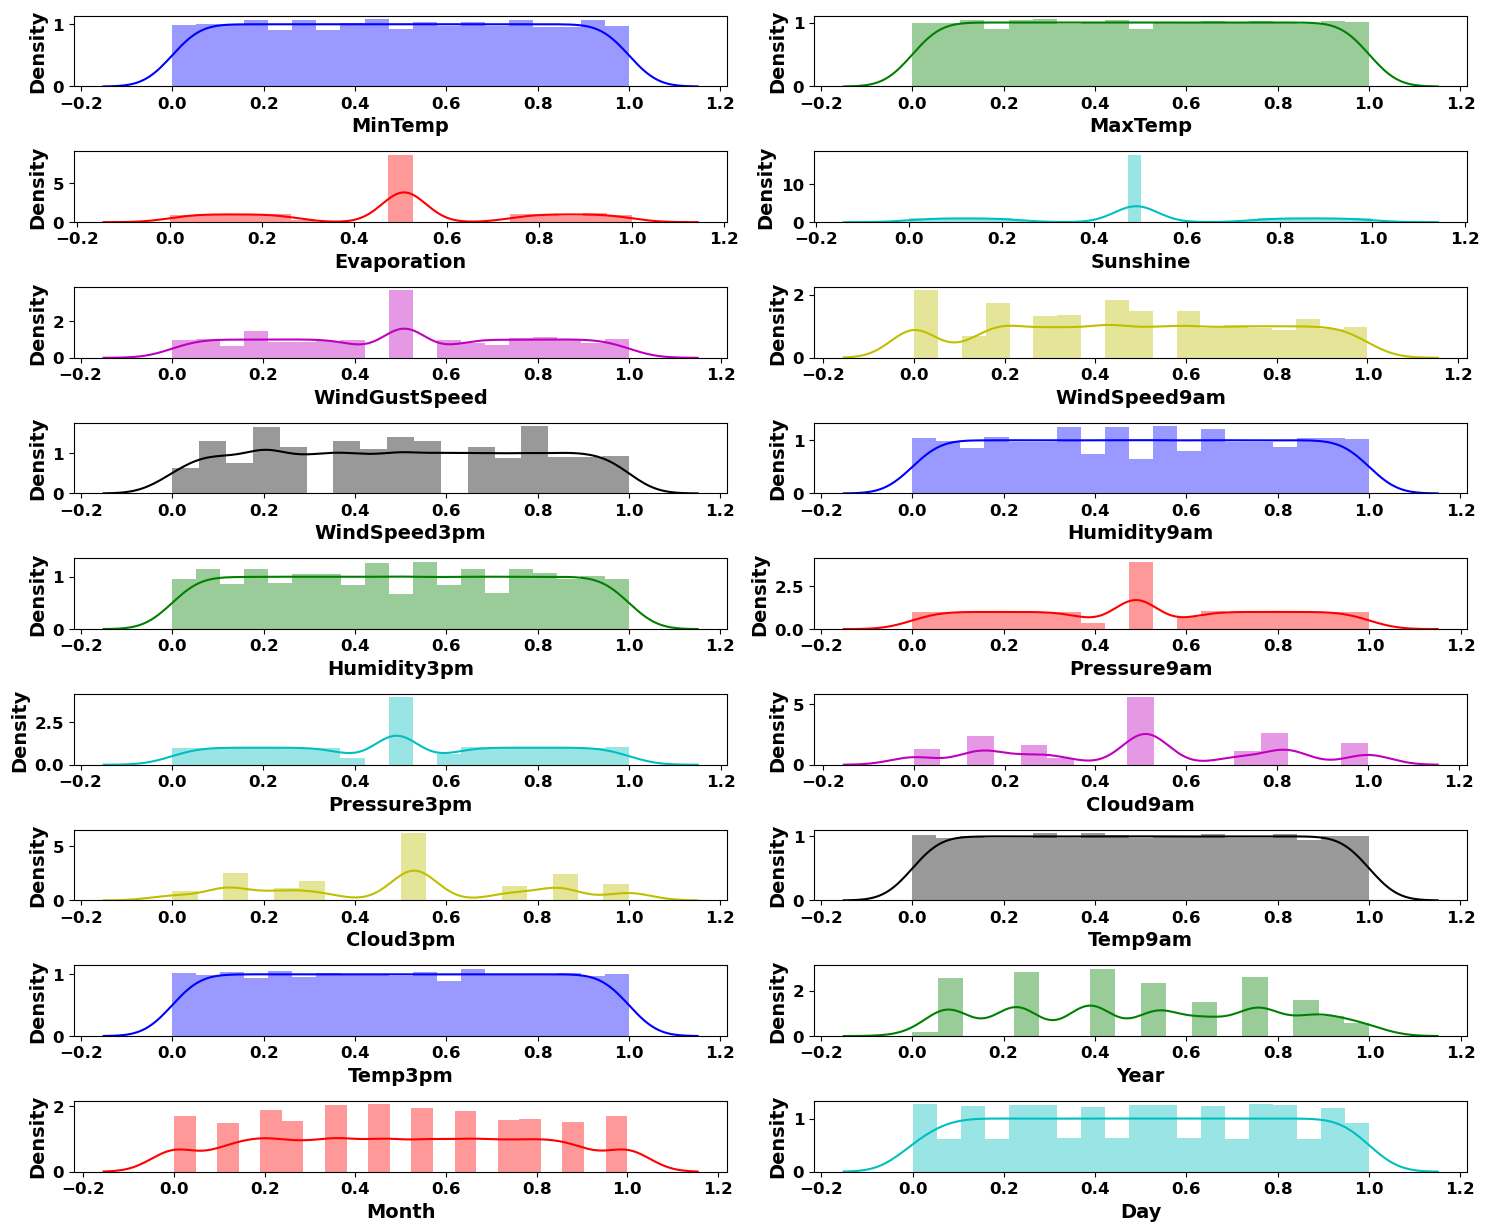

In [113]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=30:
        plt.subplot(15,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [114]:
x_reg.shape

(6378, 23)

In [115]:
x_reg.tail(5) # x data including both numerical and categorical features

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
6757     14.2     31.3          7.8      13.1           12           41.0   
6758      2.8     16.0          0.0       7.8            9           35.0   
6759     13.0     20.6          3.0       1.1            5           43.0   
6760     17.0     29.8          4.6       9.0            5           31.0   
6761     19.4     27.8          3.0       3.0            2           52.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
6757           0          12          22.0          28.0         44.0   
6758           3           8           0.0          24.0         75.0   
6759           5           4          28.0          13.0         41.0   
6760           5           5           6.0          17.0         86.0   
6761          12           2          11.0          15.0         76.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6757         35.0       1012.7       1008.9       0.0       1.0     23.8   
6758         52.0       1027.8       1025.7       0.0       3.0      9.0   
6759         45.0       1023.8       1020.3       7.0       8.0     17.1   
6760         48.0       1017.5       1015.1       5.0       5.0     18.5   
6761         63.0       1013.6       1012.9       7.0       7.0     24.1   

      Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
6757     29.5          0  2011.0   12.0  20.0             0  
6758     15.2          0  2012.0    7.0  12.0             0  
6759     19.7          0  2014.0    6.0   7.0             0  
6760     28.2          0  2015.0    3.0  23.0             0  
6761     26.9          1  2010.0    2.0   1.0             1

In [116]:
new_x=x_reg.reset_index(drop=True)  # reset the index of x data

In [117]:
new_x.tail(5) # x data including both numerical and categorical features after resetting the index

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
6373     14.2     31.3          7.8      13.1           12           41.0   
6374      2.8     16.0          0.0       7.8            9           35.0   
6375     13.0     20.6          3.0       1.1            5           43.0   
6376     17.0     29.8          4.6       9.0            5           31.0   
6377     19.4     27.8          3.0       3.0            2           52.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
6373           0          12          22.0          28.0         44.0   
6374           3           8           0.0          24.0         75.0   
6375           5           4          28.0          13.0         41.0   
6376           5           5           6.0          17.0         86.0   
6377          12           2          11.0          15.0         76.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6373         35.0       1012.7       1008.9       0.0       1.0     23.8   
6374         52.0       1027.8       1025.7       0.0       3.0      9.0   
6375         45.0       1023.8       1020.3       7.0       8.0     17.1   
6376         48.0       1017.5       1015.1       5.0       5.0     18.5   
6377         63.0       1013.6       1012.9       7.0       7.0     24.1   

      Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
6373     29.5          0  2011.0   12.0  20.0             0  
6374     15.2          0  2012.0    7.0  12.0             0  
6375     19.7          0  2014.0    6.0   7.0             0  
6376     28.2          0  2015.0    3.0  23.0             0  
6377     26.9          1  2010.0    2.0   1.0             1

In [118]:
x_qtr.head(5)  # Transformed numerical data

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0  0.794294  0.853854     0.797297  0.977477       0.778779      0.130631   
1  0.471972  0.328829     0.797297  0.164164       0.749750      0.812312   
2  0.924424  0.866366     0.755255  0.814314       0.288789      0.430931   
3  0.092092  0.110611     0.199199  0.167668       0.868368      0.764264   
4  0.733233  0.558058     0.096096  0.098599       0.017518      0.194194   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0      0.504505     0.187187     0.769770     0.236236     0.267267  0.242242   
1      0.656156     0.187187     0.290791     0.094094     0.163163  0.819820   
2      0.656156     0.677678     0.702703     0.182182     0.139139  0.709209   
3      0.584084     0.386386     0.923423     0.646146     0.700701  0.709209   
4      0.136136     0.884384     0.783784     0.826326     0.726226  0.819820   

   Cloud3pm   Temp9am   Temp3pm      Year     Month       Day  
0  0.282783  0.958458  0.811311  0.228228  0.000000  0.707207  
1  0.845846  0.345345  0.359860  0.388889  1.000000  0.378879  
2  0.332833  0.875375  0.871872  0.536537  0.559059  0.313313  
3  0.529530  0.259259  0.046046  0.642643  0.649650  0.509510  
4  0.845846  0.554555  0.559560  0.388889  0.365365  0.707207

In [119]:
for i in x_qtr.columns:  
    new_x[i]=x_qtr[i]

In [120]:
new_x.head(5)  # Grouped x data with tranformed numerical data and categorical data

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0  0.794294  0.853854     0.797297  0.977477            4       0.778779   
1  0.471972  0.328829     0.797297  0.164164           11       0.749750   
2  0.924424  0.866366     0.755255  0.814314            6       0.288789   
3  0.092092  0.110611     0.199199  0.167668           15       0.868368   
4  0.733233  0.558058     0.096096  0.098599            0       0.017518   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0          10           4      0.130631      0.504505     0.187187   
1          11           8      0.812312      0.656156     0.187187   
2          11           3      0.430931      0.656156     0.677678   
3          15          13      0.764264      0.584084     0.386386   
4          12           1      0.194194      0.136136     0.884384   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0     0.769770     0.236236     0.267267  0.242242  0.282783  0.958458   
1     0.290791     0.094094     0.163163  0.819820  0.845846  0.345345   
2     0.702703     0.182182     0.139139  0.709209  0.332833  0.875375   
3     0.923423     0.646146     0.700701  0.709209  0.529530  0.259259   
4     0.783784     0.826326     0.726226  0.819820  0.845846  0.554555   

    Temp3pm  RainToday      Year     Month       Day  RainTomorrow  
0  0.811311          0  0.228228  0.000000  0.707207             0  
1  0.359860          1  0.388889  1.000000  0.378879             1  
2  0.871872          0  0.536537  0.559059  0.313313             0  
3  0.046046          1  0.642643  0.649650  0.509510             1  
4  0.559560          1  0.388889  0.365365  0.707207             0

In [121]:
new_x.shape

(6378, 23)

In [122]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

## Scaling data

In [123]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0  1.019279  1.225646     1.083109  1.764347    -0.493385       0.969743   
1 -0.097134 -0.592742     1.083109 -1.240559     0.841625       0.868757   
2  1.470005  1.268983     0.929953  1.161517    -0.111954      -0.734820   
3 -1.412906 -1.348526    -1.095713 -1.227614     1.604488       1.281404   
4  0.807785  0.201178    -1.471309 -1.482800    -1.256248      -1.678511   

   WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0    0.654132   -0.861664     -1.217626      0.017196    -1.083348   
1    0.874340    0.031364      1.069039      0.542157    -1.083348   
2    0.874340   -1.084921     -0.210284      0.542157     0.615425   
3    1.755170    1.147648      0.907864      0.292671    -0.393438   
4    1.094547   -1.531435     -1.004405     -1.257956     1.331336   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0     0.934272    -0.917875    -0.809875 -0.876831 -0.757936  1.587821   
1    -0.724655    -1.412382    -1.172113  1.071679  1.185231 -0.535699   
2     0.701987    -1.105927    -1.255706  0.698524 -0.585210  1.300062   
3     1.466446     0.508185     0.698289  0.698524  0.093603 -0.833858   
4     0.982809     1.135025     0.787106  1.071679  1.185231  0.188898   

    Temp3pm  RainToday      Year     Month       Day  RainTomorrow  
0  1.078186  -0.540984 -0.947770 -1.674833  0.716112     -0.532017  
1 -0.485422   1.848485 -0.388419  1.675079 -0.416906      1.879641  
2  1.287938  -0.540984  0.125626  0.197966 -0.643164     -0.532017  
3 -1.572319   1.848485  0.495042  0.501436  0.033883      1.879641  
4  0.206241   1.848485 -0.388419 -0.450891  0.716112     -0.532017

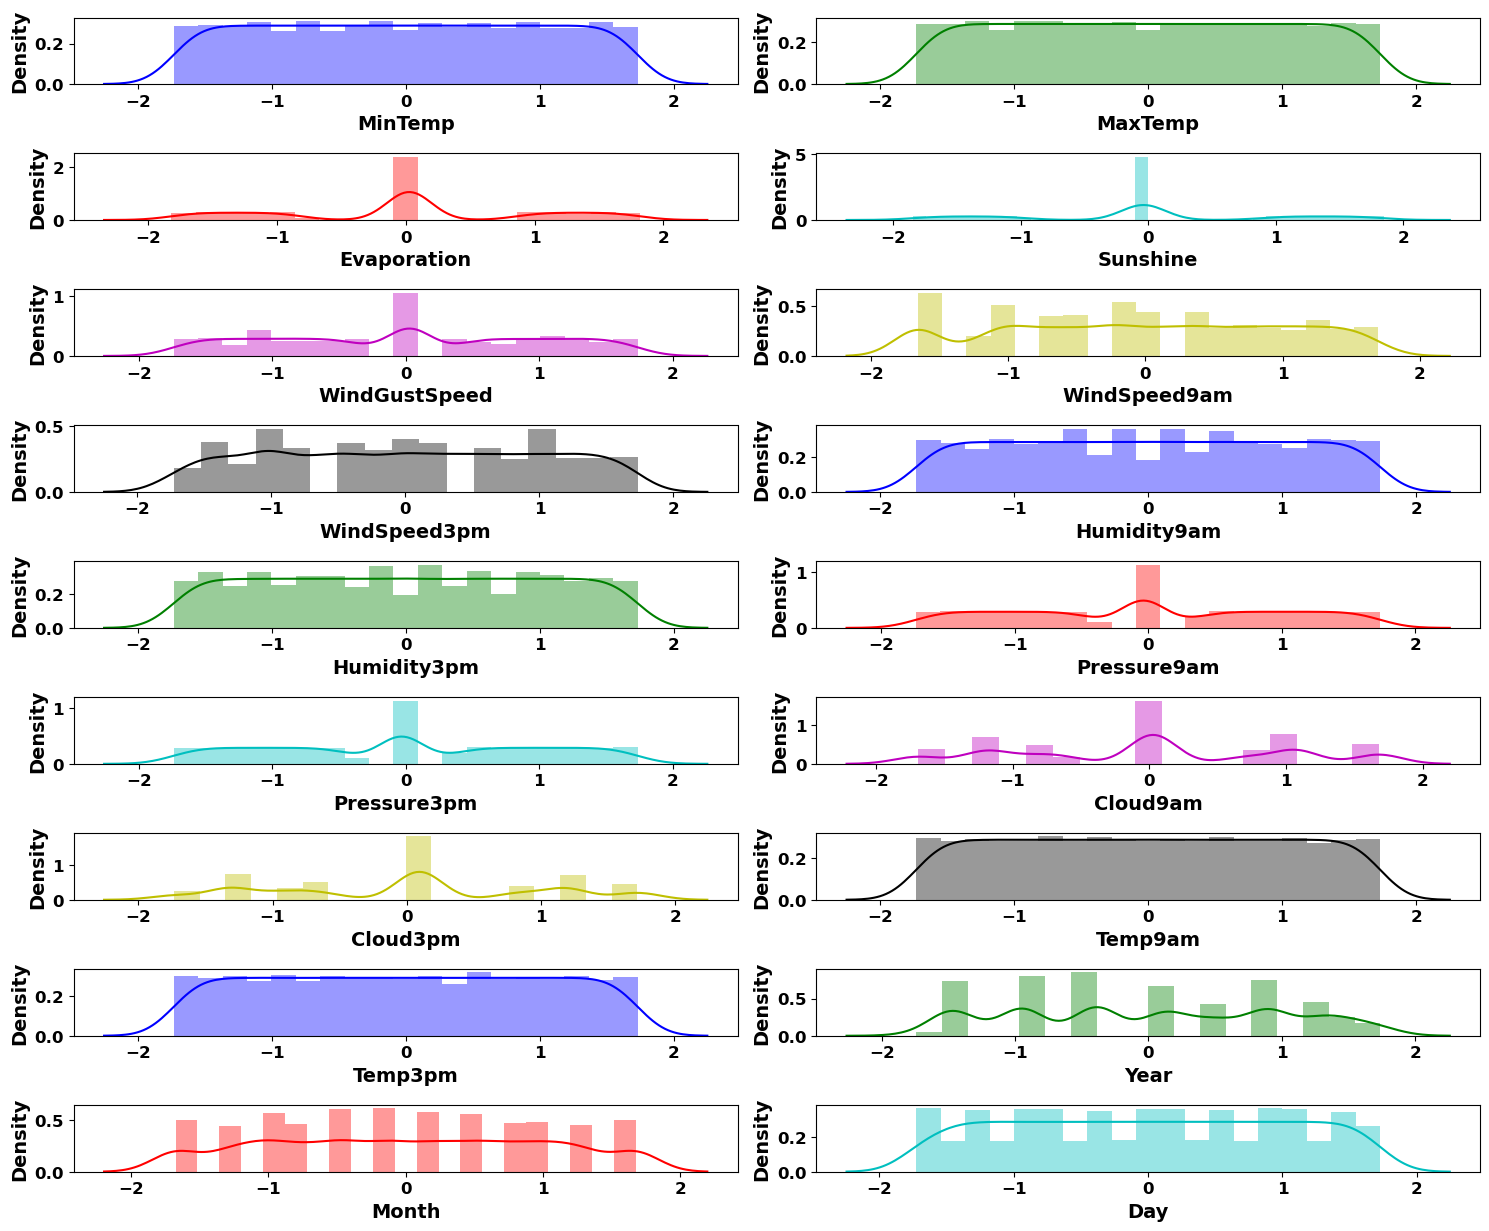

In [124]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=30:
        plt.subplot(15,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [125]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

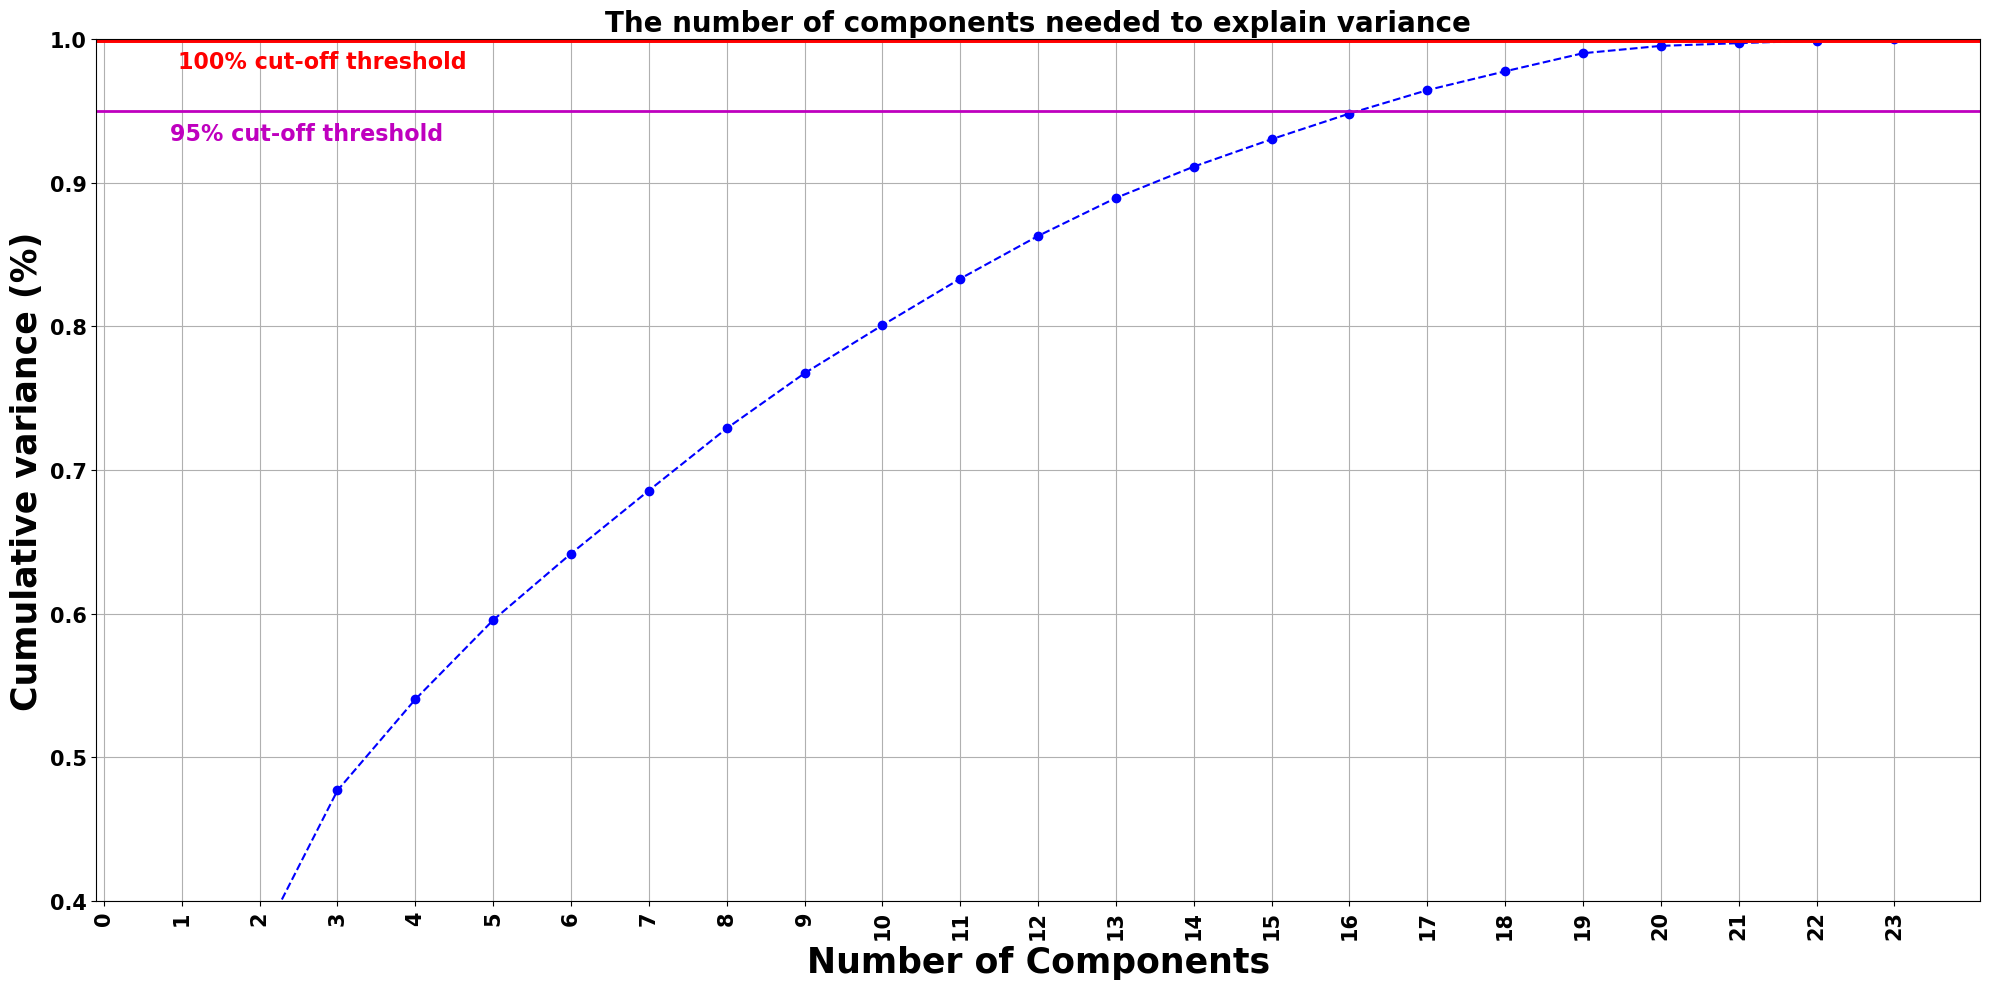

In [126]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 4 principal components attribute for 95% of variation in the data. Hence I will pick 16 components for our prediction**
- **I will use 16 features as no. of components in PCA to reduce the dimensions**

In [127]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=16)
x_reg=pca.fit_transform(x)
x_reg=pd.DataFrame(x_reg)
x_reg.head()

0         1         2         3         4         5         6   \
0  3.450195 -0.011595 -0.897775 -0.670497  0.695142  0.440511  0.959714   
1 -0.350120  2.917187  2.203365  0.031051 -1.281421  0.861477  0.158294   
2  2.687168  0.957696 -1.310250 -0.862480  0.326656  0.527872  1.003552   
3 -3.482032  1.960221  2.584777 -0.021248  0.558229 -1.036116  0.676924   
4 -2.140429  0.878376 -3.293028  0.214772  2.069011  1.055119  0.171134   

         7         8         9         10        11        12        13  \
0  1.307690 -0.791377  0.821108 -1.175093 -0.401936  0.477174 -0.539048   
1 -0.647999  1.569699 -0.466455 -0.181408  0.245355 -2.117673  0.520786   
2 -0.350354  0.850595  0.167552 -0.642089 -1.096118  1.316537  0.940935   
3  0.592237  0.889668 -0.838633 -0.054429  1.063957 -0.502237 -0.057447   
4  0.561060  0.440350 -1.347400  0.903390 -1.302529 -0.540027 -0.443174   

         14        15  
0  0.558883  1.182522  
1  0.340686 -0.166714  
2  0.157325 -0.149119  
3  0.140011 -0.374966  
4  0.326828  0.424302

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 16 dimensions. This X data can be used for model training**

## Checking Multicollinearity again after PCA transformation

In [128]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_reg[list(x_reg.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
3   1.0       3
5   1.0       5
0   1.0       0
1   1.0       1
2   1.0       2
4   1.0       4
6   1.0       6
7   1.0       7
8   1.0       8
10  1.0      10
11  1.0      11
12  1.0      12
13  1.0      13
14  1.0      14
15  1.0      15
9   1.0       9

#### Observations:
- **No multicollinearity is noticed after PCA transformation as VIF < 5 for all features**

In [129]:
y_reg.shape

(6378,)

In [130]:
x_reg.shape

(6378, 16)

# CLASSIFICATION TASK EDA (To Be Continued)

In [131]:
# Checking Multicollinearity between features using variance_inflation_factor (VIF)
# We calculate VIF only for X numerical data as the variance is applicable only for numerical data

In [132]:
# Identifying the X columns with numerical data 

In [133]:
df_clas.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
1     18.1     20.6       1.8          3.4       0.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
1           30.0           5           4           4.0          13.0   
2           44.0          11           8          20.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
1         93.0         92.0       1016.5       1014.1       8.0       8.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
1     19.1     19.1          1  2012.0    5.0   4.0             1  
2     15.4     20.2          1  2011.0   12.0  12.0             1

In [134]:
df_clas_numerical=df_clas.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow','Rainfall'],axis=1)
df_clas_numerical.head(3)

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     18.1     31.0          5.8      13.0           46.0           2.0   
1     18.1     20.6          3.4       0.0           30.0           4.0   
2     12.7     20.9          5.8       7.0           44.0          20.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          17.0         52.0         63.0       1014.2       1012.3       2.0   
1          13.0         93.0         92.0       1016.5       1014.1       8.0   
2          20.0         52.0         40.0       1010.2       1009.7       7.0   

   Cloud3pm  Temp9am  Temp3pm    Year  Month   Day  
0       3.0     27.4     28.2  2010.0    1.0  22.0  
1       8.0     19.1     19.1  2012.0    5.0   4.0  
2       7.0     15.4     20.2  2011.0   12.0  12.0

In [135]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_clas_numerical[list(df_clas_numerical.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF         Column
10  512886.076528    Pressure3pm
9   509139.368959    Pressure9am
15   42530.333960           Year
14     509.536165        Temp3pm
1      437.390548        MaxTemp
13     191.712366        Temp9am
7       62.855424    Humidity9am
0       57.403198        MinTemp
8       46.472245    Humidity3pm
4       21.133164  WindGustSpeed
3       16.961411       Sunshine
12       8.761608       Cloud3pm
11       8.333414       Cloud9am
6        8.267804   WindSpeed3pm
5        5.494046   WindSpeed9am
16       5.281179          Month
17       4.214881            Day
2        3.996032    Evaporation

#### Observations: 
- **Typically we remove columns with VIF values > 10 which indicates strong multicollinearity of the features***
- **Multicollinearity can be addressed with either removing columns with VIF > 10 or using PCA**
- **As there are multiple features with VIF values > 10, I will use PCA to reduce the no. of features**

## Checking Outliers

In [136]:
# We check outliers on X numerical data
df_outliers=df_clas_numerical.copy()
df_outliers.head(5)

MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0     18.1     31.0          5.8      13.0           46.0           2.0   
1     18.1     20.6          3.4       0.0           30.0           4.0   
2     12.7     20.9          5.8       7.0           44.0          20.0   
3     20.8     31.3          5.0      10.1           31.0           9.0   
4      5.4     16.9          3.4       7.1           52.0          19.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          17.0         52.0         63.0       1014.2       1012.3       2.0   
1          13.0         93.0         92.0       1016.5       1014.1       8.0   
2          20.0         52.0         40.0       1010.2       1009.7       7.0   
3          20.0         76.0         59.0       1012.9       1009.1       6.0   
4          19.0         63.0         77.0       1018.7       1017.4       6.0   

   Cloud3pm  Temp9am  Temp3pm    Year  Month   Day  
0       3.0     27.4     28.2  2010.0    1.0  22.0  
1       8.0     19.1     19.1  2012.0    5.0   4.0  
2       7.0     15.4     20.2  2011.0   12.0  12.0  
3       4.0     24.5     29.9  2012.0    7.0  10.0  
4       5.0     14.0     13.6  2013.0    8.0  16.0

In [137]:
df_outliers.shape

(6762, 18)

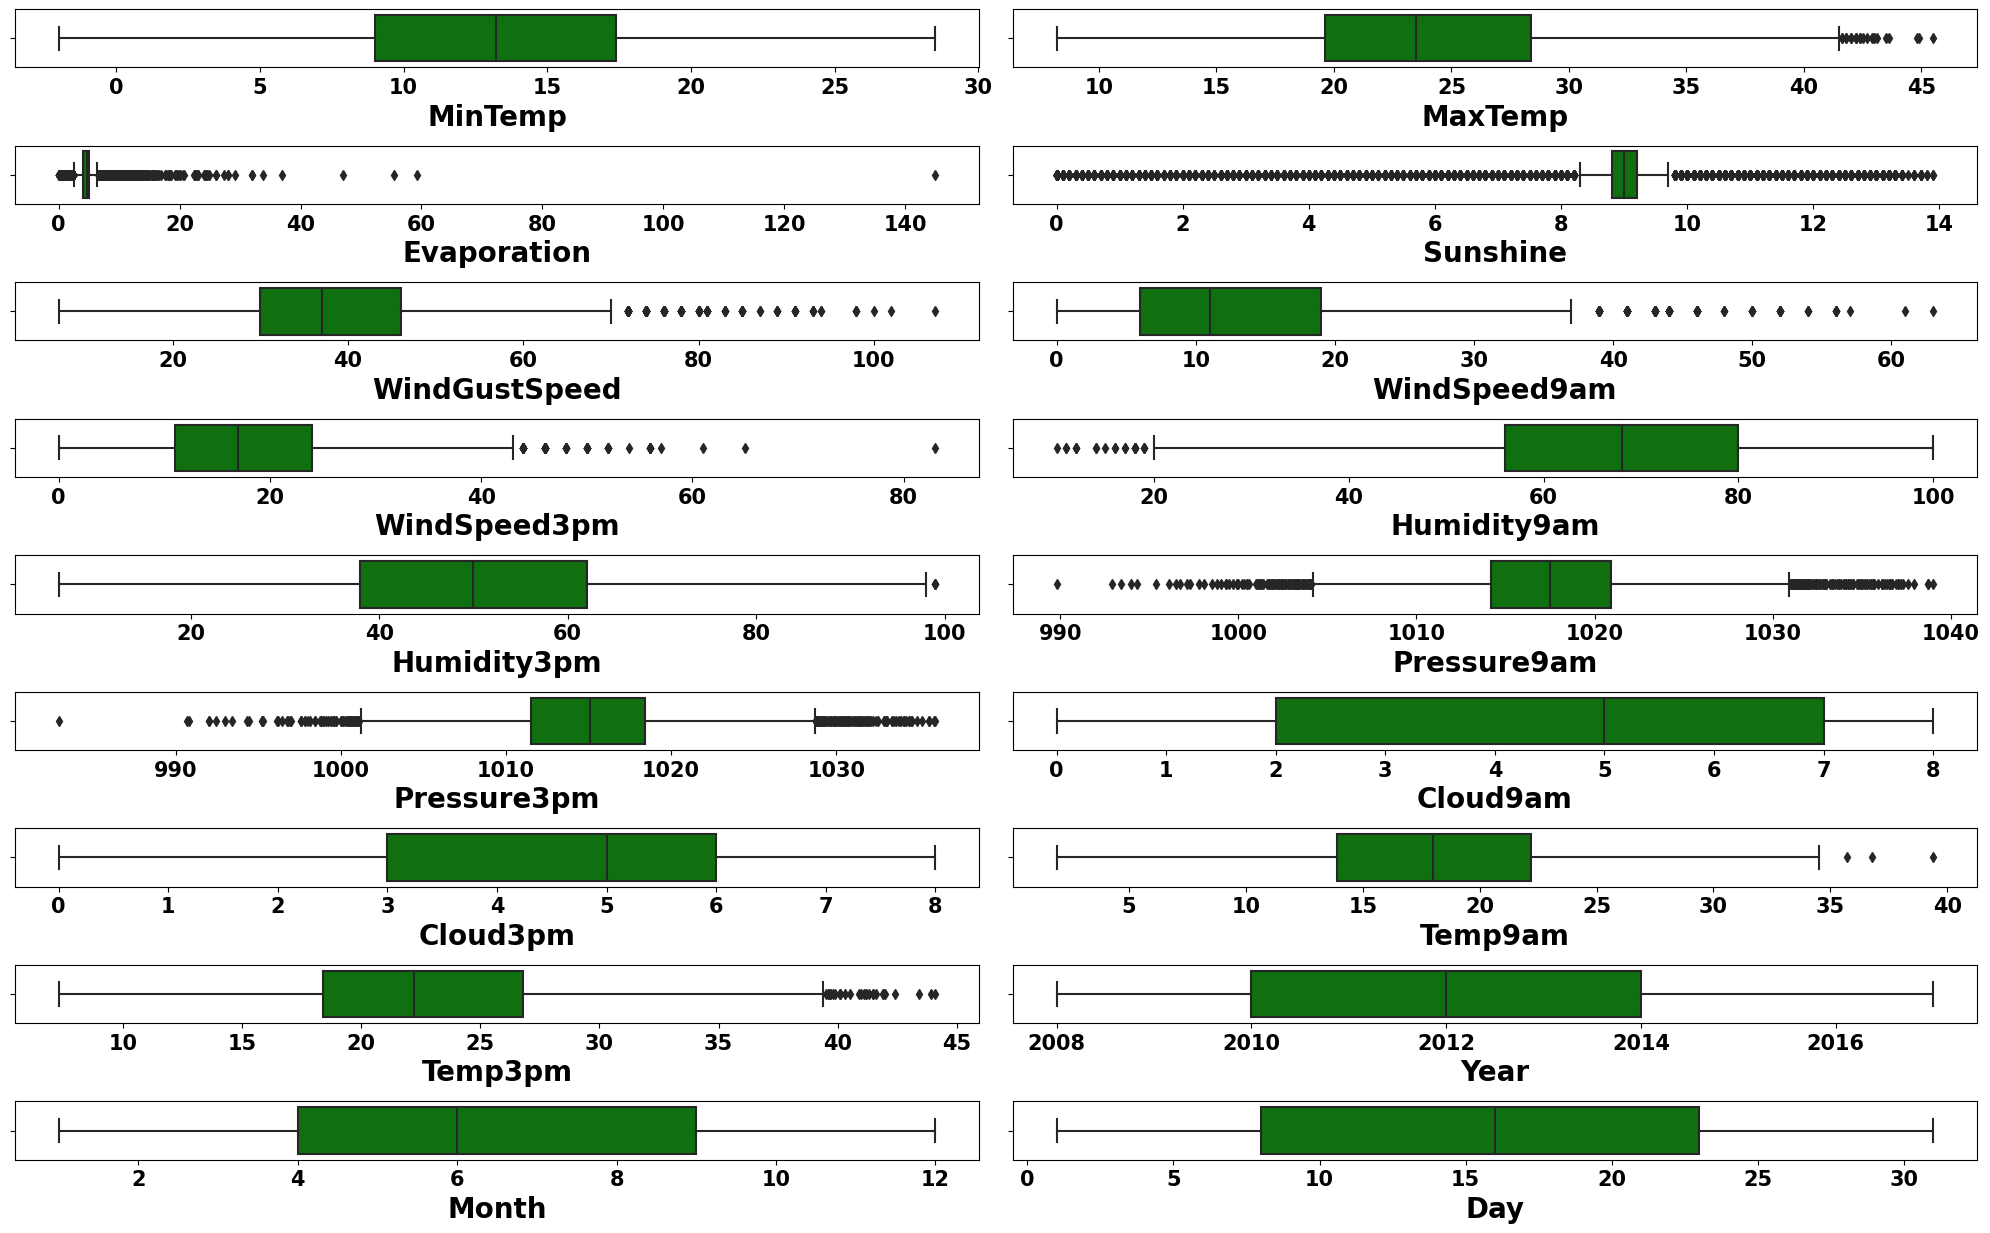

In [138]:
# Checking outliers visually before removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers.columns:
    if plotnumber<=30:
        ax=plt.subplot(15,2,plotnumber)
        sns.boxplot(df_clas[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations:
- **Outliers are present in all the columns**

## Removing Outliers using z-score method

In [139]:
df_outliers.shape

(6762, 18)

In [140]:
df_clas.shape

(6762, 24)

In [141]:
# Calculating z score & identifying the rows and columns where absolute z score > 3

from scipy.stats import zscore
z=np.abs(zscore(df_outliers))
threshold=3
np.where(z>3)

(array([   1,    9,   24,   24,   34,   34,   40,   52,   52,   74,   80,
          82,  115,  115,  122,  127,  132,  146,  158,  169,  196,  197,
         206,  212,  216,  236,  245,  252,  252,  252,  254,  255,  255,
         270,  271,  271,  308,  336,  337,  351,  364,  392,  393,  414,
         427,  477,  491,  549,  573,  580,  582,  598,  611,  663,  693,
         700,  700,  702,  717,  732,  742,  742,  745,  754,  765,  772,
         808,  812,  820,  826,  826,  826,  839,  861,  861,  879,  904,
         929,  934,  934,  962,  991, 1003, 1024, 1024, 1024, 1030, 1030,
        1030, 1036, 1047, 1047, 1049, 1063, 1073, 1073, 1105, 1114, 1118,
        1135, 1139, 1155, 1167, 1180, 1180, 1182, 1182, 1211, 1260, 1268,
        1350, 1365, 1365, 1385, 1439, 1439, 1495, 1514, 1517, 1518, 1518,
        1518, 1604, 1604, 1618, 1658, 1663, 1670, 1682, 1753, 1773, 1773,
        1779, 1781, 1792, 1792, 1809, 1809, 1829, 1834, 1846, 1847, 1895,
        1917, 1950, 1951, 1965, 2001, 

In [142]:
# Removing the rows in the dataframe where the outliers are present in x features with numerical data
df_clas_1=df_clas[(z<3).all(axis=1)]
df_outliers_del=df_outliers[(z<3).all(axis=1)]

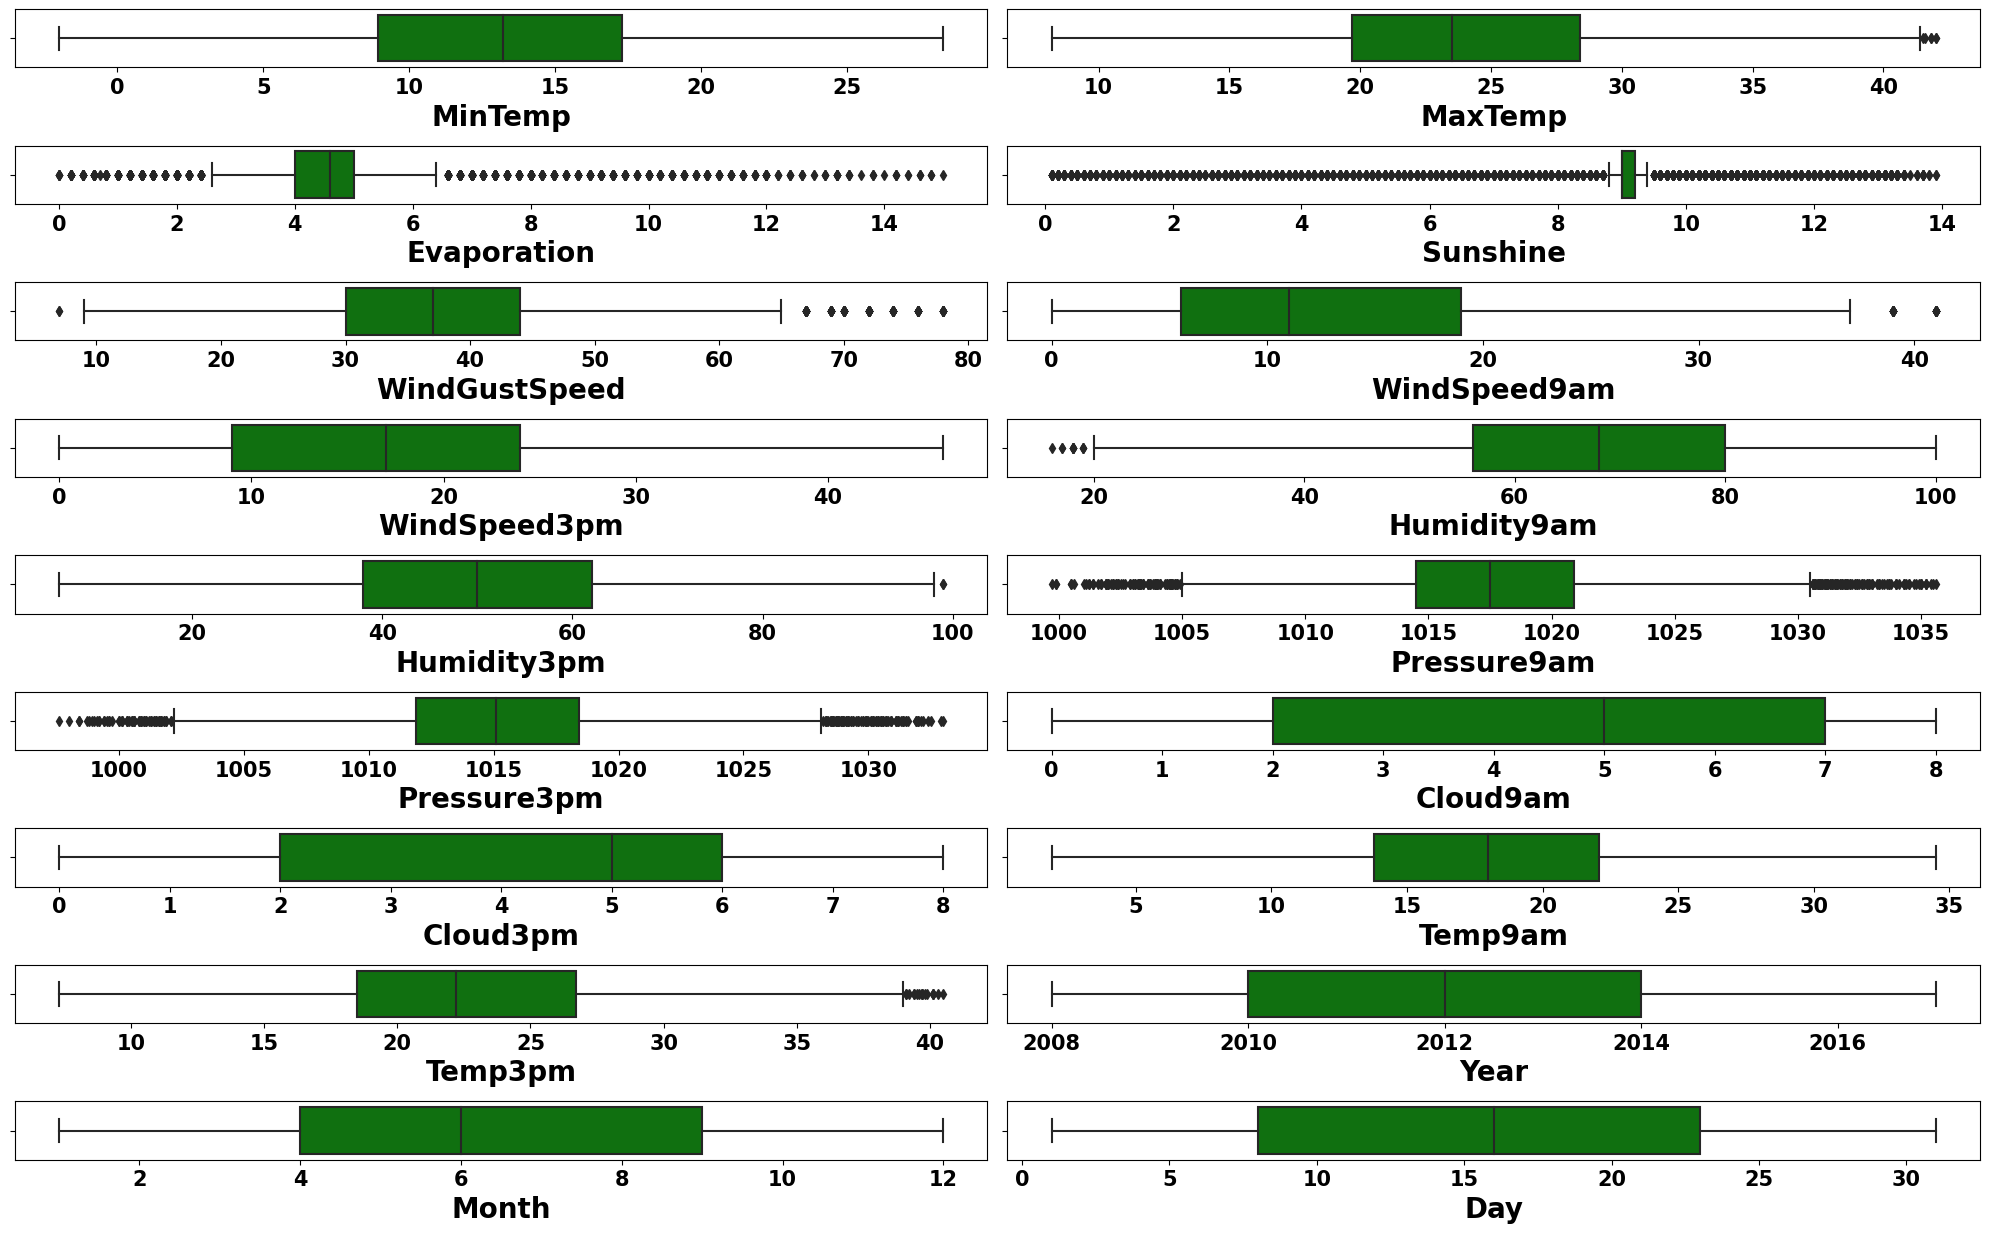

In [143]:
# Checking outliers visually after removing outliers
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_del.columns:
    if plotnumber<=30:
        ax=plt.subplot(15,2,plotnumber)
        sns.boxplot(df_clas_1[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from the features per z-score threshold**

In [144]:
df_clas_1.shape

(6378, 24)

In [145]:
df_clas.shape

(6762, 24)

In [146]:
# Data loss calculation with z-score method
loss_percent_zscore=round((df_clas.shape[0]-df_clas_1.shape[0])/df_clas.shape[0]*100,1)
loss_percent_zscore

5.7

#### Observations:
- **Data loss with z-score method is 5.7%. Now I will check the dataloss using IQR method as well and will take a call accordingly**

## Removing Outliers using IQR method

In [147]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_outliers.quantile(0.25)
Q3=df_outliers.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_outliers_upd = df_outliers[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_clas_2 = df_clas[((df_outliers>=(Q1-1.5*IQR)) & (df_outliers<=(Q3+1.5*IQR))).all(axis=1)]

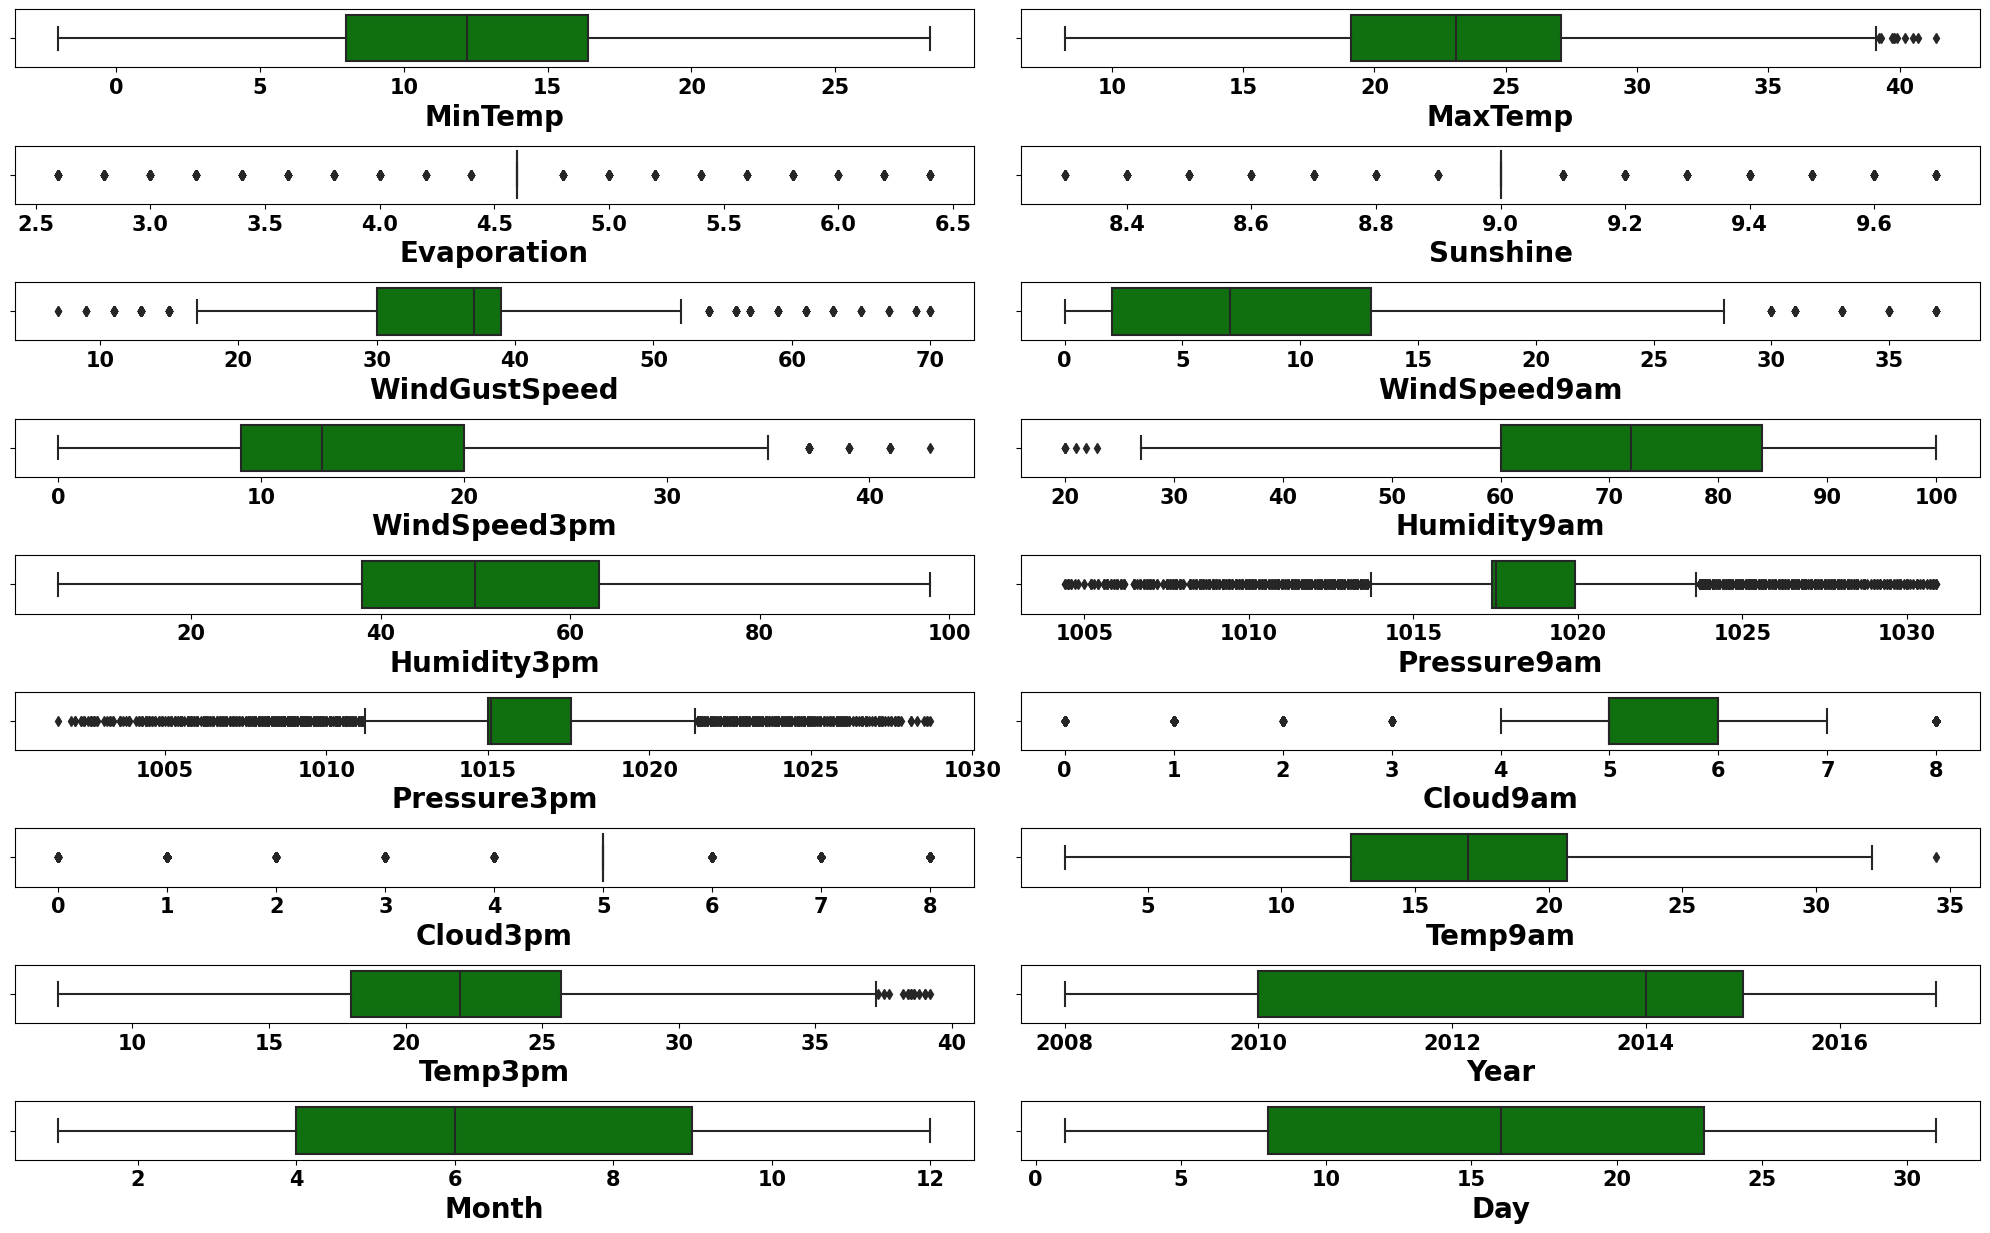

In [148]:
# Checking outliers visually after removing outliers using IQR method
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for column in df_outliers_upd.columns:
    if plotnumber<=30:
        ax=plt.subplot(15,2,plotnumber)
        sns.boxplot(df_clas_2[column],color='g')
        plt.xlabel(column,fontsize=20,fontweight='bold')
        plt.xticks(fontsize=15,fontweight ='bold',rotation=0)
        plt.tight_layout()
    plotnumber+=1
plt.show()

#### Observations
- **Outliers are removed from all features based on IQR range**

In [149]:
df_clas_2.shape

(3078, 24)

In [150]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((df_clas.shape[0]-df_clas_2.shape[0])/df_clas.shape[0]*100,1)
display(loss_percent_IQR)

54.5

#### Observations: 
- **Data loss with IQR is 54.5% which is higher than data loss with z-score (5.7%). Data loss with z-score method is < 10% which is acceptable hence considering x & y data after removing outliers using zscore method for model building**

In [151]:
df_clas_1.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   
3     20.8     31.3       0.0          5.0      10.1            6   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
2           44.0          11           8          20.0          20.0   
3           31.0          11           3           9.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   
3         76.0         59.0       1012.9       1009.1       6.0       4.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  RainTomorrow  
0     27.4     28.2          0  2010.0    1.0  22.0             0  
2     15.4     20.2          1  2011.0   12.0  12.0             1  
3     24.5     29.9          0  2012.0    7.0  10.0             0

In [152]:
x_clas=df_clas_1.drop(['RainTomorrow'],axis=1)
y_clas=df_clas_1['RainTomorrow'].copy()
df_clas=df_clas_1

In [153]:
x_clas.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0     18.1     31.0       0.0          5.8      13.0            4   
2     12.7     20.9      34.6          5.8       7.0           11   
3     20.8     31.3       0.0          5.0      10.1            6   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           46.0          10           4           2.0          17.0   
2           44.0          11           8          20.0          20.0   
3           31.0          11           3           9.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         52.0         63.0       1014.2       1012.3       2.0       3.0   
2         52.0         40.0       1010.2       1009.7       7.0       7.0   
3         76.0         59.0       1012.9       1009.1       6.0       4.0   

   Temp9am  Temp3pm  RainToday    Year  Month   Day  
0     27.4     28.2          0  2010.0    1.0  22.0  
2     15.4     20.2          1  2011.0   12.0  12.0  
3     24.5     29.9          0  2012.0    7.0  10.0

In [154]:
y_clas.head(3)

0    0
2    1
3    0
Name: RainTomorrow, dtype: int32

## Skewness Check

In [155]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with numerical data 
# Segregating numerical X features to check skewness
df_num=x_clas.drop(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],axis=1)

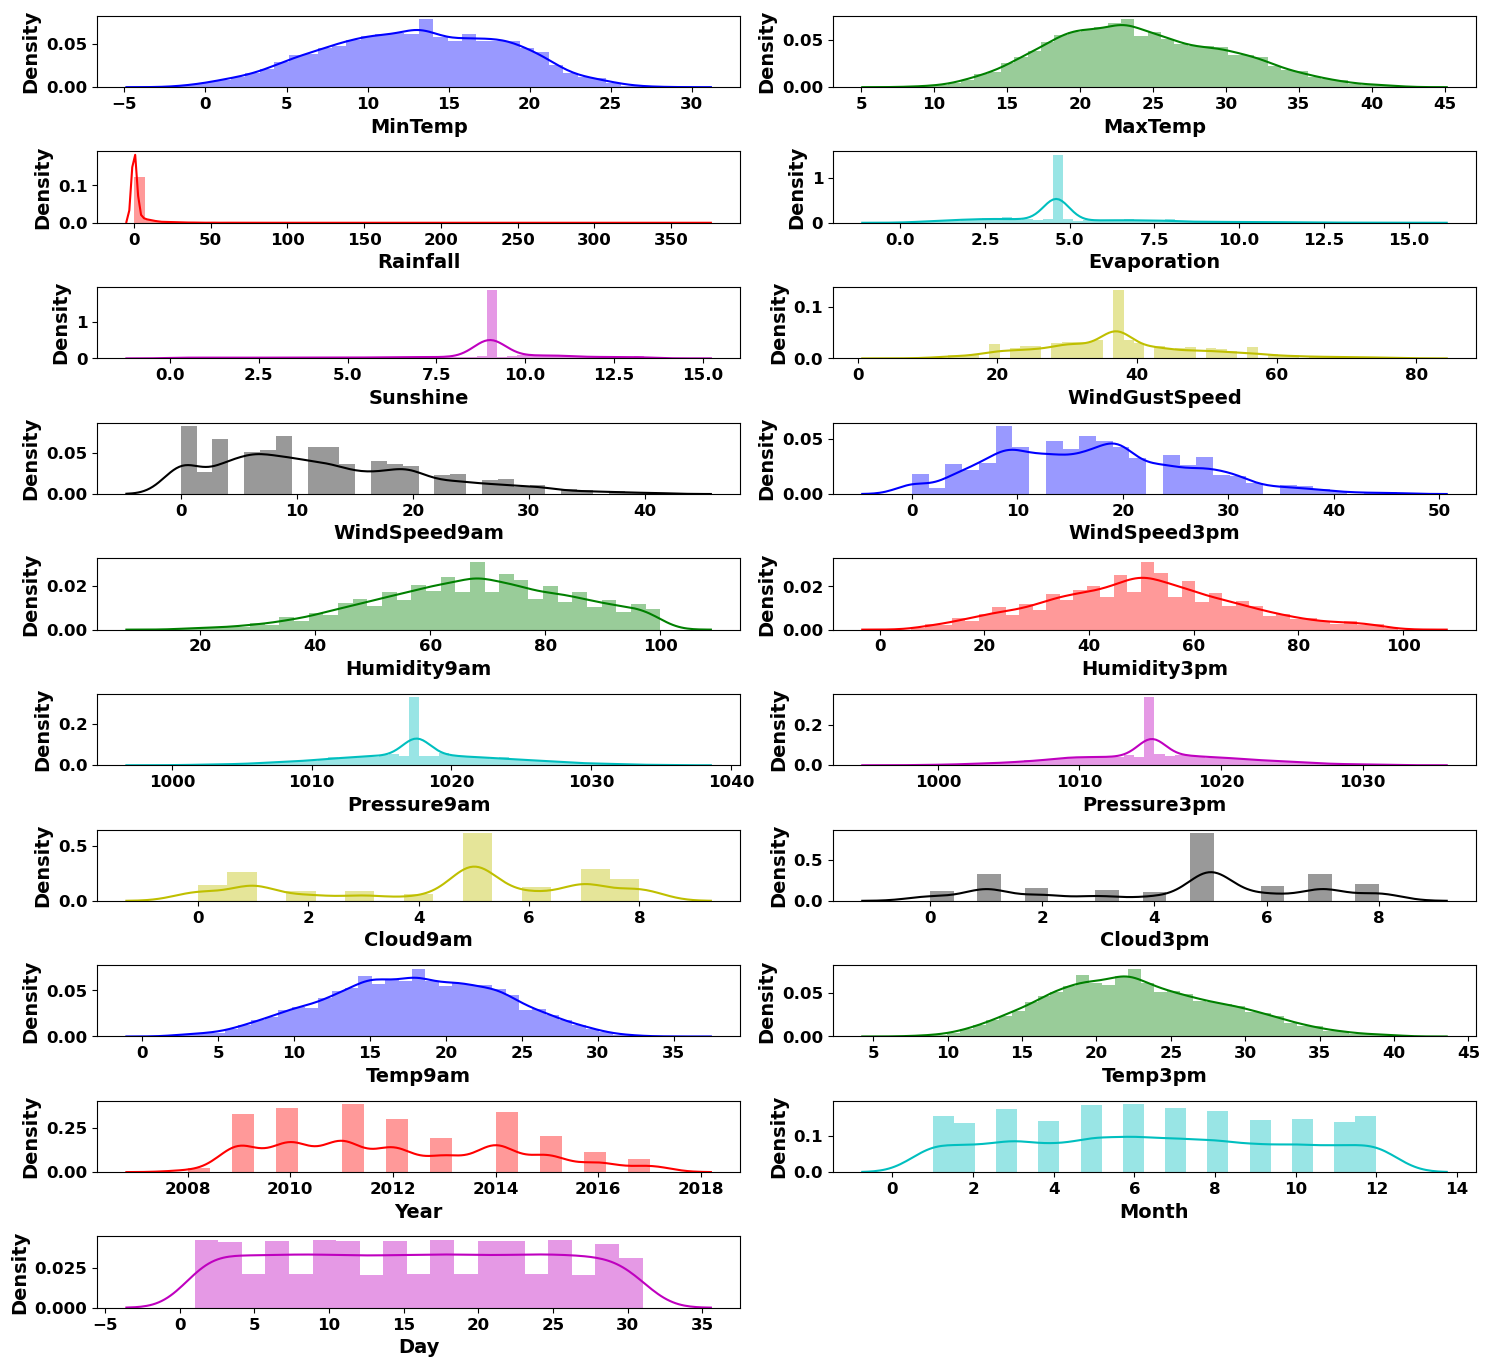

In [156]:
# Skewness of features with numerical data. We don't check skewness on categorical data and in target variable.
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in df_num.columns:
    if plotnum<=30:
        plt.subplot(15,2,plotnum)
        sns.distplot(df_num[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observatins:
- **All the features are having skewed data hence I need to reduce the skewness of all these features to get better model performance**

In [157]:
df_num.skew().sort_values(ascending=False) 

Rainfall         15.761770
Evaporation       1.139107
WindSpeed9am      0.679763
WindGustSpeed     0.545444
WindSpeed3pm      0.344701
Year              0.339277
Temp3pm           0.292643
MaxTemp           0.269105
Humidity3pm       0.136990
Pressure3pm       0.088894
Pressure9am       0.079132
Month             0.035407
Day               0.006358
Temp9am          -0.075509
MinTemp          -0.081476
Humidity9am      -0.230358
Cloud3pm         -0.377900
Cloud9am         -0.407790
Sunshine         -1.354937
dtype: float64

#### Observations: 
- **Typically "-0.5 to 0.5" range is fairly symmetrical. In this case, there are multiple variables beyond this range**
- **I will apply various transformation techniques to reduce the skewness and will consider the one with lowest skewness**

### Transforming data to remove skewness

In [158]:
# Method 1: Using PowerTransformer
#checking skewness on X features with continuous data 
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_pwr=pt.fit_transform(df_num)
x_tra=pd.DataFrame(data=x_pwr,columns=df_num.columns)
# Checking skeweness and arranging the values in descending order
x_tra.skew().sort_values(ascending=False)

Rainfall         1.068862
Evaporation      0.060525
WindGustSpeed    0.009085
Year             0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp3pm         -0.014551
MaxTemp         -0.016407
Humidity3pm     -0.037838
Temp9am         -0.062736
Humidity9am     -0.068637
WindSpeed3pm    -0.077677
Sunshine        -0.110054
MinTemp         -0.113833
WindSpeed9am    -0.132054
Month           -0.150412
Day             -0.211434
Cloud3pm        -0.281386
Cloud9am        -0.332914
dtype: float64

### Observations:
- **Skewness is reduced using powerTransformer method**
- **Skewness range: (-1.1,+1.1) which is outside the range of -0.5 to 0.5**

In [159]:
# Method2: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_qt=qt.fit_transform(df_num)
x_qtr=pd.DataFrame(data=x_qt,columns=df_num.columns)
x_qtr.skew().sort_values(ascending=False)

Rainfall         0.774295
Cloud9am         0.027042
Cloud3pm         0.026137
Year             0.025085
Sunshine         0.015767
Month            0.001084
Pressure3pm      0.000656
WindGustSpeed    0.000359
Pressure9am      0.000288
MaxTemp          0.000149
Humidity9am     -0.000023
Temp3pm         -0.000114
Temp9am         -0.000206
MinTemp         -0.000267
Humidity3pm     -0.000419
WindSpeed3pm    -0.004936
Day             -0.007189
Evaporation     -0.008714
WindSpeed9am    -0.088735
dtype: float64

#### Observations:
- **Skewness is reduced using QuantileTransformer method**
- **Skewness range: (-0.77,+0.77) which is outside the range of -0.5 to 0.5 and but is better than Power Transformer Method**

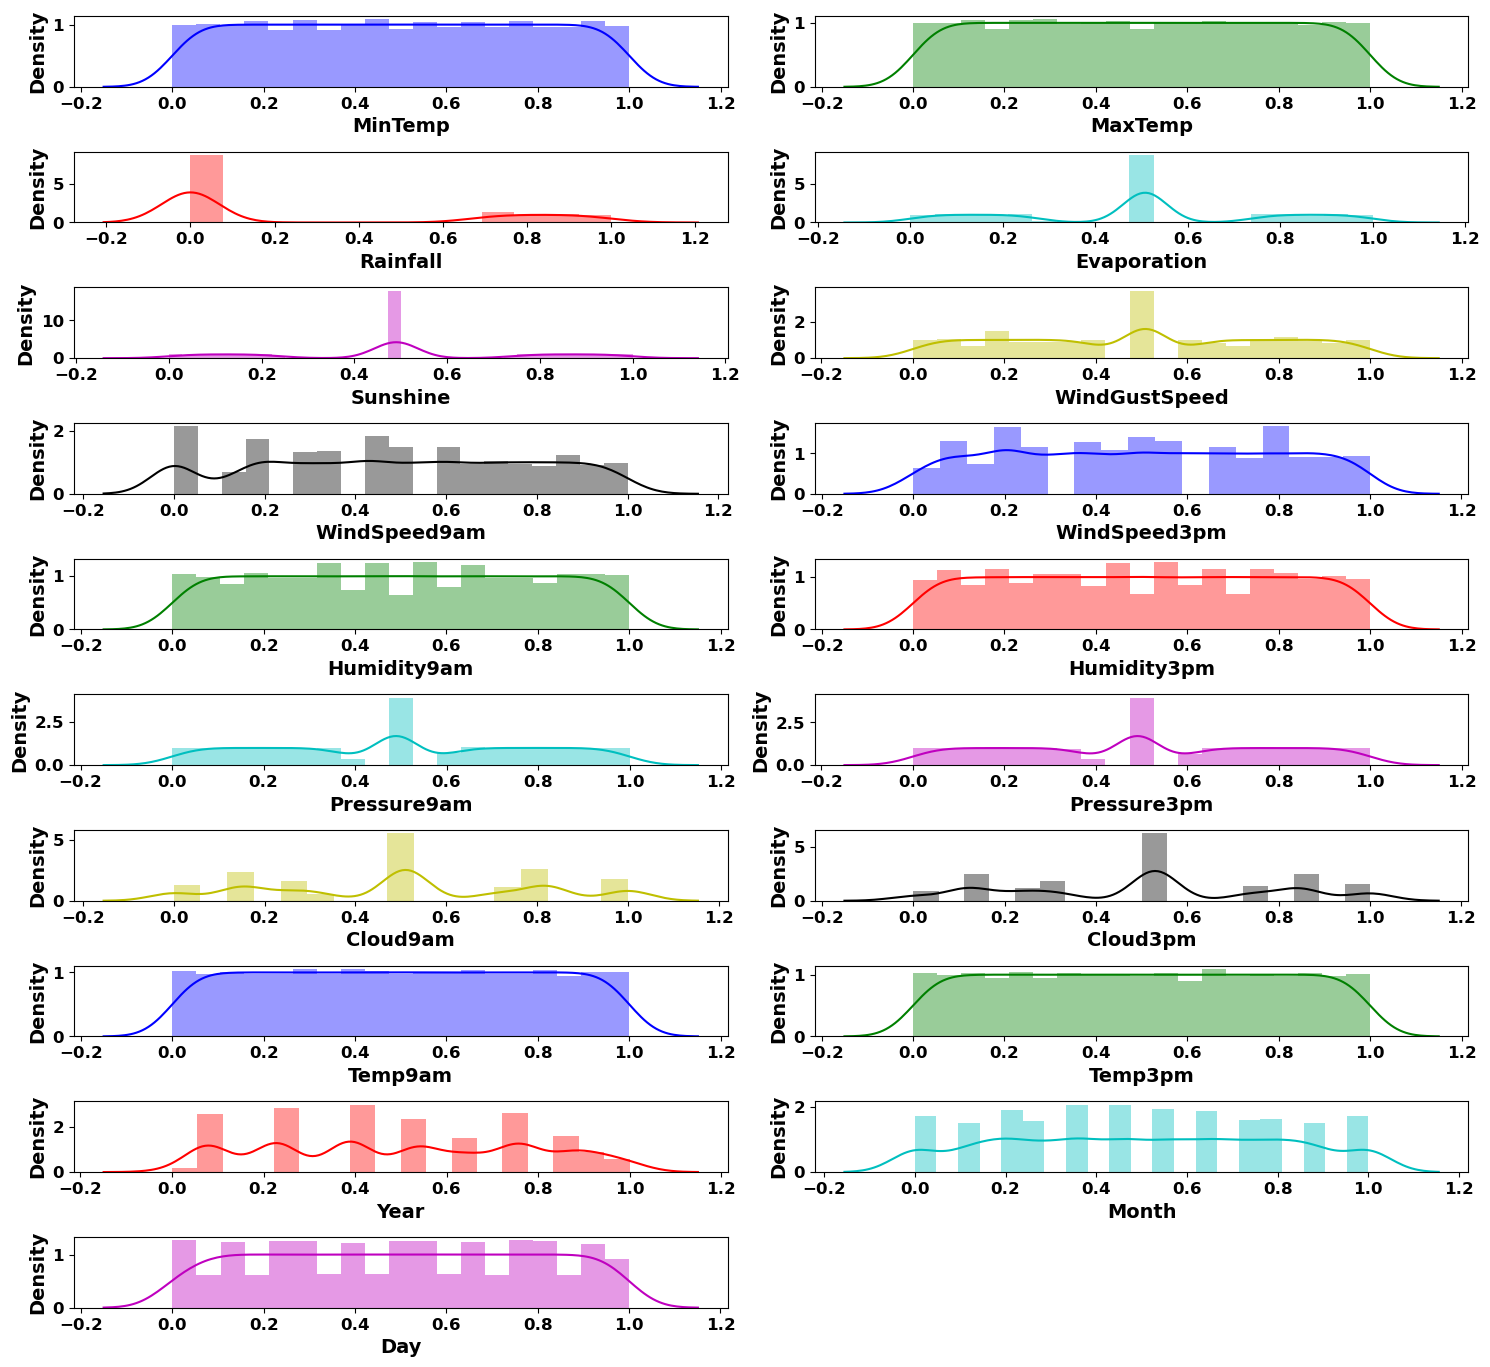

In [160]:
# Checking skewness of the data after transformation
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('Dark2')
plotnum=1
for col in x_qtr:
    if plotnum<=30:
        plt.subplot(15,2,plotnum)
        sns.distplot(x_qtr[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

#### Observations:
- **As the skewness is least using "Quantile transformer" for most of the features, I am using transformed x data from "Quantile transformer" for model building**   

### Grouping both transformed numerical and categorical data 

In [161]:
x_clas.shape

(6378, 23)

In [162]:
x_clas.tail(5) # x data including both numerical and categorical features

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
6757     14.2     31.3       0.0          7.8      13.1           12   
6758      2.8     16.0       0.0          0.0       7.8            9   
6759     13.0     20.6       0.0          3.0       1.1            5   
6760     17.0     29.8       1.0          4.6       9.0            5   
6761     19.4     27.8       5.8          3.0       3.0            2   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
6757           41.0           0          12          22.0          28.0   
6758           35.0           3           8           0.0          24.0   
6759           43.0           5           4          28.0          13.0   
6760           31.0           5           5           6.0          17.0   
6761           52.0          12           2          11.0          15.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
6757         44.0         35.0       1012.7       1008.9       0.0       1.0   
6758         75.0         52.0       1027.8       1025.7       0.0       3.0   
6759         41.0         45.0       1023.8       1020.3       7.0       8.0   
6760         86.0         48.0       1017.5       1015.1       5.0       5.0   
6761         76.0         63.0       1013.6       1012.9       7.0       7.0   

      Temp9am  Temp3pm  RainToday    Year  Month   Day  
6757     23.8     29.5          0  2011.0   12.0  20.0  
6758      9.0     15.2          0  2012.0    7.0  12.0  
6759     17.1     19.7          0  2014.0    6.0   7.0  
6760     18.5     28.2          0  2015.0    3.0  23.0  
6761     24.1     26.9          1  2010.0    2.0   1.0

In [163]:
new_x=x_clas.reset_index(drop=True)  # reset the index of x data

In [164]:
new_x.tail(5) # x data including both numerical and categorical features after resetting the index

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
6373     14.2     31.3       0.0          7.8      13.1           12   
6374      2.8     16.0       0.0          0.0       7.8            9   
6375     13.0     20.6       0.0          3.0       1.1            5   
6376     17.0     29.8       1.0          4.6       9.0            5   
6377     19.4     27.8       5.8          3.0       3.0            2   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
6373           41.0           0          12          22.0          28.0   
6374           35.0           3           8           0.0          24.0   
6375           43.0           5           4          28.0          13.0   
6376           31.0           5           5           6.0          17.0   
6377           52.0          12           2          11.0          15.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
6373         44.0         35.0       1012.7       1008.9       0.0       1.0   
6374         75.0         52.0       1027.8       1025.7       0.0       3.0   
6375         41.0         45.0       1023.8       1020.3       7.0       8.0   
6376         86.0         48.0       1017.5       1015.1       5.0       5.0   
6377         76.0         63.0       1013.6       1012.9       7.0       7.0   

      Temp9am  Temp3pm  RainToday    Year  Month   Day  
6373     23.8     29.5          0  2011.0   12.0  20.0  
6374      9.0     15.2          0  2012.0    7.0  12.0  
6375     17.1     19.7          0  2014.0    6.0   7.0  
6376     18.5     28.2          0  2015.0    3.0  23.0  
6377     24.1     26.9          1  2010.0    2.0   1.0

In [165]:
x_qtr.head(5)  # Transformed numerical data

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.794294  0.853854  0.000000     0.797297  0.977477       0.778779   
1  0.471972  0.328829  0.988789     0.797297  0.164164       0.749750   
2  0.924424  0.866366  0.000000     0.755255  0.814314       0.288789   
3  0.092092  0.110611  0.959459     0.199199  0.167668       0.868368   
4  0.733233  0.558058  0.931932     0.096096  0.098599       0.017518   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.130631      0.504505     0.187187     0.769770     0.236236   
1      0.812312      0.656156     0.187187     0.290791     0.094094   
2      0.430931      0.656156     0.677678     0.702703     0.182182   
3      0.764264      0.584084     0.386386     0.923423     0.646146   
4      0.194194      0.136136     0.884384     0.783784     0.826326   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm      Year     Month  \
0     0.267267  0.242242  0.282783  0.958458  0.811311  0.228228  0.000000   
1     0.163163  0.819820  0.845846  0.345345  0.359860  0.388889  1.000000   
2     0.139139  0.709209  0.332833  0.875375  0.871872  0.536537  0.559059   
3     0.700701  0.709209  0.529530  0.259259  0.046046  0.642643  0.649650   
4     0.726226  0.819820  0.845846  0.554555  0.559560  0.388889  0.365365   

        Day  
0  0.707207  
1  0.378879  
2  0.313313  
3  0.509510  
4  0.707207

In [166]:
for i in x_qtr.columns:
    new_x[i]=x_qtr[i]

In [167]:
new_x.shape

(6378, 23)

In [168]:
new_x.isnull().sum().sum()  # checking for null values if any due to transformation and grouping

0

## Scaling data

In [169]:
# Applied standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_scaled=sc.fit_transform(new_x)
x=pd.DataFrame(data=x_scaled,columns=new_x.columns)
x.head(5)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  1.019279  1.225646 -0.698255     1.083109  1.764347    -0.493385   
1 -0.097134 -0.592742  1.794792     1.083109 -1.240559     0.841625   
2  1.470005  1.268983 -0.698255     0.929953  1.161517    -0.111954   
3 -1.412906 -1.348526  1.720843    -1.095713 -1.227614     1.604488   
4  0.807785  0.201178  1.651438    -1.471309 -1.482800    -1.256248   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0       0.969743    0.654132   -0.861664     -1.217626      0.017196   
1       0.868757    0.874340    0.031364      1.069039      0.542157   
2      -0.734820    0.874340   -1.084921     -0.210284      0.542157   
3       1.281404    1.755170    1.147648      0.907864      0.292671   
4      -1.678511    1.094547   -1.531435     -1.004405     -1.257956   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0    -1.083348     0.934272    -0.917875    -0.809875 -0.876831 -0.757936   
1    -1.083348    -0.724655    -1.412382    -1.172113  1.071679  1.185231   
2     0.615425     0.701987    -1.105927    -1.255706  0.698524 -0.585210   
3    -0.393438     1.466446     0.508185     0.698289  0.698524  0.093603   
4     1.331336     0.982809     1.135025     0.787106  1.071679  1.185231   

    Temp9am   Temp3pm  RainToday      Year     Month       Day  
0  1.587821  1.078186  -0.540984 -0.947770 -1.674833  0.716112  
1 -0.535699 -0.485422   1.848485 -0.388419  1.675079 -0.416906  
2  1.300062  1.287938  -0.540984  0.125626  0.197966 -0.643164  
3 -0.833858 -1.572319   1.848485  0.495042  0.501436  0.033883  
4  0.188898  0.206241   1.848485 -0.388419 -0.450891  0.716112

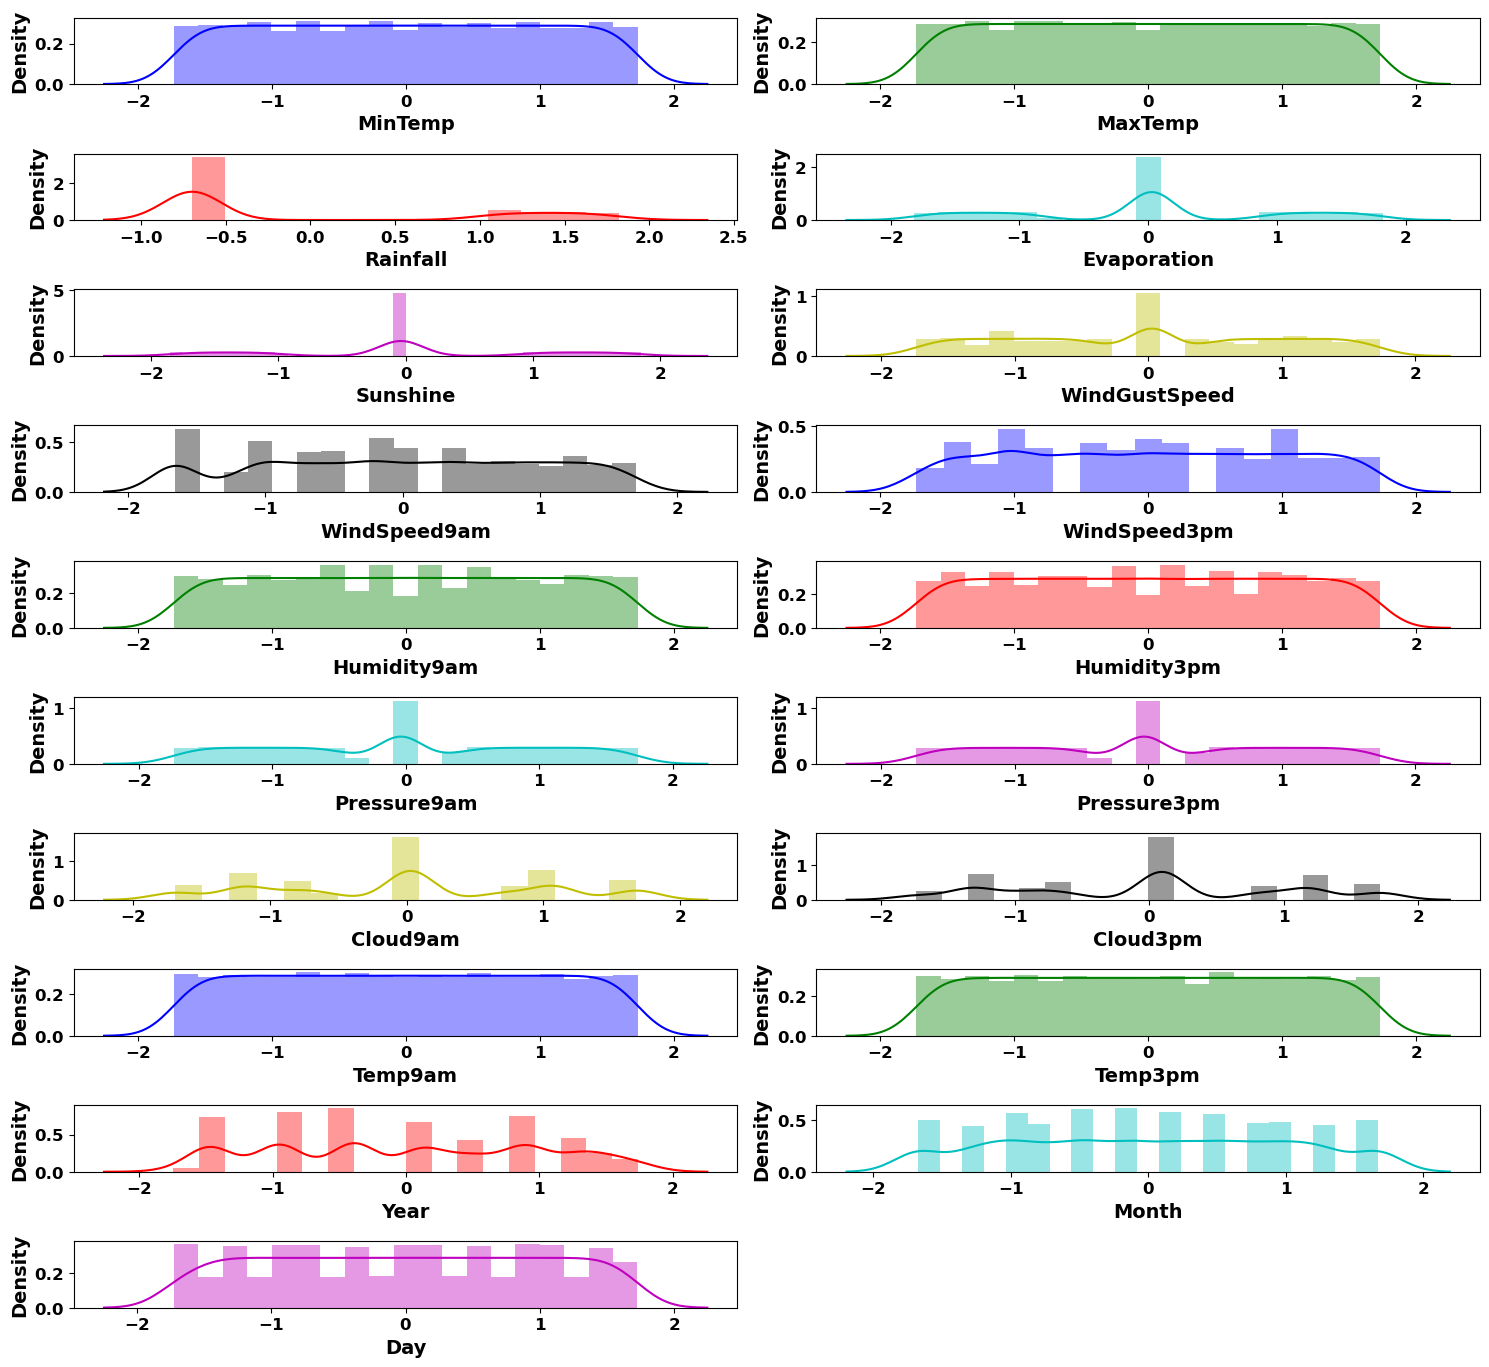

In [170]:
# Visually checking the distribution plots after scaling the data
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,20),facecolor='white')
sns.set_palette('rainbow_r')
plotnum=1
for col in x_qtr:
    if plotnum<=30:
        plt.subplot(15,2,plotnum)
        sns.distplot(x[col],color=colors[plotnum-1])
        plt.xlabel(col,fontsize=14,fontweight ='bold')
        plt.ylabel('Density', fontsize=14,fontweight='bold')
        plt.xticks(fontsize=12,fontweight ='bold')
        plt.yticks(fontsize=12,fontweight ='bold')
        plt.tight_layout()
    plotnum+=1
plt.show()

### Principal Component Analysis (PCA)

- **As the dataset has many X columns with multi-collinearity, I will use PCA technique to reduce the number of dimensions in a dataset while preserving the most important information in it**
- **Initially, I will calculate the number of components needed to explain the variance**
- **Based on that, I will choose no. of columns required be used in PCA**

In [171]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

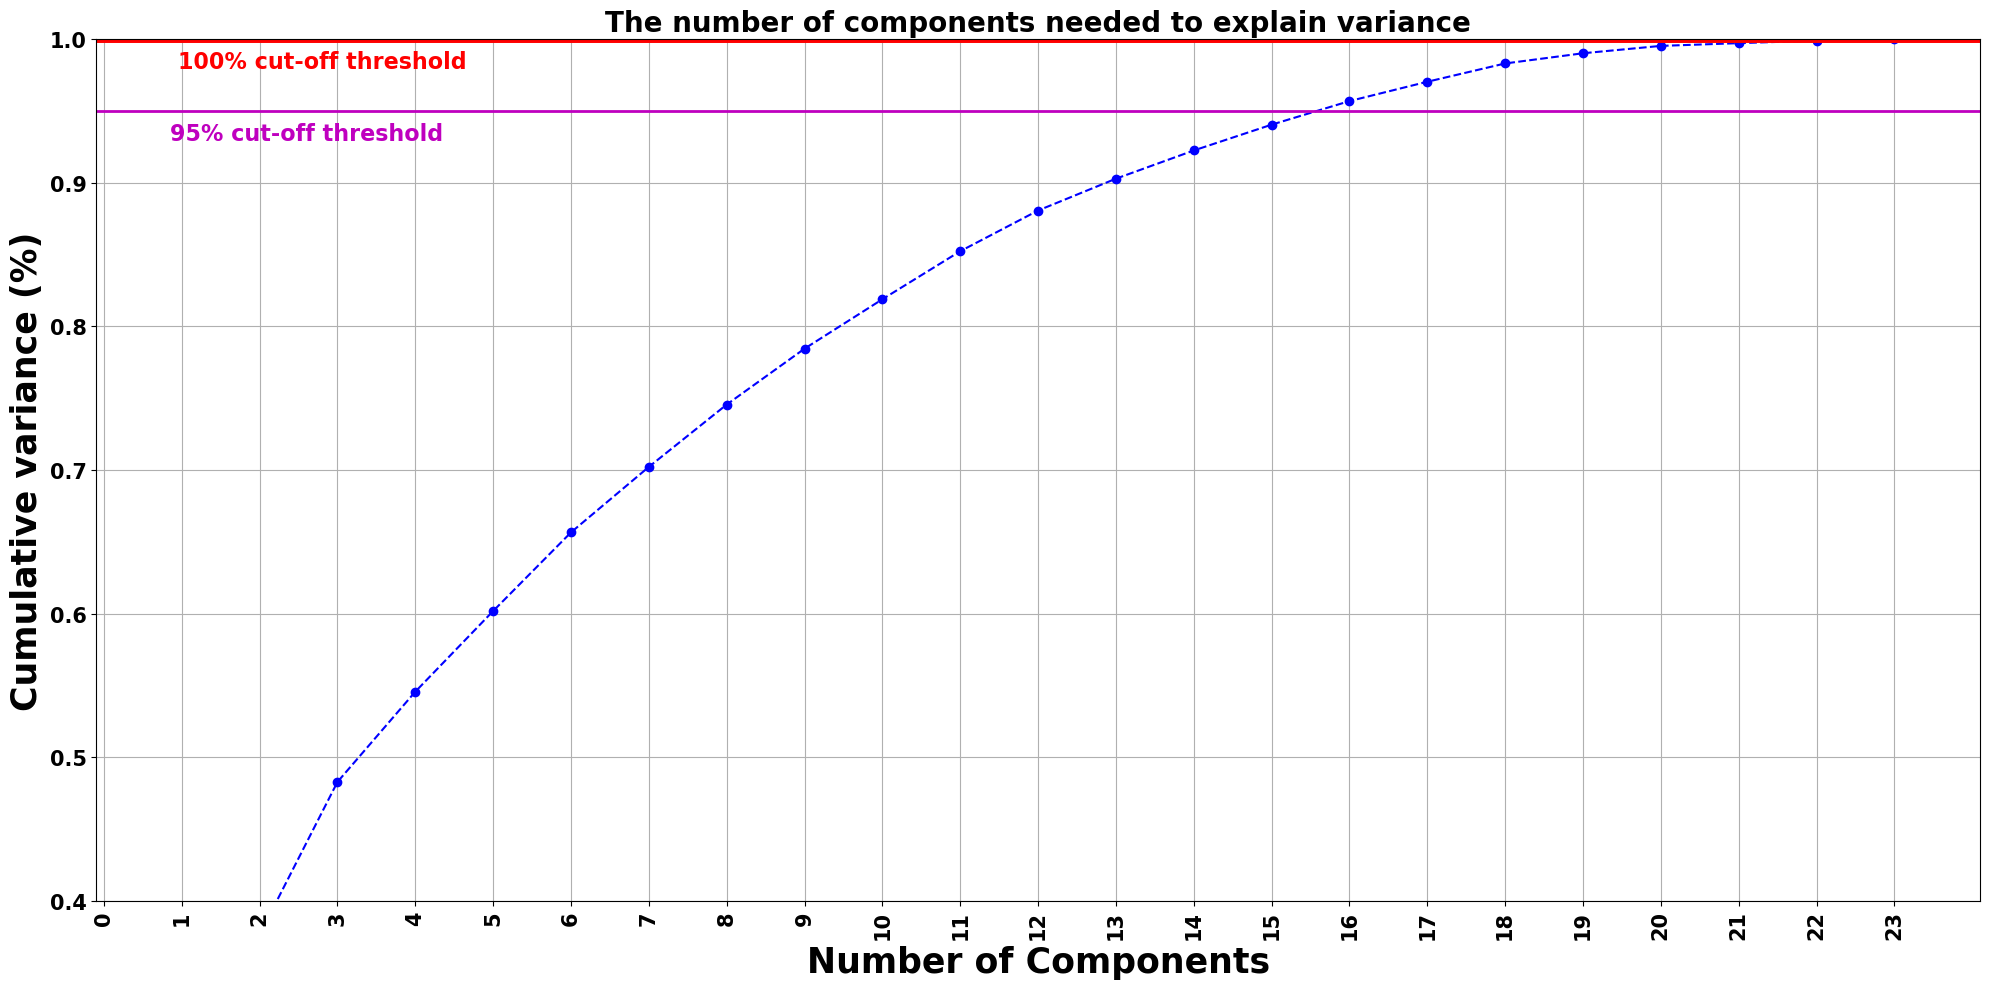

In [172]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, x.shape[1]+1, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components',fontsize=25,fontweight ='bold')
plt.xticks(np.arange(0, x.shape[1]+1, step=1)) 
plt.ylabel('Cumulative variance (%)',fontsize=25,fontweight ='bold')
plt.title('The number of components needed to explain variance',fontsize=20,fontweight ='bold')
plt.axhline(y=1, color='r', linestyle='-',linewidth = '5')
plt.text(0.95, 0.98, '100% cut-off threshold', color = 'red', fontsize=16,fontweight ='bold')
plt.axhline(y=0.95, color='m', linestyle='-',linewidth = '2')
plt.text(0.85, 0.93, '95% cut-off threshold', color = 'm', fontsize=16,fontweight ='bold')
plt.xticks(fontsize=15,fontweight ='bold',rotation=90)
plt.yticks(fontsize=15,fontweight ='bold',rotation=0)
plt.grid(axis = 'x')
plt.grid(True)
plt.ylim(0.4,1.0)
plt.tight_layout()
plt.show()

#### Observations:
- **As per the graph, we can see that 6 principal components attribute for 95% of variation in the data. Hence I will pick 16 components for our prediction**
- **I will use 16 features as no. of components in PCA to reduce the dimensions**

In [173]:
# Applying PCA transformation on X data to reduce the no. of columns
pca=PCA(n_components=16)
x_clas=pca.fit_transform(x)
x_clas=pd.DataFrame(x_clas)
x_clas.head()

0         1         2         3         4         5         6   \
0  3.478899  0.117460 -0.910750 -0.669541  0.300464  0.708212  0.887494   
1 -0.551322  2.915274  2.215804 -0.181821 -0.058691 -1.234269  0.860399   
2  2.694379  1.037992 -1.317783 -0.667827 -0.336541  0.421226  0.791426   
3 -3.620967  1.817190  2.601301 -0.305241  1.377396  0.295348 -0.495040   
4 -2.517452  1.553417 -3.404638  0.469966  1.174057  1.624891  1.347174   

         7         8         9         10        11        12        13  \
0 -0.683791 -1.367809 -1.511912  0.640936  0.018819 -0.489003 -0.478071   
1  0.535979  1.827547  0.459569 -0.445752 -1.891410  0.312950  0.007956   
2  0.768430  0.375811 -1.676906  0.027859  0.811912  1.236471 -0.292680   
3 -0.177288  0.575235 -0.128055 -0.859618  0.094823 -0.330852  0.139531   
4 -0.523533  0.544596  0.596497 -1.214826 -0.548648 -0.102339 -0.622144   

         14        15  
0  1.262577 -0.037300  
1 -0.056276 -0.858585  
2 -0.170284  0.643370  
3 -0.293264 -0.318771  
4  0.339386  0.105379

#### Observations:
- **After applying PCA transformation, X dataset is reduced to 16 dimensions. This X data can be used for model training**

## Checking Multicollinearity again after PCA transformation

In [174]:
# Checking multicollinearity using VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = x_clas[list(x_clas.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF  Column
8   1.0       8
9   1.0       9
12  1.0      12
13  1.0      13
0   1.0       0
1   1.0       1
2   1.0       2
3   1.0       3
5   1.0       5
6   1.0       6
7   1.0       7
10  1.0      10
11  1.0      11
14  1.0      14
15  1.0      15
4   1.0       4

#### Observations:
- **No multicollinearity is noticed after PCA transformation as VIF < 5 for all features**

In [175]:
y_clas.shape

(6378,)

In [176]:
x_clas.shape

(6378, 16)

# Model Building - REGRESSION

- **Starting with "LinearRegression" to build the model**

In [177]:
x=x_reg
y=y_reg

### Finding Best Random State

Best random state: 816, Best R2 score: 43.97


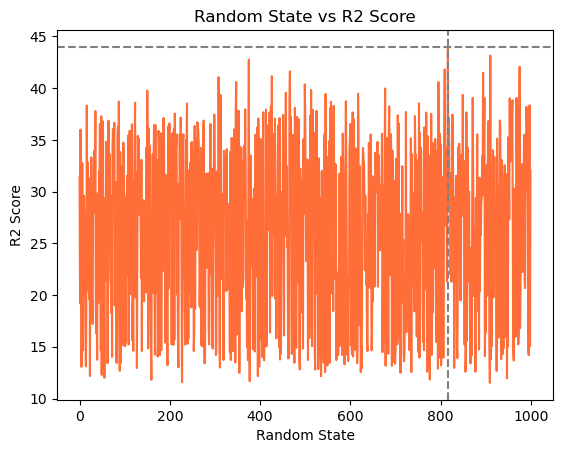

In [178]:
# Defining the required libraries

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

lr=LinearRegression() # Defining instance for linearregression

# Initialize empty lists for storing the random state values and the performance metric scores
random_states = []
scores = []

# Split the data into train and test sets for different random states
best_score = 0
best_random_state = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score = r2_score(y_test, y_pred)

    # Append the random state value and the performance metric score to the lists
    random_states.append(i)
    scores.append(score*100)
    if score > best_score:
        best_score = score
        best_random_state = i

print(f"Best random state: {best_random_state}, Best R2 score: {round((best_score*100),2)}")

# Plot the line chart
plt.plot(random_states, scores)
plt.xlabel('Random State')
plt.ylabel('R2 Score')
plt.title('Random State vs R2 Score')
# Add dashed lines
plt.axhline(y=max(scores), linestyle='--', color='gray')
plt.axvline(best_random_state, linestyle='--', color='gray')
plt.show()

In [179]:
# Best Random State
BRS=best_random_state
BRS

816

#### Observations: 
- **From the above plot, best random state is 816 where R2 score is high. This random state will be used for buidling all regression models**

In [180]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [181]:
# Training the model and checking  metrics with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

print("Model : Linear Regression Metrics")
r2_score_lr=r2_score(y_test,pred_test)
print("R2 Score : ",round(r2_score(y_test,pred_test)*100,1))
mae_lr=mean_absolute_error(y_test,pred_test)
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
mse_lr=mean_squared_error(y_test,pred_test)
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
rmse_lr=np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

Model : Linear Regression Metrics
R2 Score :  44.0
Mean Absolute Error(MAE) :  2.472814506659489
Mean Squared Error(MSE) :  25.276045522873474
Root Mean Squared Error(RMSE) :  5.027528768975218


## Cross Validation for Linear Regression

- **Finding the best no. folds where the delta is least between cross validation and model scores.**

Model score: 43.9748
CV score with 2 folds: 22.8030
CV score with 3 folds: 23.6634
CV score with 4 folds: 24.7621
CV score with 5 folds: 24.7993
CV score with 6 folds: 26.4796
CV score with 7 folds: 27.1536
CV score with 8 folds: 26.8746
CV score with 9 folds: 27.7737
CV score with 10 folds: 29.1878
CV score with 11 folds: 28.8639
CV score with 12 folds: 28.7507
CV score with 13 folds: 29.5015
CV score with 14 folds: 29.4594
CV score with 15 folds: 29.3806
CV score with 16 folds: 30.5198
CV score with 17 folds: 30.6262
CV score with 18 folds: 31.0383
CV score with 19 folds: 31.8372
CV score with 20 folds: 31.8413
Best number of folds: 20


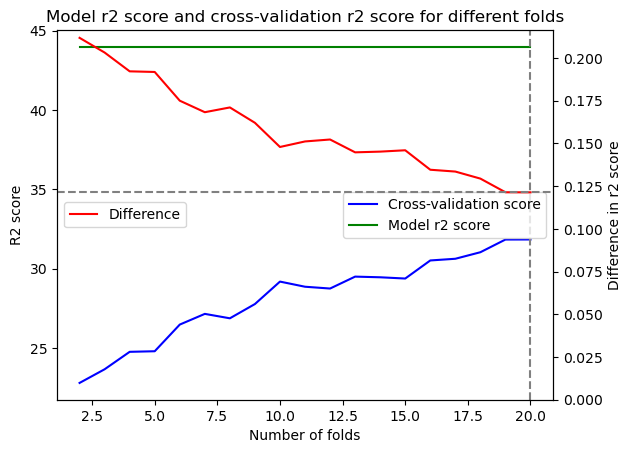

In [182]:
from sklearn.model_selection  import cross_val_score

pred_lr=lr.predict(x_test)
lss=r2_score(y_test,pred_lr)

# Finding the optimized folds from Linear Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

folds_range = range(2, 21)

for j in folds_range:
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))

# Find the best number of folds based on smallest difference between cross-validation score and model score

best_n_folds = folds_range[np.argmin(Difference)]

# Print the results
print("Model score: {:.4f}".format(lss*100))
for n_folds, cv_score in zip(folds_range, CV_Score):
    print("CV score with {} folds: {:.4f}".format(n_folds, cv_score))
print("Best number of folds: {}".format(best_n_folds))

# plot cross-validation scores and model scores for each number of folds
fig, ax1 = plt.subplots()
ax1.plot(No_of_Folds, CV_Score, label='Cross-validation score', color='blue')
ax1.plot(No_of_Folds, Model_Score, label='Model r2 score', color='green')
ax1.set_xlabel('Number of folds')
ax1.set_ylabel('R2 score')

ax2 = ax1.twinx()
ax2.plot(No_of_Folds, Difference, label='Difference', color='red')
ax2.set_ylabel('Difference in r2 score')
ax2.set_ylim(bottom=0)

# Add dashed lines
ax1.axvline(best_n_folds, linestyle='--', color='gray')
ax2.axhline(min(Difference), linestyle='--', color='gray')

plt.title('Model r2 score and cross-validation r2 score for different folds')
ax1.legend(loc='center right')
ax2.legend(loc='center')
plt.legend(['Difference'], loc='center left')
plt.show()

In [183]:
# Getting the best no. of folds where the least difference between cross validation score and model score
BCV=best_n_folds
BCV

20

#### Observations: 
- **Considered the no. folds where the delta is least between cross validation and model scores. In this case, selected CV=20**

In [184]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore=cross_val_score(lr,x,y,cv=BCV)
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()

print("CV R2 scores for each fold are: ", lsscore*100)
print("Mean CV R2 score:", round(lsscore_selected*100,1))
print("Model R2 score:", round(lss*100,1))
print("Difference in R2 Scores:", round(lss-lsscore_selected,5))
print('-'*80)
print("Model : Linear Regression Metrics")
r2_score_lr=r2_score(y_test,pred_test)
print("R2 Score : ",round(r2_score(y_test,pred_test)*100,1))
mae_lr=mean_absolute_error(y_test,pred_test)
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred_test))
mse_lr=mean_squared_error(y_test,pred_test)
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred_test))
rmse_lr=np.sqrt(mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred_test)))

CV R2 scores for each fold are:  [34.20669945 21.39598839 41.95913003 37.80972854 12.26958502 22.93379652
 36.38630534 44.12757633 37.21690181 30.33976005 37.51820432 18.64168438
 30.83182052 27.60359552 43.81097687 33.45024043 41.29680294  9.79907186
 28.91391477 46.31463674]
Mean CV R2 score: 31.8
Model R2 score: 44.0
Difference in R2 Scores: 0.12133
--------------------------------------------------------------------------------
Model : Linear Regression Metrics
R2 Score :  44.0
Mean Absolute Error(MAE) :  2.472814506659489
Mean Squared Error(MSE) :  25.276045522873474
Root Mean Squared Error(RMSE) :  5.027528768975218


## Other Regression Algorithms

In [186]:
from sklearn.tree import DecisionTreeRegressor          # DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor       # KNeighborsRegressor
from sklearn.linear_model import SGDRegressor           # Gradient Descent Regressor
from sklearn.svm import SVR                             # Support Vector Regressor
from sklearn.linear_model import Lasso                  # Lasso Regressor
from sklearn.linear_model import Ridge                  # Ridge Regressor
from sklearn.linear_model import ElasticNet             # Elastic Net Regressor
from sklearn.ensemble import RandomForestRegressor      # RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor        # ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor  # GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor          # AdaBoostRegressor
from xgboost import XGBRegressor                        # XGBRegressor

# Defining the list with all Algorithms

models=[('DecisionTreeRegressor()',DecisionTreeRegressor()),('KNeighborsRegressor()',KNeighborsRegressor()),
        ('SGDRegressor()',SGDRegressor()),('SVR()',SVR()),('Lasso()',Lasso()),('Ridge()',Ridge()),
        ('ElasticNet()',ElasticNet()),('RandomForestRegressor()',RandomForestRegressor()),
        ('ExtraTreesRegressor()',ExtraTreesRegressor()),('GradientBoostingRegressor()',GradientBoostingRegressor()),
        ('AdaBoostRegressor()',AdaBoostRegressor()),('XGBRegressor()',XGBRegressor())]

# Defining empty lists
Model=[lr]
CV_Score=[round(lsscore_selected*100,1)]
Model_Score=[round(lss*100,1)]
Difference=[abs(lss-lsscore_selected)]
MAE=[mean_absolute_error(y_test,pred_lr)]
MSE=[mean_squared_error(y_test,pred_lr)]
RMSE=[np.sqrt(mean_squared_error(y_test,pred_lr))]

# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(r2_score(y_test,pred_test)*100)        # Appending "R2 Score" to the list 
    MAE.append(mean_absolute_error(y_test,pred_test))         # Appending "MAE" to the list 
    MSE.append(mean_squared_error(y_test,pred_test))          # Appending "MSE" to the list 
    RMSE.append(np.sqrt(mean_squared_error(y_test,pred_test)))# Appending "RMSE" to the list 
    
    cvscore=cross_val_score(model[1],x,y,cv=BCV)               # Cross Validation score calculation for all folds
    score = cvscore.mean()                                     # Cross Validation mean score calculation             
    CV_Score.append(round(score*100,1))                                # Appending "cross validation score" to the list
    Difference.append(abs(r2_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list
    
# Creating the dataframe with scores and the differences

# Create a Pandas DataFrame to display the scores for each model
scores_df = pd.DataFrame({'Model': Model,
                          'Model R2 score': Model_Score,
                          'CV R2 score': CV_Score,
                          'MAE': MAE,
                          'MSE': MSE,
                          'RMSE': RMSE,
                          'Difference in R2 Scores':Difference})

print('\033[1m'+"Table with performance of the models"+'\033[0m\n')
scores_df.sort_values(by=["Model R2 score"],ascending=False)  # sorting the score table using the model score

Table with performance of the models



Model  Model R2 score  CV R2 score        MAE  \
0            LinearRegression()       44.000000         31.8   2.472815   
6                       Ridge()       43.975308         31.8   2.472707   
3                SGDRegressor()       43.630018         30.8   2.494316   
9         ExtraTreesRegressor()       36.507427         27.5   2.172528   
4                         SVR()       33.296062         27.7   1.754405   
7                  ElasticNet()       33.038090         25.5   2.660565   
5                       Lasso()       27.436636         21.3   2.904540   
10  GradientBoostingRegressor()       13.987870         14.9   2.510622   
8       RandomForestRegressor()        5.796019         18.3   2.400306   
2         KNeighborsRegressor()       -1.694104          8.7   2.275439   
12               XGBRegressor()      -42.141189         -7.9   2.670857   
11          AdaBoostRegressor()     -401.044559       -301.3  13.675658   
1       DecisionTreeRegressor()     -824.376410       -166.6   3.830016   

           MSE       RMSE  Difference in R2 Scores  
0    25.276046   5.027529                 0.121334  
6    25.275795   5.027504                 0.121325  
3    25.431574   5.042973                 0.128343  
9    28.644963   5.352099                 0.089837  
4    30.093785   5.485780                 0.056317  
7    30.210170   5.496378                 0.075283  
5    32.737292   5.721651                 0.061535  
10   38.804764   6.229347                 0.009040  
8    42.500554   6.519245                 0.125058  
2    45.879758   6.773460                 0.103724  
12   64.127644   8.007974                 0.342363  
11  226.048532  15.034910                 0.997363  
1   417.036622  20.421475                 6.577802

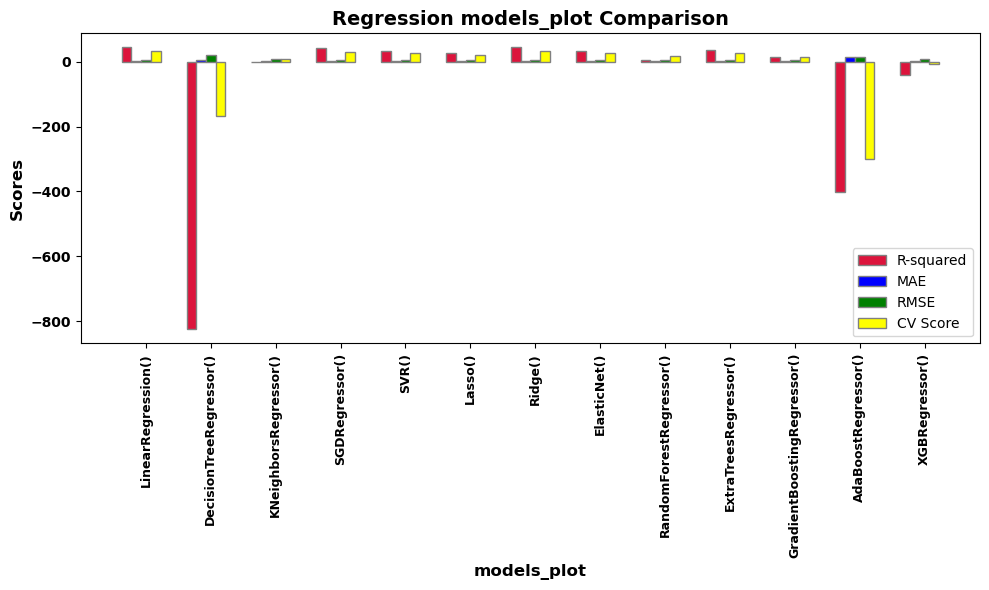

In [187]:
# Plotting all models_plot metrics
models_plot = ['LinearRegression()','DecisionTreeRegressor()','KNeighborsRegressor()','SGDRegressor()','SVR()','Lasso()','Ridge()','ElasticNet()',
          'RandomForestRegressor()','ExtraTreesRegressor()','GradientBoostingRegressor()','AdaBoostRegressor()','XGBRegressor()']

barWidth = 0.15 # set width of bars

# set heights of bars
r2_bar = Model_Score
mae_bar = MAE
RMSE_bar = RMSE
cv_bar = CV_Score

# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]

# define colors for each bar
colors = ['crimson','blue','green', 'yellow', 'magenta']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(10,6))

# create bar plots with defined colors
ax.bar(pos1, r2_bar, color=colors[0], width=barWidth, edgecolor='grey', label='R-squared')
ax.bar(pos2, mae_bar, color=colors[1], width=barWidth, edgecolor='grey', label='MAE')
ax.bar(pos3, RMSE_bar, color=colors[2], width=barWidth, edgecolor='grey', label='RMSE')
ax.bar(pos4, cv_bar, color=colors[3], width=barWidth, edgecolor='grey', label='CV Score')

# add labels and title
plt.title('Regression models_plot Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
plt.legend()
plt.tight_layout()
plt.show()

#### Observations: 
- **Both Linear Regression and Ridge Regression have same R2 score and CV score. Ridge regression has slightly better MSE and RMSE values compared to Linear Regression. Hence considered Ridge Regression for Hyper Parameter Tuning**
- **Hyper parameter tuning will be pefromed for "Ridge Regressor"**

## Hyper Parameter Tuning

In [188]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for Ridge Regression
parameters = {
    'alpha':[0.001,0.005,0.01,0.1,0.5,1],
    'fit_intercept':[True,False],
    'copy_X':[True, False],
    'max_iter':[1000,5000,10000,15000],
    'tol':[1e-06,5e-06,1e-05,5e-05],
    'solver':['auto', 'svd','cholesky' 'lsqr', 'sparse_cg','sag','saga', 'lbfgs'],
    'positive':[True, False]
}

In [189]:
GCV=GridSearchCV(Ridge(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'solver': 'sparse_cg',
 'tol': 1e-05}

In [190]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=Ridge(alpha=GCV.best_params_['alpha'],fit_intercept=GCV.best_params_['fit_intercept'],
                                    copy_X=GCV.best_params_['copy_X'],max_iter=GCV.best_params_['max_iter'],
                                    tol=GCV.best_params_['tol'],solver=GCV.best_params_['solver'],positive=GCV.best_params_['positive'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)


print('\033[1m'+"Model : Ridge Regressor Metrics"+'\033[0m\n')
print("R2 Score : ",round(r2_score(y_test,pred)*100,1))
print("Mean Absolute Error(MAE) : ",mean_absolute_error(y_test,pred))
print("Mean Squared Error(MSE) : ",mean_squared_error(y_test,pred))
print("Root Mean Squared Error(RMSE) : ",np.sqrt(mean_squared_error(y_test,pred)))

Model : Ridge Regressor Metrics

R2 Score :  44.0
Mean Absolute Error(MAE) :  2.472702773251591
Mean Squared Error(MSE) :  25.275780537522987
Root Mean Squared Error(RMSE) :  5.027502415466649


In [191]:
# Using best CV value and checking the cross validation score again to compare with model score
cvscores = cross_val_score(ht_model, x, y, cv=BCV)
score = cvscores.mean()
ms=r2_score(y_test,pred)

print("CV R2 scores for each fold are: ", cvscores*100)
print("Mean CV R2 score:", round(score*100,1))
print("Model R2 score:", round(ms*100,1))
print("Difference in R2 Scores:", round(ms-score,5))

CV R2 scores for each fold are:  [34.20688671 21.39616056 41.96198138 37.80929654 12.2690895  22.93392832
 36.38851073 44.12758431 37.22450468 30.34188578 37.52416708 18.64197906
 30.83188041 27.6018291  43.81089306 33.45722336 41.29995869  9.79829334
 28.91390422 46.316965  ]
Mean CV R2 score: 31.8
Model R2 score: 44.0
Difference in R2 Scores: 0.12132


#### Observations for Hyper Parameter Tuning: 
- **Both Hyper Parameter Tuned model and the model with default parameters have same R2 score, CV score, MSE and RMSE values for Ridge Regressor**
- **Considering the Ridge Regressor with Hyper parameters Tuned Model as the best and final model for saving**

## Model Saving - Regression

In [192]:
import pickle
filename='Rainfall-Regression.pkl'
pickle.dump(ht_model, open(filename,'wb'))  # saving the Hyper Parameter Tuned Ridge Regressor model

## Conclusion - Prediction from Regression Model

In [193]:
loaded_model=pickle.load(open('Rainfall-Regression.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)
Predicted=loaded_model.predict(x_test)
Original=np.array(y_test)
Predicted_df=pd.DataFrame(data=Predicted,columns=["Predicted"])
Original_df=pd.DataFrame(data=Original,columns=["Original"])
conclusion=pd.concat([Predicted_df,Original_df],axis=1)
conclusion.head(10)

43.97533924183779


Predicted  Original
0  -1.550942       0.0
1  11.743486       2.6
2  -0.717226       0.0
3   7.927609       8.2
4  11.051452       4.2
5   0.249558       0.0
6   0.833666       0.0
7   0.096221       0.0
8  -0.237294       0.0
9  -0.464189       0.0

 True Values Vs Predicted Values plot :


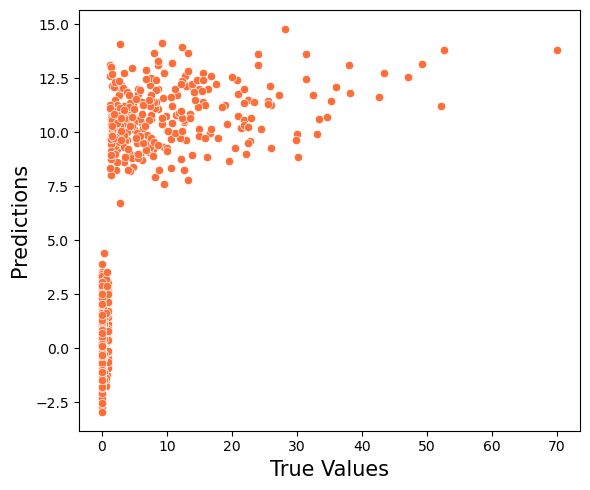

In [194]:
plt.figure(figsize=(6,5))
sns.scatterplot(y_test.round(2), Predicted)
print('\033[1m'+' True Values Vs Predicted Values plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Model Building - Binary Classification

### SMOTE for classfication

- **As the target variable classes are imbalanced, used the random oversampling technique "SMOTE" for balancing the classes in target variable, then will go for model building**

In [195]:
x=x_clas
y=y_clas

In [196]:
# Checking the value count of target column
y.value_counts()

0    4971
1    1407
Name: RainTomorrow, dtype: int64

In [197]:
x.shape

(6378, 16)

In [198]:
y.shape

(6378,)

In [199]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [200]:
# Checking the value count of target column
y.value_counts()

0    4971
1    4971
Name: RainTomorrow, dtype: int64

In [201]:
x.shape

(9942, 16)

In [202]:
y.shape

(9942,)

0    4971
1    4971
Name: RainTomorrow, dtype: int64


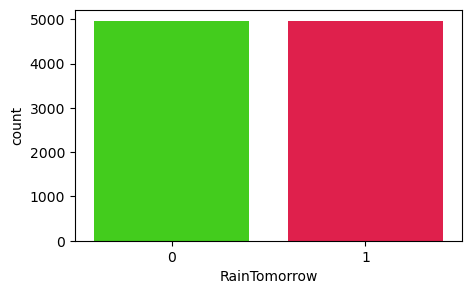

In [203]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y.value_counts())
sns.countplot(y,palette='prism')
plt.show()

#### Observations: 
- **Classes are balanced in the target column**

## Model Building

In [204]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

### Finding Best Random State

Best random state: 809, Best accuracy: 79.69


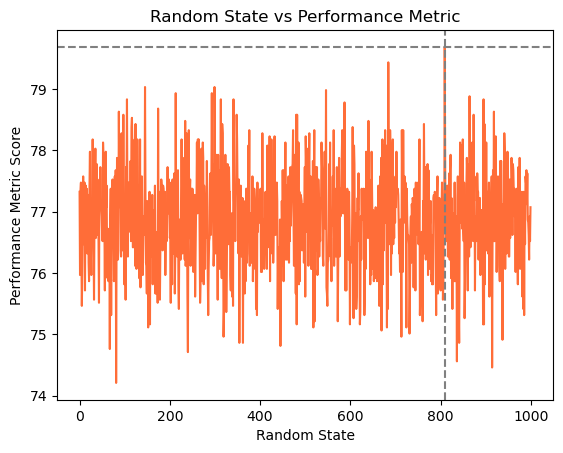

In [205]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, classification_report, roc_curve


lr=LogisticRegression()  # Defining instance for logisticregression

# Initialize empty lists for storing the random state values and the performance metric scores
random_states = []
scores = []

# Split the data into train and test sets for different random states
best_score = 0
best_random_state = 0

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i,stratify=y)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score = accuracy_score(y_test, y_pred)

    # Append the random state value and the performance metric score to the lists
    random_states.append(i)
    scores.append(score*100)
    if score > best_score:
        best_score = score
        best_random_state = i

print(f"Best random state: {best_random_state}, Best accuracy: {round((best_score*100),2)}")

# Plot the line chart
plt.plot(random_states, scores)
plt.xlabel('Random State')
plt.ylabel('Performance Metric Score')
plt.title('Random State vs Performance Metric')
# Add dashed lines
plt.axhline(y=max(scores), linestyle='--', color='gray')
plt.axvline(best_random_state, linestyle='--', color='gray')
plt.show()

In [206]:
# Best Random State
BRS=best_random_state
BRS

809

#### Observations: 
- **From the above plot, best random state is 809 where testing accuracy is high. This random state will be used for buidling all classification models**

In [207]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS,stratify=y)

In [208]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
y_prob = lr.predict_proba(x_test)

accu_score=accuracy_score(y_test,pred_test)
print("Accuracy Score:",round(accuracy_score(y_test,pred_test)*100,1))
f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

Accuracy Score: 79.7
F1 Score: 79.7
Precision Score: 79.7
Recall Score: 79.7
ROC AUC Score: 87.4
AUC PR Score: 86.9


In [209]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       994
           1       0.80      0.80      0.80       995

    accuracy                           0.80      1989
   macro avg       0.80      0.80      0.80      1989
weighted avg       0.80      0.80      0.80      1989



In [210]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[789 205]
 [199 796]]


## Cross Validation for Logistic Regression

- **Finding the best no. folds where the delta is least between cross validation and model scores.**

Model score: 79.6883
CV score with 2 folds: 76.9161
CV score with 3 folds: 77.0268
CV score with 4 folds: 76.7853
CV score with 5 folds: 76.8859
CV score with 6 folds: 76.8960
CV score with 7 folds: 76.8860
CV score with 8 folds: 76.8559
CV score with 9 folds: 76.9665
CV score with 10 folds: 76.8458
Best number of folds: 3


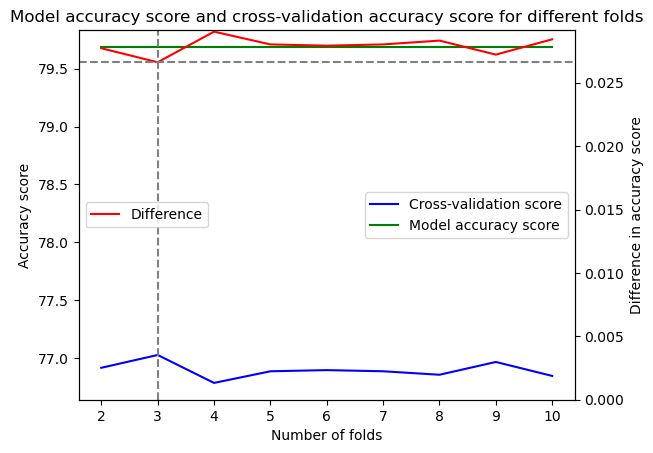

In [211]:
from sklearn.model_selection  import cross_val_score

pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

folds_range = range(2, 11)

for j in folds_range:
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))

# Find the best number of folds based on smallest difference between cross-validation score and model score

best_n_folds = folds_range[np.argmin(Difference)]

# Print the results
print("Model score: {:.4f}".format(lss*100))
for n_folds, cv_score in zip(folds_range, CV_Score):
    print("CV score with {} folds: {:.4f}".format(n_folds, cv_score))
print("Best number of folds: {}".format(best_n_folds))

# plot cross-validation scores and model scores for each number of folds
fig, ax1 = plt.subplots()
ax1.plot(No_of_Folds, CV_Score, label='Cross-validation score', color='blue')
ax1.plot(No_of_Folds, Model_Score, label='Model accuracy score', color='green')
ax1.set_xlabel('Number of folds')
ax1.set_ylabel('Accuracy score')

ax2 = ax1.twinx()
ax2.plot(No_of_Folds, Difference, label='Difference', color='red')
ax2.set_ylabel('Difference in accuracy score')
ax2.set_ylim(bottom=0)

# Add dashed lines
ax1.axvline(best_n_folds, linestyle='--', color='gray')
ax2.axhline(min(Difference), linestyle='--', color='gray')

plt.title('Model accuracy score and cross-validation accuracy score for different folds')
ax1.legend(loc='center right')
ax2.legend(loc='center')
plt.legend(['Difference'], loc='center left')
plt.show()

In [212]:
# Getting the best no. of folds where the least difference between cross validation score and model score
BCV=best_n_folds
BCV

3

#### Observations: 
- **Considered the no. folds where the delta is least between cross validation and model scores. In this case, selected CV=3**

In [213]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore = cross_val_score(lr, x, y, cv=BCV)
lsscore_selected = lsscore.mean()

print("CV accuracy scores for each fold are: ", lsscore*100)
print("Mean CV accuracy score:", round(lsscore_selected*100,1))
print("Model accuracy score:", round(lss*100,1))
print("Difference in Accuracy Scores:", round(lss-lsscore_selected,5))

f1_Score_sel=f1_score(y_test,pred_test, average='weighted')
print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))
precision_score_sel=precision_score(y_test,pred_test, average='weighted')
print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1))
recall_score_sel=recall_score(y_test,pred_test, average='weighted')
print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))
roc_auc_score_sel=roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
pr_auc = average_precision_score(y_test, y_prob[:, 1], average='weighted')
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [76.73506337 77.21786361 77.12733856]
Mean CV accuracy score: 77.0
Model accuracy score: 79.7
Difference in Accuracy Scores: 0.02662
F1 Score: 79.7
Precision Score: 79.7
Recall Score: 79.7
ROC AUC Score: 87.4
AUC PR Score: 86.9


## Other Classification Algorithms

In [214]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier

# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier(loss='log')),
        ('SVC()',SVC(probability=True)),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]

# Defining empty lists
Model=[lr]
CV_Score=[round(lsscore_selected*100,1)]
Model_Score=[round(lss*100,1)]
Difference=[abs(lss-lsscore_selected)]
F1_Scores=[round(f1_Score_sel*100,1)]
precision_scores=[round(precision_score_sel*100,1)]
recall_scores=[round(recall_score_sel*100,1)]
roc_auc_scores=[round(roc_auc_score_sel*100,1)]
pr_auc_scores=[round(pr_auc*100,1)]

# Loop for all algorithms to train the model and for the cross validation
for model in models:    
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(round(accuracy_score(y_test,pred_test)*100,1))  # Appending "Accuracy score" to the list
    F1_Scores.append(round(f1_score(y_test,pred_test, average='weighted')*100,1))  # Appending "F1 score" to the list
    precision_scores.append(round(precision_score(y_test,pred_test, average='weighted')*100,1))  # Appending "precision score" to the list
    recall_scores.append(round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Appending "recall score" to the list
    
    y_prob = model[1].predict_proba(x_test)
    roc_auc_scores.append(round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))  # Appending "roc auc score" to the list
    pr_auc_scores.append(round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))  # Appending "auc pr score" to the list
    
    print('\n')
    print('\033[1m'+'Metrics for Model:', model[0], ':'+'\033[0m\n')
    print("Accuracy Score:", round(accuracy_score(y_test,pred_test)*100,1))               # Printing "accuracy_score"
    print("F1 Score:",round(f1_score(y_test,pred_test, average='weighted')*100,1))        # Printing "f1_score"
    print("Precision Score:",round(precision_score(y_test,pred_test, average='weighted')*100,1)) # Printing "precision_score"
    print("Recall Score:",round(recall_score(y_test,pred_test, average='weighted')*100,1))  # Printing "recall_score"
    print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1)) # Printing "roc auc_score"
    print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1)) # Printing "auc_pr_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*80)    

    cvscore=cross_val_score(model[1],x,y,cv=BCV)               # Cross Validation score calculation for all folds
    score = cvscore.mean()                                     # Cross Validation mean score calculation      
    
    print('\033[1m'+'Cross Validation Score for Model:', model[0], ':'+'\033[0m\n')
    print("CV accuracy scores for each fold are: ", cvscore*100)
    print("Mean CV accuracy score:", round(score*100,1))
    print('\n')
    print('='*80)
    
    CV_Score.append(round(score*100,1))                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences

# Create a Pandas DataFrame to display the scores for each model
scores_df = pd.DataFrame({'Model': Model,
                          'Accuracy': Model_Score,
                          'CV score': CV_Score,
                          'F1-score': F1_Scores,
                          'Precision': precision_scores,
                          'Recall': recall_scores,
                          'AUC-ROC': roc_auc_scores,
                          'AUC-PR': pr_auc_scores,
                          'Difference in Accuracy Scores':Difference})

print("Table with performance of the models")
scores_df.sort_values(by=["Accuracy"],ascending=False)  # sorting the score table using the model score



Metrics for Model: GaussianNB() :

Accuracy Score: 77.8
F1 Score: 77.8
Precision Score: 77.8
Recall Score: 77.8
ROC AUC Score: 86.8
AUC PR Score: 86.3
Confusion Matrix:
[[784 210]
 [231 764]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       994
           1       0.78      0.77      0.78       995

    accuracy                           0.78      1989
   macro avg       0.78      0.78      0.78      1989
weighted avg       0.78      0.78      0.78      1989

--------------------------------------------------------------------------------
Cross Validation Score for Model: GaussianNB() :

CV accuracy scores for each fold are:  [75.22631261 75.76946288 76.97646349]
Mean CV accuracy score: 76.0




Metrics for Model: Decision Tree Classifier() :

Accuracy Score: 80.4
F1 Score: 80.4
Precision Score: 80.5
Recall Score: 80.4
ROC AUC Score: 80.4
AUC PR Score: 73.9
Confusion Matrix:
[[766 228]
 [162 833]]
Classific

Model  Accuracy  CV score  F1-score  Precision  \
7         ExtraTreesClassifier()      90.8      90.1      90.8       91.0   
6       RandomForestClassifier()      89.5      87.5      89.5       89.6   
10               XGBClassifier()      88.1      86.5      88.1       88.2   
3         KNeighborsClassifier()      84.6      83.2      84.4       86.4   
5                          SVC()      83.7      82.4      83.7       83.8   
8   GradientBoostingClassifier()      82.0      80.2      81.9       82.0   
2     Decision Tree Classifier()      80.4      80.7      80.4       80.5   
0           LogisticRegression()      79.7      77.0      79.7       79.7   
9           AdaBoostClassifier()      79.1      77.4      79.1       79.1   
4                SGDClassifier()      78.0      76.2      78.0       78.1   
1                   GaussianNB()      77.8      76.0      77.8       77.8   

    Recall  AUC-ROC  AUC-PR  Difference in Accuracy Scores  
7     90.8     97.9    97.8                       0.007873  
6     89.5     96.4    96.3                       0.020852  
10    88.1     94.4    93.4                       0.015727  
3     84.6     92.6    88.4                       0.014329  
5     83.7     92.3    90.9                       0.012823  
8     82.0     90.5    90.2                       0.017355  
2     80.4     80.4    73.9                       0.002958  
0     79.7     87.4    86.9                       0.026615  
9     79.1     88.0    87.6                       0.016860  
4     78.0     86.7    86.2                       0.018272  
1     77.8     86.8    86.3                       0.018373

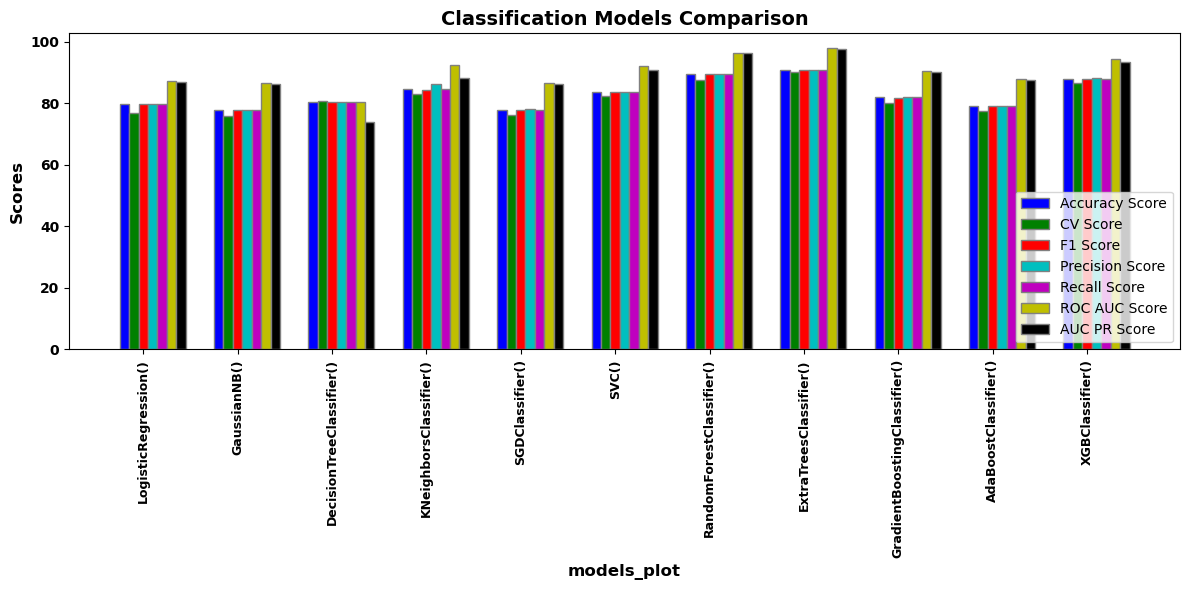

In [215]:
# Plotting all models_plot metrics
models_plot = ['LogisticRegression()','GaussianNB()','DecisionTreeClassifier()','KNeighborsClassifier()','SGDClassifier()',
               'SVC()','RandomForestClassifier()','ExtraTreesClassifier()','GradientBoostingClassifier()','AdaBoostClassifier()',
               'XGBClassifier()']

barWidth = 0.1 # set width of bars

# set heights of bars
accu_bar = Model_Score
cv_bar = CV_Score
f1_bar = F1_Scores
precision_bar = precision_scores
recall_bar = recall_scores
roc_auc_bar = roc_auc_scores
pr_auc_bar = pr_auc_scores

# set positions of bars on x-axis
pos1 = np.arange(len(Model_Score))
pos2 = [x + barWidth for x in pos1]
pos3 = [x + barWidth for x in pos2]
pos4 = [x + barWidth for x in pos3]
pos5 = [x + barWidth for x in pos4]
pos6 = [x + barWidth for x in pos5]
pos7 = [x + barWidth for x in pos6]

# define colors for each bar
#colors = ['crimson','blue','green', 'yellow', 'magenta']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k','b', 'g', 'r', 'c', 'm', 'y', 'k']

# create subplots with figsize parameter to control figure size
fig, ax = plt.subplots(figsize=(12,6))

# create bar plots with defined colors
ax.bar(pos1, accu_bar, color=colors[0], width=barWidth, edgecolor='grey', label='Accuracy Score')
ax.bar(pos2, cv_bar, color=colors[1], width=barWidth, edgecolor='grey', label='CV Score')
ax.bar(pos3, f1_bar, color=colors[2], width=barWidth, edgecolor='grey', label='F1 Score')
ax.bar(pos4, precision_bar, color=colors[3], width=barWidth, edgecolor='grey', label='Precision Score')
ax.bar(pos5, recall_bar, color=colors[4], width=barWidth, edgecolor='grey', label='Recall Score')
ax.bar(pos6, roc_auc_bar, color=colors[5], width=barWidth, edgecolor='grey', label='ROC AUC Score')
ax.bar(pos7, pr_auc_bar, color=colors[6], width=barWidth, edgecolor='grey', label='AUC PR Score')


# add labels and title
plt.title('Classification Models Comparison',fontsize=14, fontweight='bold')
plt.xticks([r + barWidth*2 for r in range(len(Model_Score))], models_plot,fontsize=9,fontweight ='bold',rotation=90)
plt.yticks(fontsize=10,fontweight ='bold')
plt.xlabel('models_plot',fontsize=12,fontweight ='bold')
plt.ylabel('Scores',fontsize=12,fontweight ='bold')
# plt.legend()
plt.legend(fontsize='10', title_fontsize='10',loc="lower right", frameon=True)
plt.tight_layout()
plt.show()

#### Observations: 
- **We can see that ExtraTreesClassifier() gives us maximum Accuracy score, max f1 score and max scores for remaining metrics along with max cross-validation score compared to remaining models.**
- **Hyper parameter tuning will be performed for "ExtraTreesClassifier()**

## Hyper Parameter Tuning

In [216]:
from sklearn.model_selection import GridSearchCV

# Defining parameters for ExtraTreesClassifier

# Number of trees in Extra Tree
n_estimators = [50,100,200,300]
# Scoring criterion
criterion=["gini", "entropy", "log_loss"]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [None,2,3,4,5,7,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Create the random grid
parameters = {'n_estimators': n_estimators,
              'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [217]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5,n_jobs=-1)  # Defining instance for GridSearchCV
GCV.fit(x_train,y_train)   # Apply GridSearchCV to train the model with all combination of parameters
GCV.best_params_   # printing the best parameters

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [218]:
# Training the model using best parameters from GridSearchCV and checking the metrics
ht_model=ExtraTreesClassifier(n_estimators=GCV.best_params_['n_estimators'],criterion=GCV.best_params_['criterion'],
                                    max_features=GCV.best_params_['max_features'],max_depth=GCV.best_params_['max_depth'],
                                    min_samples_split=GCV.best_params_['min_samples_split'],min_samples_leaf=GCV.best_params_['min_samples_leaf'])
ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Model Accuracy Score:")
print(round(acc*100,1))
print("Confusion Matrix:")
print(confusion_matrix(y_test,pred))
print("Classification Report:")
print(classification_report(y_test,pred))

Model Accuracy Score:
91.4
Confusion Matrix:
[[882 112]
 [ 59 936]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       994
           1       0.89      0.94      0.92       995

    accuracy                           0.91      1989
   macro avg       0.92      0.91      0.91      1989
weighted avg       0.92      0.91      0.91      1989



In [219]:
# Using best CV value and checking the cross validation score again to compare with model score
cvscores = cross_val_score(ht_model, x, y, cv=BCV)
score = cvscores.mean()
ms=accuracy_score(y_test,pred)
y_prob = ht_model.predict_proba(x_test)

print("CV accuracy scores for each fold are: ", cvscores*100)
print("Mean CV accuracy score:", round(score*100,1))
print("Model accuracy score:", round(ms*100,1))
print("Difference in Accuracy Scores:", round(ms-score,5))
print("F1 Score:",round(f1_score(y_test,pred, average='weighted')*100,1))
print("Precision Score:",round(precision_score(y_test,pred, average='weighted')*100,1))
print("Recall Score:",round(recall_score(y_test,pred, average='weighted')*100,1))
print("ROC AUC Score:",round(roc_auc_score(y_test, y_prob[:, 1], multi_class='ovr', average='weighted')*100,1))
print("AUC PR Score:",round(average_precision_score(y_test, y_prob[:, 1], average='weighted')*100,1))

CV accuracy scores for each fold are:  [88.71454436 90.10259505 91.52082076]
Mean CV accuracy score: 90.1
Model accuracy score: 91.4
Difference in Accuracy Scores: 0.0129
F1 Score: 91.4
Precision Score: 91.5
Recall Score: 91.4
ROC AUC Score: 97.9
AUC PR Score: 98.0


### Observations for Hyper Parameter Tuning: 
- **Accuracy Score, F1 score and remainig metrics for the model with hyper parameters tuned is better than the model with default Parameters for ExtraTreesClassifier, hence considered the final model with hyper parameters tuned for saving**

## AUC ROC Curve

AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings.

ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1

Plotting AUC ROC Curve helps in comparing the performance among multiple models. The model with higher AUC is the best model.

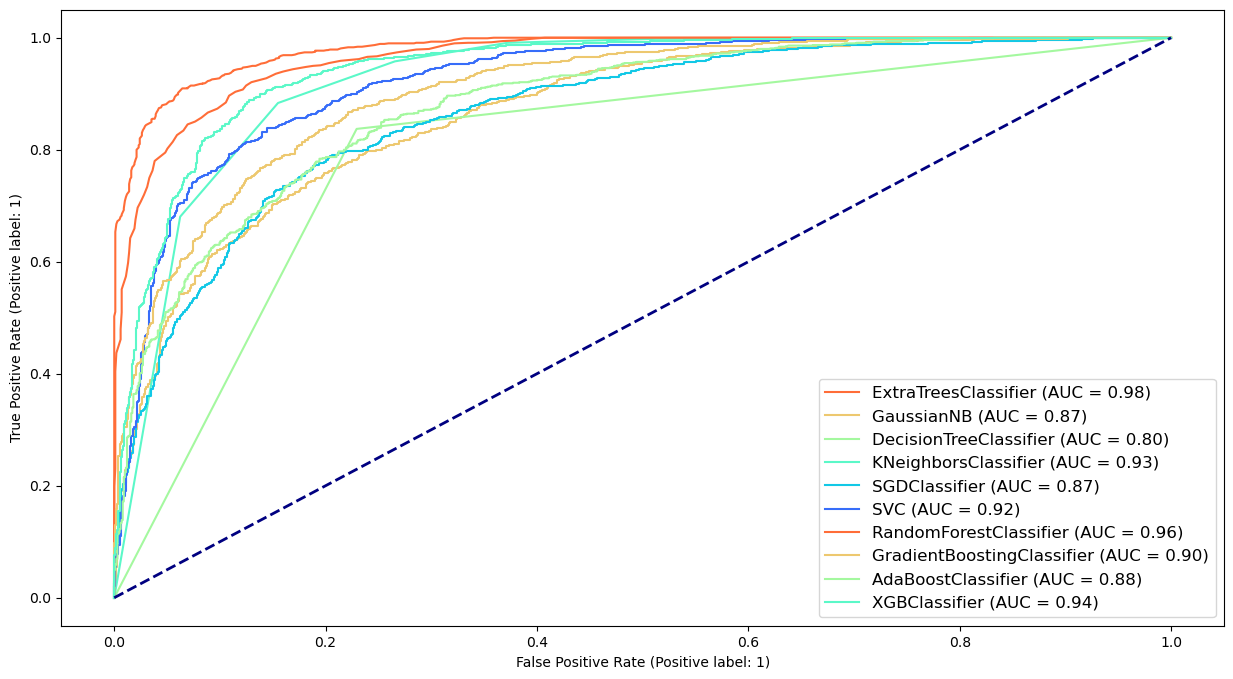

In [220]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 8)) # Set the figure size to 10 inches by 10 inches

# models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),('SGDClassifier()',SGDClassifier()),
#        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier()),
#        ('VotingClassifier()',VotingClassifier(estimators=estimator,voting="soft"))]

# Initially Plotting the AUC ROC curve for Extra Trees Classifier which is best model identified so far
disp = plot_roc_curve(ht_model, x_test, y_test, ax=ax)

# Plotting the AUC ROC curve for remaining models with same axis of Extra Trees Classifier
plot_roc_curve(models[0][1], x_test, y_test, ax=ax)
plot_roc_curve(models[1][1], x_test, y_test, ax=ax)
plot_roc_curve(models[2][1], x_test, y_test, ax=ax)
plot_roc_curve(models[3][1], x_test, y_test, ax=ax)
plot_roc_curve(models[4][1], x_test, y_test, ax=ax)
plot_roc_curve(models[5][1], x_test, y_test, ax=ax)
# plot_roc_curve(models[6][1], x_test, y_test, ax=ax)
plot_roc_curve(models[7][1], x_test, y_test, ax=ax)
plot_roc_curve(models[8][1], x_test, y_test, ax=ax)
plot_roc_curve(models[9][1], x_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(prop={'size': 12}, loc='lower right')
plt.show()

#### Observations:
- **ExtraTreesClassifier, RandomForestClassifier and XGBClassifier are the best one among all models from this plot based on AUC ROC score** 
- **ExtraTreesClassifier from hyper parameter tuning is selected as the final model for deployment based on checking of all the metrics (Model Accuracy Score, cross validation score, F1 Score, Recall Score, Precision Score and ROC AUC Score)**

## Model Saving - Classification

In [221]:
import pickle
filename='Rainfall-Classification.pkl'
pickle.dump(ht_model, open(filename,'wb'))  # saving the Extra Trees Classifier model

## Conclusion - Prediction from Classification Model

In [222]:
loaded_model=pickle.load(open('Rainfall-Classification.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print("Model Score:",result*100)

conclusion=pd.DataFrame([loaded_model.predict(x_test),y_test.squeeze()],index=["Predicted","Original"])
conclusion.T.head()

Model Score: 91.4027149321267


Predicted  Original
0          1         1
1          1         1
2          0         0
3          1         1
4          1         1

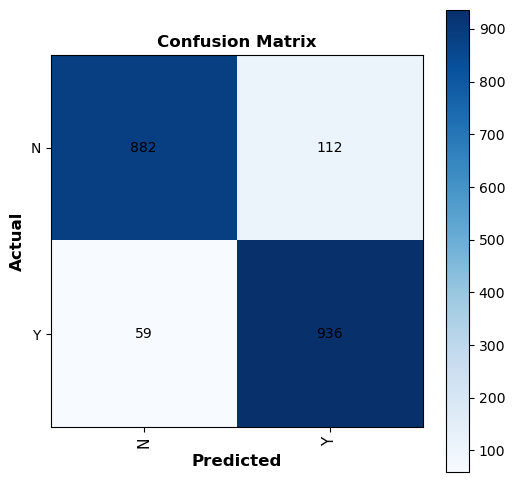

In [223]:
# Confusion Matrix for final saved model
pred=loaded_model.predict(x_test)
cm=confusion_matrix(y_test,pred)

# Target variable labels in the order
classes = ['N', 'Y']

fig, ax = plt.subplots(figsize=(6, 6)) # create a figure and axis object
im = ax.imshow(cm, cmap='Blues')  # create a heatmap of the confusion matrix

# set axis labels
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xticks(fontsize=11,rotation=90)

# set labels for each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j],
                       ha="center", va="center", color="black")
ax.set_title("Confusion Matrix",fontsize=12,fontweight ='bold')
ax.set_xlabel('Predicted',fontsize=12,fontweight ='bold')
ax.set_ylabel('Actual',fontsize=12,fontweight ='bold')
cbar = ax.figure.colorbar(im, ax=ax)
plt.show()

## Overall Summary

- **Rainfall Weather Forecasting dataset was used to predict 2 datas: One was to predict the "Rainfall" and the other was to predict the "Raintomorrow"**

- **After getting the insights of Rainfall Weather Forecasting dataset, noticed many missing values in the dataset across most of the columns, hence instead of using simple imputer; I used various imputation techniques which considered the relationship among features to predict missing values however at the end, simple imputer gave good model accuracy/score values compared to other imputation techniques hence considered the imputed dataset from simple imputer. It may happen that the actual data doesn't exist also but I assumed here, the missing data is actually available but not provided.**

- **I applied multiple techniques to visulalize the entire dataset and got more indepth information about the data set**

- **I used various feature selection techniques to downselect the features for both regression and classification tasks**

- **I completed all EDA steps for the dataset to analyze the data for both regression and classification tasks and also recorded the observations after each step** 

### Regression:

- **Applied various algorithms and saved the best model on the basis of R2 score, MSE and RMSE values for regression model**

- **Applied various regression algorithms to predict the Rainfall, and found that Ridge Regressor is working well, on the basis of r2_score, MSE and RMSE values**

- **I applied Hyperparameter Tuning Ridge Regressor but the score remains same as default model as there was insufficient and bad data in the dataset**

- **Selected Ridge Regressor model from Hyper Parameter Tuning as the final model because the MSE, RMSE values were less and the R2 score was the high**

- **This dataset can be improved by providing the more data so that we can build good model with actual data instead of missing lot of data in most of the columns**

### Classification:

- **I applied classification algorithms to predict the RainTomorrow and found that ExtraTreeClassifier algorithm was working well as it obtained maximum Accuracy Score, ROC AUC Score, F1 score, Precision Score, Recall Score and maximum cross validation score compared to other algorithms** 

- **I tried to increase the accuracy by finding the best parameters during Hyperparameter Tuning technique and noticed improvement compared to default model, hence finally saved the classification model from Hyper Parameer Tuning**

- **I can conclude that the dataset must be improved by adding more good data with lessskewness, less missing values, less number of errors in the data and with less number of outliers to get better predictions on regression and classification**